## Trường Đại học Khoa học Tự nhiên - Đại học Quốc gia TP.HCM

# **Khoa Công nghệ thông tin**

## Lớp: **Ứng dụng phân tích dữ liệu thông minh - 21KHDL**

# Individual project: **Billionaires Statistics Dataset (2023)**

---

**Sinh viên thực hiện:**

- Họ và tên: Vũ Minh Phát
- MSSV: 21127739

**Giảng viên hướng dẫn:**

- Nguyễn Tiến Huy
- Nguyễn Trần Duy Minh

---


# 1. Giới thiệu về tập dữ liệu: [Billionaires Statistics Dataset (2023)](https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset/data)


Billionaires Statistics Dataset (2023) trên Kaggle là một tập dữ liệu toàn diện cung cấp thông tin chi tiết về các tỷ phú toàn cầu, bao gồm hồ sơ cá nhân, lĩnh vực kinh doanh, nguồn gốc tài sản và phân bổ địa lý. Tập dữ liệu này không chỉ liệt kê các chỉ số về tài sản (như giá trị ròng, xếp hạng) mà còn khai thác yếu tố nhân khẩu học (tuổi, giới tính, quốc tịch), đem lại góc nhìn đa chiều về cộng đồng siêu giàu. Đặc biệt, nó làm nổi bật sự chênh lệch giàu nghèo thông qua phân tích ngành nghề "đẻ ra tỷ phú" (công nghệ, tài chính, bất động sản) và xu hướng tích lũy tài sản theo khu vực. Dữ liệu được cập nhật vào năm 2023, phù hợp cho nghiên cứu kinh tế vĩ mô, phân tích thị trường, hoặc đánh giá tác động của các yếu tố xã hội lên sự thịnh vượng cá nhân.

Đặc điểm của tập dữ liệu này:

- Tính đa dạng của thông tin cho phép kết nối các biến số như **ngành nghề, độ tuổi, giới tính** với mức độ giàu có, từ đó phát hiện xu hướng (ví dụ: tỷ lệ tỷ phú tự thân trong lĩnh vực công nghệ).

- Dữ liệu mang tính **toàn cầu**, hỗ trợ so sánh giữa các quốc gia/khu vực, giúp xác định "điểm nóng" tạo ra tỷ phú (như Mỹ, Trung Quốc, Ấn Độ).

- Hữu ích cho **dự báo kinh tế**: Ví dụ, sự trỗi dậy của tỷ phú trong lĩnh vực năng lượng tái tạo có thể phản ánh xu hướng đầu tư toàn cầu.

Đường dẫn đến tập dữ liệu: [Billionaires Statistics Dataset (2023)](https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset/data)


# 2. Tìm hiểu về tập dữ liệu thô

## 2.1. Các thư viện cần thiết

Chúng ta bắt đầu bằng việc import các thư viện cần thiết cho quá trình phân tích dữ liệu, chẳng hạn như: `pandas`, `numpy`, `matplotlib` và `seaborn`.

In [1]:
# Base libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Module for copying data to clipboard
from pandas.io import clipboard
# For annotating variables
from typing import List, Dict
# For drawing lines
from matplotlib.lines import Line2D
# For testing hypothesis
from scipy import stats

# Show all columns
pd.set_option("display.max_columns", None)

## 2.2. Đọc tập dữ liệu thô từ file CSV

Đầu tiên, chúng ta sẽ tải tập dữ liệu có định dạng CSV từ [Kaggle](https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset/data) và đặt file này trong cùng thư mục với file notebook. Sau đó, chúng ta sẽ đọc dữ liệu từ file CSV vào một `DataFrame` và hiển thị một số hàng đầu tiên để có cái nhìn tổng quan về dữ liệu. (_Xem thêm thông tin chi tiết về dữ liệu trong file notebook được đính kèm_).


In [2]:
# Read raw data from csv file and store it in a DataFrame
df = pd.read_csv("./Billionaires Statistics Dataset.csv")

In [3]:
# Display the first 5 rows of the DataFrame
df.head(n=5)

rank  finalWorth               category                personName   age  \
0     1      211000       Fashion & Retail  Bernard Arnault & family  74.0   
1     2      180000             Automotive                 Elon Musk  51.0   
2     3      114000             Technology                Jeff Bezos  59.0   
3     4      107000             Technology             Larry Ellison  78.0   
4     5      106000  Finance & Investments            Warren Buffett  92.0   

         country    city              source             industries  \
0         France   Paris                LVMH       Fashion & Retail   
1  United States  Austin       Tesla, SpaceX             Automotive   
2  United States  Medina              Amazon             Technology   
3  United States   Lanai              Oracle             Technology   
4  United States   Omaha  Berkshire Hathaway  Finance & Investments   

  countryOfCitizenship                      organization  selfMade status  \
0               France  LVMH Moët Hennessy Louis Vuitton     False      U   
1        United States                             Tesla      True      D   
2        United States                            Amazon      True      D   
3        United States                            Oracle      True      U   
4        United States    Berkshire Hathaway Inc. (Cl A)      True      D   

  gender       birthDate lastName firstName                 title  \
0      M   3/5/1949 0:00  Arnault   Bernard      Chairman and CEO   
1      M  6/28/1971 0:00     Musk      Elon                   CEO   
2      M  1/12/1964 0:00    Bezos      Jeff  Chairman and Founder   
3      M  8/17/1944 0:00  Ellison     Larry       CTO and Founder   
4      M  8/30/1930 0:00  Buffett    Warren                   CEO   

            date       state residenceStateRegion  birthYear  birthMonth  \
0  4/4/2023 5:01         NaN                  NaN     1949.0         3.0   
1  4/4/2023 5:01       Texas                South     1971.0         6.0   
2  4/4/2023 5:01  Washington                 West     1964.0         1.0   
3  4/4/2023 5:01      Hawaii                 West     1944.0         8.0   
4  4/4/2023 5:01    Nebraska              Midwest     1930.0         8.0   

   birthDay  cpi_country  cpi_change_country           gdp_country  \
0       5.0       110.05                 1.1   $2,715,518,274,227    
1      28.0       117.24                 7.5  $21,427,700,000,000    
2      12.0       117.24                 7.5  $21,427,700,000,000    
3      17.0       117.24                 7.5  $21,427,700,000,000    
4      30.0       117.24                 7.5  $21,427,700,000,000    

   gross_tertiary_education_enrollment  \
0                                 65.6   
1                                 88.2   
2                                 88.2   
3                                 88.2   
4                                 88.2   

   gross_primary_education_enrollment_country  life_expectancy_country  \
0                                       102.5                     82.5   
1                                       101.8                     78.5   
2                                       101.8                     78.5   
3                                       101.8                     78.5   
4                                       101.8                     78.5   

   tax_revenue_country_country  total_tax_rate_country  population_country  \
0                         24.2                    60.7          67059887.0   
1                          9.6                    36.6         328239523.0   
2                          9.6                    36.6         328239523.0   
3                          9.6                    36.6         328239523.0   
4                          9.6                    36.6         328239523.0   

   latitude_country  longitude_country  
0         46.227638           2.213749  
1         37.090240         -95.712891  
2         37.090240         -95.712891  
3         37.090240 

## 2.3. Đếm số hàng và số cột của tập dữ liệu

Chúng ta sẽ kiểm tra kích thước của tập dữ liệu bằng cách sử dụng thuộc tính `shape` của `DataFrame`.

In [4]:
# Get the number of rows and columns in the DataFrame
nrows, ncols = df.shape

# Display the number of rows and columns in the DataFrame
print(f"Tập dữ liệu thô có {nrows} hàng và {ncols} cột.")

Tập dữ liệu thô có 2640 hàng và 35 cột.


**Nhận xét:**

- Tập dữ liệu thô bao gồm **2640 hàng** và **35 cột**.


## 2.4. Ý nghĩa của mỗi hàng trong tập dữ liệu

Mỗi hàng trong tập dữ liệu "[Billionaires Statistics Dataset (2023)](https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset/data)" đại diện cho **thông tin chi tiết của một tỷ phú**, giúp người dùng nắm bắt nhanh chóng và toàn diện về cá nhân đó:

- Cụ thể, mỗi hàng chứa các trường dữ liệu quan trọng như: **thứ hạng** (đánh giá vị trí của tỷ phú theo tổng tài sản), **tên**, **tuổi**, **quốc gia**, **ngành nghề** kinh doanh, và **giá trị tài sản ròng** (được tính bằng USD và có giá trị _tối thiểu là 1 tỷ USD_).

- Ngoài ra, tập dữ liệu còn cung cấp thông tin về **nguồn gốc của cải** (tỷ phú tự thân hay thừa kế) cũng như các đặc điểm liên quan đến doanh nghiệp hoặc lĩnh vực hoạt động.

- Nhờ đó, mỗi hàng không chỉ là một hồ sơ cá nhân mà còn góp phần phản ánh bức tranh tổng quát về sự phân bố của cải, xu hướng kinh tế và những đặc điểm nhân khẩu học của các tỷ phú trên toàn cầu.

Quan sát bảng dữ liệu, ta thấy có vẻ như không có hàng nào "lạc loài" (hay bất thường). Đây là một dấu hiệu rất tốt chứng tỏ dữ liệu của ta đủ chất lượng để tiến hành các bước phân tích tiếp theo.


## 2.5. Bảng mô tả về các cột trong tập dữ liệu

Dựa vào nội dung của phần "**Key Features**" trên trang [Kaggle](https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset), ta sẽ tạo ra một bảng mô tả về các cột trong tập dữ liệu. Bảng này sẽ cung cấp một cái nhìn tổng quát về các trường dữ liệu có sẵn, giúp cho việc phân tích và khai thác thông tin từ tập dữ liệu trở nên hiệu quả và có hệ thống hơn. (_Tuy nhiên, mô tả trong phần "Key Features" vẫn còn một số điểm chưa rõ ràng, do đó ta cần phải xem xét kỹ lưỡng các giá trị trong từng cột để hiểu rõ hơn về dữ liệu_).


| STT | Tên cột | Ý nghĩa |
| --- | --- | --- |
| 1| rank | Xếp hạng của tỷ phú theo tổng giá trị tài sản. |
| 2| finalWorth | Giá trị tài sản ròng cuối cùng của tỷ phú, tính bằng đô la Mỹ. Đơn vị: triệu USD. |
| 3| category| Ngành nghề hoặc lĩnh vực kinh doanh mà tỷ phú hoạt động. |
| 4| personName | Họ và tên đầy đủ của tỷ phú. |
| 5| age | Tuổi của tỷ phú. |
| 6| country | Quốc gia mà tỷ phú đang sinh sống. |
| 7| city | Thành phố mà tỷ phú đang sinh sống. |
| 8| source | Nguồn gốc tài sản của tỷ phú. |
| 9| industries | Các ngành công nghiệp liên quan đến lợi ích kinh doanh của tỷ phú. |
| 10 | countryOfCitizenship | Quốc tịch của tỷ phú. |
| 11 | organization | Tên của tổ chức hoặc công ty liên quan đến tỷ phú. |
| 12 | selfMade | Cho biết liệu tỷ phú có tự mình tạo ra tài sản hay không (True/False). |
| 13 | status | Trạng thái giàu có: "**D**" đại diện cho tỷ phú tự thân (nhà sáng lập/doanh nhân) và "**U**" cho tài sản được thừa kế hoặc không kiếm được. |
| 14 | gender | Giới tính của tỷ phú. |
| 15 | birthDate | Ngày sinh của tỷ phú, có định dạng "MM/DD/YYYY HH:MM". |
| 16 | lastName | Họ của tỷ phú. |
| 17 | firstName | Tên của tỷ phú. |
| 18 | title| Danh hiệu hoặc chức vụ của tỷ phú (ví dụ: CEO, Chủ tịch). |
| 19 | date | Ngày thu thập dữ liệu, có định dạng "MM/DD/YYYY HH:MM". |
| 20 | state | Bang nơi tỷ phú sinh sống (nếu có). |
| 21 | residenceStateRegion | Vùng hoặc khu vực sinh sống của tỷ phú. |
| 22 | birthYear | Năm sinh của tỷ phú. |
| 23 | birthMonth | Tháng sinh của tỷ phú. |
| 24 | birthDay | Ngày sinh của tỷ phú. |
| 25 | cpi_country | Chỉ số giá tiêu dùng (CPI) của quốc gia của tỷ phú. |
| 26 | cpi_change_country| Thay đổi chỉ số giá tiêu dùng (CPI) của quốc gia của tỷ phú. |
| 27 | gdp_country | Tổng sản phẩm quốc nội (GDP) của quốc gia của tỷ phú. Đơn vị: USD. |
| 28 | gross_tertiary_education_enrollment | Tỷ lệ nhập học giáo dục đại học tại quốc gia của tỷ phú. |
| 29 | gross_primary_education_enrollment_country | Tỷ lệ nhập học giáo dục tiểu học tại quốc gia của tỷ phú. |
| 30 | life_expectancy_country | Tuổi thọ trung bình ở quốc gia của tỷ phú. |
| 31 | tax_revenue_country_country| Doanh thu thuế của quốc gia của tỷ phú. |
| 32 | total_tax_rate_country | Tổng thuế suất áp dụng tại quốc gia của tỷ phú. |
| 33 | population_country| Dân số của quốc gia của tỷ phú. |
| 34 | latitude_country | Vĩ độ của quốc gia của tỷ phú. |
| 35 | longitude_country | Kinh độ của quốc gia của tỷ phú. |


## 2.6. Lấy 5 điểm dữ liệu ra làm mẫu

Trong phần này, ta sẽ lấy ra ngẫu nhiên 5 mẫu dữ liệu để quan sát. Điều này sẽ giúp ta hiểu rõ hơn về phân bố và giá trị của các cột trong bảng mô tả bên trên. Thông qua đó, ta có thể phát hiện ra các cột "bất thường" và tiến hành xử lý chúng trong các bước phân tích tiếp theo.

In [5]:
# Run this cell multiple times to see the different data samples from the DataFrame
df.sample(n=5)

rank  finalWorth         category        personName   age  \
1924  1905        1500       Technology      Bharat Desai  70.0   
1945  1905        1500      Diversified        Kim Jun-ki  78.0   
1135  1104        2700      Real Estate      Angela Leong  62.0   
384    383        6600  Food & Beverage         Dan Cathy  70.0   
1724  1725        1700           Sports  Amy Adams Strunk  67.0   

            country           city            source       industries  \
1924  United States  Fisher Island     IT consulting       Technology   
1945    South Korea          Seoul       Diversified      Diversified   
1135      Hong Kong      Hong Kong           Casinos      Real Estate   
384   United States        Atlanta       Chick-fil-A  Food & Beverage   
1724  United States      Nashville  Tennessee Titans           Sports   

     countryOfCitizenship               organization  selfMade status gender  \
1924        United States                     Syntel      True      E      M   
1945          South Korea  Dongbu Insurance Co. Ltd.      True      U      M   
1135            Hong Kong                        NaN     False      D      F   
384         United States                        NaN     False      U      M   
1724        United States           Tennessee Titans     False      N      F   

            birthDate      lastName firstName                    title  \
1924  11/20/1952 0:00         Desai    Bharat  Chairman and Co-founder   
1945   12/4/1944 0:00           Kim    Jun-ki                      NaN   
1135   3/23/1961 0:00         Leong    Angela                      NaN   
384     3/1/1953 0:00         Cathy       Dan                      NaN   
1724   9/29/1955 0:00  Adams Strunk       Amy                    Owner   

               date      state residenceStateRegion  birthYear  birthMonth  \
1924  4/4/2023 5:01    Florida                South     1952.0        11.0   
1945  4/4/2023 5:01        NaN                  NaN     1944.0        12.0   
1135  4/4/2023 5:01        NaN                  NaN     1961.0         3.0   
384   4/4/2023 5:01    Georgia                South     1953.0         3.0   
1724  4/4/2023 5:01  Tennessee                South     1955.0         9.0   

      birthDay  cpi_country  cpi_change_country           gdp_country  \
1924      20.0       117.24                 7.5  $21,427,700,000,000    
1945       4.0       115.16                 0.4   $2,029,000,000,000    
1135      23.0          NaN                 NaN                   NaN   
384        1.0       117.24                 7.5  $21,427,700,000,000    
1724      29.0       117.24                 7.5  $21,427,700,000,000    

      gross_tertiary_education_enrollment  \
1924                                 88.2   
1945                                 94.3   
1135                                  NaN   
384                                  88.2   
1724                                 88.2   

      gross_primary_education_enrollment_country  life_expectancy_country  \
1924                                       101.8                     78.5   
1945                                        98.1                     82.6   
1135                                         NaN                      NaN   
384                                        101.8                     78.5   
1724                                       101.8                     78.5   

      tax_revenue_country_country  total_tax_rate_country  population_country  \
1924                          9.6                    36.6         328239523.0   
1945                         15.6                    33.2          51709098.0   
1135                          NaN                     NaN                 NaN   
384                           9.6                    36.6         328239523.0   
1724                          9.6                    36.6         328239523.0   

      latitude_country  longitude_country  
1924         37.090240         -95.712891  
1945         35.90775

## 2.7. Các hướng phân tích dữ liệu tiềm năng

Dưới đây là một số hướng phân tích dữ liệu tiềm năng, bên cạnh các hướng đã có sẵn trong phần "**Potential Use Cases**" trên [Kaggle](https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset), mà chúng ta có thể thực hiện với tập dữ liệu "**Billionaires Statistics Dataset (2023)**":

1. **Phân tích tác động của giáo dục đến sự giàu có:**  
   Nghiên cứu mối liên hệ giữa các chỉ số giáo dục (như **tỷ lệ nhập học giáo dục đại học/tiểu học**) với việc tạo ra và tập trung của cải trong các quốc gia. Qua đó có thể khám phá xem các hệ thống giáo dục phát triển có tác động như thế nào đến khả năng hình thành của các tỷ phú.

2. **Phân tích theo nhóm tuổi và thế hệ:**  
   Không chỉ xem xét phân bố tuổi, mà còn nhóm các tỷ phú theo các thế hệ (ví dụ: Baby Boomers, Gen X, Gen Y) để đánh giá xu hướng tích lũy tài sản, mức độ khởi nghiệp và sự khác biệt trong các nhóm tuổi khác nhau.

3. **Phân tích mối liên hệ giữa vị trí địa lý và môi trường kinh tế:**  
   Kết hợp dữ liệu về kinh độ, vĩ độ và các chỉ số kinh tế (GDP, CPI, tổng thuế, dân số) để xem xét liệu có mối liên hệ nào giữa vị trí địa lý (các khu vực, thành phố lớn, vùng ven) và khả năng tạo ra của cải của các tỷ phú hay không.

4. **Phân tích mức độ tập trung của cải (Wealth Concentration):**  
   Sử dụng các biểu đồ phân phối, biểu đồ hộp (box plot) và các chỉ số thống kê để xác định mức độ chênh lệch trong giá trị tài sản giữa các tỷ phú. Điều này giúp làm rõ hiện tượng "nghìn người giữ phần lớn của cải" ngay cả trong nhóm tỷ phú.

5. **Phân tích ngành nghề chuyên sâu:**  
   Đi sâu vào từng ngành nghề, không chỉ đếm số lượng tỷ phú mà còn phân tích mức độ giàu có trung bình, mức độ tăng trưởng và xu hướng thay đổi của từng ngành. Qua đó, có thể nhận diện các ngành nghề có tiềm năng tạo ra sự giàu có vượt trội hoặc những ngành đang có sự biến động mạnh về kinh tế.

6. **Phân tích tương quan giữa nguồn gốc giàu có và hiệu quả doanh nghiệp:**  
   So sánh các chỉ số như giá trị tài sản, mức độ tự tạo ra so với thừa kế với tên tuổi của các tổ chức hoặc công ty liên quan. Điều này có thể cho thấy liệu các tỷ phú tự tạo ra có xu hướng dẫn dắt các doanh nghiệp phát triển hơn so với các tỷ phú có nguồn gốc thừa kế.

7. **Phân tích mối liên hệ giữa chỉ số xã hội và sức khỏe của quốc gia:**  
   Kết hợp dữ liệu về tuổi thọ trung bình, các chỉ số giáo dục và dân số với giá trị tài sản của các tỷ phú tại từng quốc gia để xem xét liệu môi trường xã hội và sức khỏe của quốc gia có ảnh hưởng đến khả năng tạo ra của cải hay không.

8. **Phân tích bất bình đẳng giới trong giới siêu giàu:**  
   Phân tích mức độ bất bình đẳng giới trong giới siêu giàu, xem xét tỷ lệ nam/nữ, mức độ giàu có trung bình, mức độ tập trung cải của các tỷ phú nam và nữ. Điều này giúp hiểu rõ hơn về mối quan hệ giữa giới tính và khả năng tạo ra của cải.


## 2.8. Mô tả vấn đề (Problem Statement)

Tập dữ liệu thống kê về tỷ phú cung cấp **một lượng lớn thông tin** về những tỷ phú hàng đầu thế giới. Tuy nhiên, với lượng dữ liệu lớn như vậy, mục tiêu của chúng ta là **rút ra những insight thú vị, có ý nghĩa** từ dữ liệu và trả lời các câu hỏi quan trọng về bức tranh toàn cảnh của giới tỷ phú.

Vấn đề mà chúng ta muốn giải quyết trong bài phân tích này là **hiểu rõ các yếu tố góp phần tạo nên sự giàu có** của giới tỷ phú và những hệ quả của sự bất bình đẳng về giàu nghèo. Thông qua việc phân tích tập dữ liệu, chúng ta sẽ nghiên cứu sự phân bổ tài sản giữa các ngành và quốc gia khác nhau, đánh giá tác động của các yếu tố kinh tế - xã hội đối với sự giàu có của giới tỷ phú, và khám phá sự khác biệt về giới tính trong giới tỷ phú.

Tóm lại, phân tích này sẽ cung cấp những hiểu biết sâu sắc và giá trị về động lực tạo nên sự giàu có của giới tỷ phú, đồng thời làm sáng tỏ sự bất bình đẳng kinh tế và đề xuất các lĩnh vực tiềm năng cho nghiên cứu sâu hơn cũng như can thiệp chính sách.


# 3. Khám phá và tiền xử lý dữ liệu

## 3.1. Phân tích tỷ lệ trùng lặp (duplicate) và xử lý các hàng trùng lặp (nếu cần thiết)

Ta sử dụng phương thức `duplicated()` của `DataFrame` để kiểm tra xem có hàng nào xuất hiện nhiều hơn một lần hay không. _Trong trường hợp có từ 2 hàng "giống nhau" trở lên, thì hàng đầu tiên sẽ không bị xem là trùng lặp (ta dùng tham số `keep='first'`)_.


In [6]:
# Calculate the number of duplicated rows in the DataFrame
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html
num_duplicated_rows = df.duplicated(keep="first").sum()
# Calculate the duplicated rate
duplicated_rate = num_duplicated_rows / nrows * 100

# Display the number of duplicated rows in the DataFrame
if num_duplicated_rows == 0:
    print("Dữ liệu không có hàng nào bị trùng lặp!")
else:
    print(f"Dữ liệu có {num_duplicated_rows} hàng bị trùng lặp.")

# Display the duplicated rate
print(f"Suy ra, tỉ lệ hàng bị trùng lặp là {duplicated_rate:.2f}%.")

Dữ liệu không có hàng nào bị trùng lặp!
Suy ra, tỉ lệ hàng bị trùng lặp là 0.00%.


**Kết quả:**

```txt
Dữ liệu không có hàng nào bị trùng lặp!
Suy ra, tỉ lệ hàng bị trùng lặp là 0.00%.
```


**Nhận xét:**

- Từ kết quả kiểm tra, ta thấy rằng **không có hàng nào bị trùng lặp** trong tập dữ liệu thô, hay tỷ lệ trùng lặp bằng 0%. Vì mỗi hàng đại diện cho một tỷ phú cụ thể, việc không có hàng trùng lặp là một dấu hiệu tốt cho chất lượng của dữ liệu. Điều này giúp ta tiết kiệm thời gian và công sức trong việc xử lý dữ liệu.


## 3.2. Phân tích tỷ lệ thiếu giá trị ở mỗi cột (missing rate)

Ta sử dụng phương thức `isnull()` của `DataFrame` để kiểm tra xem có hàng nào trong mỗi cột bị thiếu giá trị hay không. Từ đó ta sẽ tính được tỷ lệ thiếu giá trị của mỗi cột. Ta đồng thời sắp xếp các cột theo tỷ lệ thiếu giá trị giảm dần để dễ dàng quan sát. Toàn bộ quy trình này sẽ được thực hiện thông qua hàm `missing_values_table()`.


In [7]:
def display_missing_statistics(df: pd.DataFrame):
    """ Helper function to display the missing values count
    and rate for each column in the DataFrame

    Args:
        df (pd.DataFrame): The input DataFrame

    Returns:
        pd.io.formats.style.Styler: 
        The missing values count and rate for each column
        in the DataFrame
    """

    # Count the number of missing values in each column
    missing_df = (
        df.isnull().sum()
          .to_frame(name="Missing Values Count")
          .reset_index(names="Column Name")
    )

    # Sort the columns by the number of missing values
    missing_df = missing_df.sort_values(
        by="Missing Values Count",
        ascending=False
    )

    # Calculate the missing rate for each column
    missing_df["Missing Rate (Percent)"] = \
        missing_df["Missing Values Count"] / len(df) * 100

    # Display the missing values count and rate for each column
    # Hide the index for better visualization
    return missing_df.style.hide()

Khi này, ta gọi hàm `missing_values_table()` để phân tích tỷ lệ thiếu giá trị của các cột trong tập dữ liệu.

In [8]:
# Get the LaTeX representation of the missing values count and rate
# for each column in the DataFrame
clipboard.copy(display_missing_statistics(df).to_latex())

In [9]:
# Display the missing values count and rate
# for each column in the DataFrame
display_missing_statistics(df)

**Nhận xét:**

- Dựa trên kết quả phân tích dữ liệu, ta thấy rằng bốn cột: `organization`, `title`, `residenceStateRegion`, `state` có **tỷ lệ thiếu giá trị khá cao** (trên 70%). Các cột còn lại có tỷ lệ thiếu giá trị khá thấp hoặc thậm chí không có giá trị nào bị thiếu. Và chúng ta sẽ tìm cách xử lý các cột bị thiếu giá trị trong các bước tiếp theo.


## 3.3. Phân tích kiểu dữ liệu của mỗi cột và xử lý các cột có kiểu dữ liệu chưa phù hợp (nếu cần)

Ta sẽ sử dụng thuộc tính `dtypes` của `DataFrame` để kiểm tra kiểu dữ liệu của mỗi cột trong tập dữ liệu. Điều này giúp ta xác định xem có cột nào có kiểu dữ liệu chưa phù hợp với nội dung của nó hay không. Toàn bộ quy trình này sẽ được thực hiện thông qua hàm `display_data_types()`.

In [10]:
def display_data_types(df: pd.DataFrame):
    """ Helper function to display the data types
    of each column in the DataFrame

    Args:
        df (pd.DataFrame): The input DataFrame

    Returns:
        pd.io.formats.style.Styler: 
        The data types of each column in the DataFrame
    """

    # Get the data types of each column in the DataFrame
    data_types_df = df.dtypes \
                      .to_frame(name="Data Type") \
                      .reset_index(names="Column Name")

    # Display the data types of each column in the DataFrame
    # Hide the index for better visualization
    return data_types_df.style.hide()

**Kết quả:**


In [11]:
# Get the LaTeX representation of the data types
# for each column in the DataFrame
clipboard.copy(display_data_types(df).to_latex())

In [12]:
# Display the data types for each column in the DataFrame
display_data_types(df)

**Nhận xét:**

- Dựa trên kết quả phân tích dữ liệu, ta thấy cột `gdp_country` có kiểu dữ liệu là `object` thay vì một kiểu dữ liệu số như `float` hoặc `int`. Điều này có thể gây khó khăn trong việc thực hiện các phép toán hoặc phân tích dữ liệu. Chúng ta sẽ cần chuyển đổi kiểu dữ liệu của cột này sang `float` để tiếp tục phân tích dữ liệu.

- Đồng thời, ta thấy hai cột `birthDate` và `date` đang có kiểu dữ liệu `object` thay vì `datetime`. Vì hai cột này chứa thông tin về ngày tháng, việc chuyển đổi chúng sang kiểu dữ liệu `datetime` sẽ giúp ta thực hiện các phép toán hoặc phân tích thời gian một cách dễ dàng hơn. Chúng ta sẽ thực hiện việc chuyển đổi kiểu dữ liệu của hai cột này trong các bước tiếp theo.


### 3.3.1. Tiền xử lý cột `gdp_country`

Hiển thị một vài giá trị trong cột `gdp_country` để xem xét cách chuyển đổi kiểu dữ liệu phù hợp.

In [13]:
# Get the LaTeX representation of
# the first 5 rows of the `gdp_country` column
clipboard.copy(df["gdp_country"].head().to_latex())

# Display first 5 rows of the `gdp_country` column
df["gdp_country"].head()

0     $2,715,518,274,227 
1    $21,427,700,000,000 
2    $21,427,700,000,000 
3    $21,427,700,000,000 
4    $21,427,700,000,000 
Name: gdp_country, dtype: object

**Nhận xét:**

- Các giá trị trong cột `gdp_country` đều bắt đầu bằng ký tự `$` và dùng ký tự `,` để phân cách hàng nghìn (_thousands separator_). Điều này làm cho kiểu dữ liệu của cột này bị hiểu nhầm là `object` thay vì `float` khi ta đọc dữ liệu một cách tự động từ file CSV. Chúng ta sẽ cần loại bỏ các ký tự đặc biệt này và chuyển đổi kiểu dữ liệu của cột `gdp_country` sang `float`.


Xử lý cột `gdp_country` để chuyển đổi kiểu dữ liệu sang `float`.

In [14]:
# Replace the dollar sign ($) and commas (,) with an empty string
# and convert the column to a float data type
df["gdp_country"] = (df["gdp_country"].str
                     .replace("\$|,", "", regex=True)
                     .astype(float))

Hiển thị một vài giá trị trong cột `gdp_country` sau khi đã được tiền xử lý.

In [15]:
# Get the LaTeX representation of
# the first 5 rows of the `gdp_country` column
clipboard.copy(df["gdp_country"].head().to_latex())

# Display first 5 rows of the `gdp_country` column
df["gdp_country"].head()

0    2.715518e+12
1    2.142770e+13
2    2.142770e+13
3    2.142770e+13
4    2.142770e+13
Name: gdp_country, dtype: float64

**Nhận xét:**

- Như vậy, sau khi tiền xử lý, kiểu dữ liệu của cột `gdp_country` đã được chuyển đổi sang `float` một cách chính xác. Điều này giúp cho việc phân tích dữ liệu tiếp theo trở nên dễ dàng và chính xác hơn.


### 3.3.2. Tiền xử lý cột `birthDate` và `date`

Hiển thị một vài giá trị trong cột `birthDate` và `date` để xem xét cách chuyển đổi kiểu dữ liệu phù hợp.

In [16]:
# Get the LaTeX representation of
# the first 5 rows of the `birthDate` and `date` columns
clipboard.copy(df[["birthDate", "date"]].head().to_latex())

# Display first 5 rows of the `birthDate` and `date` columns
df[["birthDate", "date"]].head()

birthDate           date
0   3/5/1949 0:00  4/4/2023 5:01
1  6/28/1971 0:00  4/4/2023 5:01
2  1/12/1964 0:00  4/4/2023 5:01
3  8/17/1944 0:00  4/4/2023 5:01
4  8/30/1930 0:00  4/4/2023 5:01

**Nhận xét:**

- Ta thấy giá trị trong cột `birthDate` và `date` đều có định dạng "MM/DD/YYYY HH:MM". Điều này giúp ta chuyển đổi kiểu dữ liệu của cả hai cột này sang `datetime` một cách chính xác.


Xử lý cột `birthDate` và `date` để chuyển đổi kiểu dữ liệu sang `datetime`.

In [17]:
# Python datetime format: https://www.w3schools.com/python/python_datetime.asp
df["birthDate"] = pd.to_datetime(df["birthDate"], format="%m/%d/%Y %H:%M")
df["date"] = pd.to_datetime(df["date"], format="%m/%d/%Y %H:%M")

Kiểm tra lại kiểu dữ liệu của cột `birthDate` và `date` sau khi đã được tiền xử lý.

In [18]:
# Get the LaTeX representation of
# the data types of the `birthDate` and `date` columns
clipboard.copy(df[["birthDate", "date"]].dtypes.to_latex())

# Show the data types of the `birthDate` and `date` columns
df[["birthDate", "date"]].dtypes

birthDate    datetime64[ns]
date         datetime64[ns]
dtype: object

**Nhận xét:**

- Sau khi tiền xử lý, kiểu dữ liệu của cả hai cột `birthDate` và `date` đã được chuyển đổi sang `datetime` một cách chính xác. Điều này giúp cho việc phân tích dữ liệu liên quan đến thời gian trở nên dễ dàng và chính xác hơn.


Quan sát lại kiểu dữ liệu của mỗi cột trong tập dữ liệu trước khi tiến hành các bước phân tích tiếp theo.

In [19]:
# Get the LaTeX representation of the data types
# for each column in the DataFrame
clipboard.copy(display_data_types(df).to_latex())

In [20]:
# Display the data types for each column in the DataFrame
display_data_types(df)

## 3.4. Phân tích phân bố của các giá trị trong mỗi cột có kiểu dữ liệu dạng số (numerical)

Với mỗi cột có kiểu dữ liệu dạng số, ta sẽ tính:

- Tỷ lệ thiếu giá trị (từ 0 đến 100).
- Giá trị tối thiểu.
- Giá trị tứ phân vị thứ nhất.
- Giá trị tứ phân vị thứ hai (giá trị trung vị).
- Giá trị tứ phân vị thứ ba.
- Giá trị tối đa.


In [21]:
# Some helper functions to calculate
# the missing ratio, median, lower quartile, and upper quartile
def missing_ratio(s):
    return (s.isna().mean() * 100).round(3)


def median(df):
    return (df.quantile(0.5)).round(1)


def lower_quartile(df):
    return (df.quantile(0.25)).round(1)


def upper_quartile(df):
    return (df.quantile(0.75)).round(1)


def display_numerical_columns_statistics(num_col_df: pd.DataFrame):
    """ Display the summary statistics for numerical columns in the DataFrame

    Args:
        num_col_df (pd.DataFrame): The DataFrame containing numerical columns

    Returns:
        pd.io.formats.style.Styler: The summary statistics for numerical columns
    """

    # Calculate some basic statistics for the numerical columns:
    # Missing ratio, minimum, lower quartile, median, upper quartile, and maximum
    num_col_info_df = num_col_df.aggregate(
        [missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])

    # Transpose the DataFrame for better visualization
    num_col_info_df = num_col_info_df.T

    # Rename the columns for better interpretation
    num_col_info_df.columns = [
        "Missing Ratio (Percent)", "Minimum",
        "Lower Quartile (Q1)", "Median (Q2)",
        "Upper Quartile (Q3)", "Maximum"
    ]

    # Display the basic statistics for the numerical columns
    return num_col_info_df.reset_index(names="Column Name").style.format({
        "Missing Ratio (Percent)": "{:.3f}",
        "Minimum": "{:.1f}",
        "Lower Quartile (Q1)": "{:.1f}",
        "Median (Q2)": "{:.1f}",
        "Upper Quartile (Q3)": "{:.1f}",
        "Maximum": "{:.1f}"
    }).hide()

**Kết quả:**

In [22]:
# Extract the numerical columns from the DataFrame
num_col_df = df.select_dtypes(include=[np.number])

In [23]:
# Get the LaTeX representation of the summary statistics
# for numerical columns in the DataFrame
clipboard.copy(display_numerical_columns_statistics(num_col_df).to_latex())

# Display the summary statistics for numerical columns
display_numerical_columns_statistics(num_col_df)

Vẽ biểu đồ phân phối của các cột dạng số.

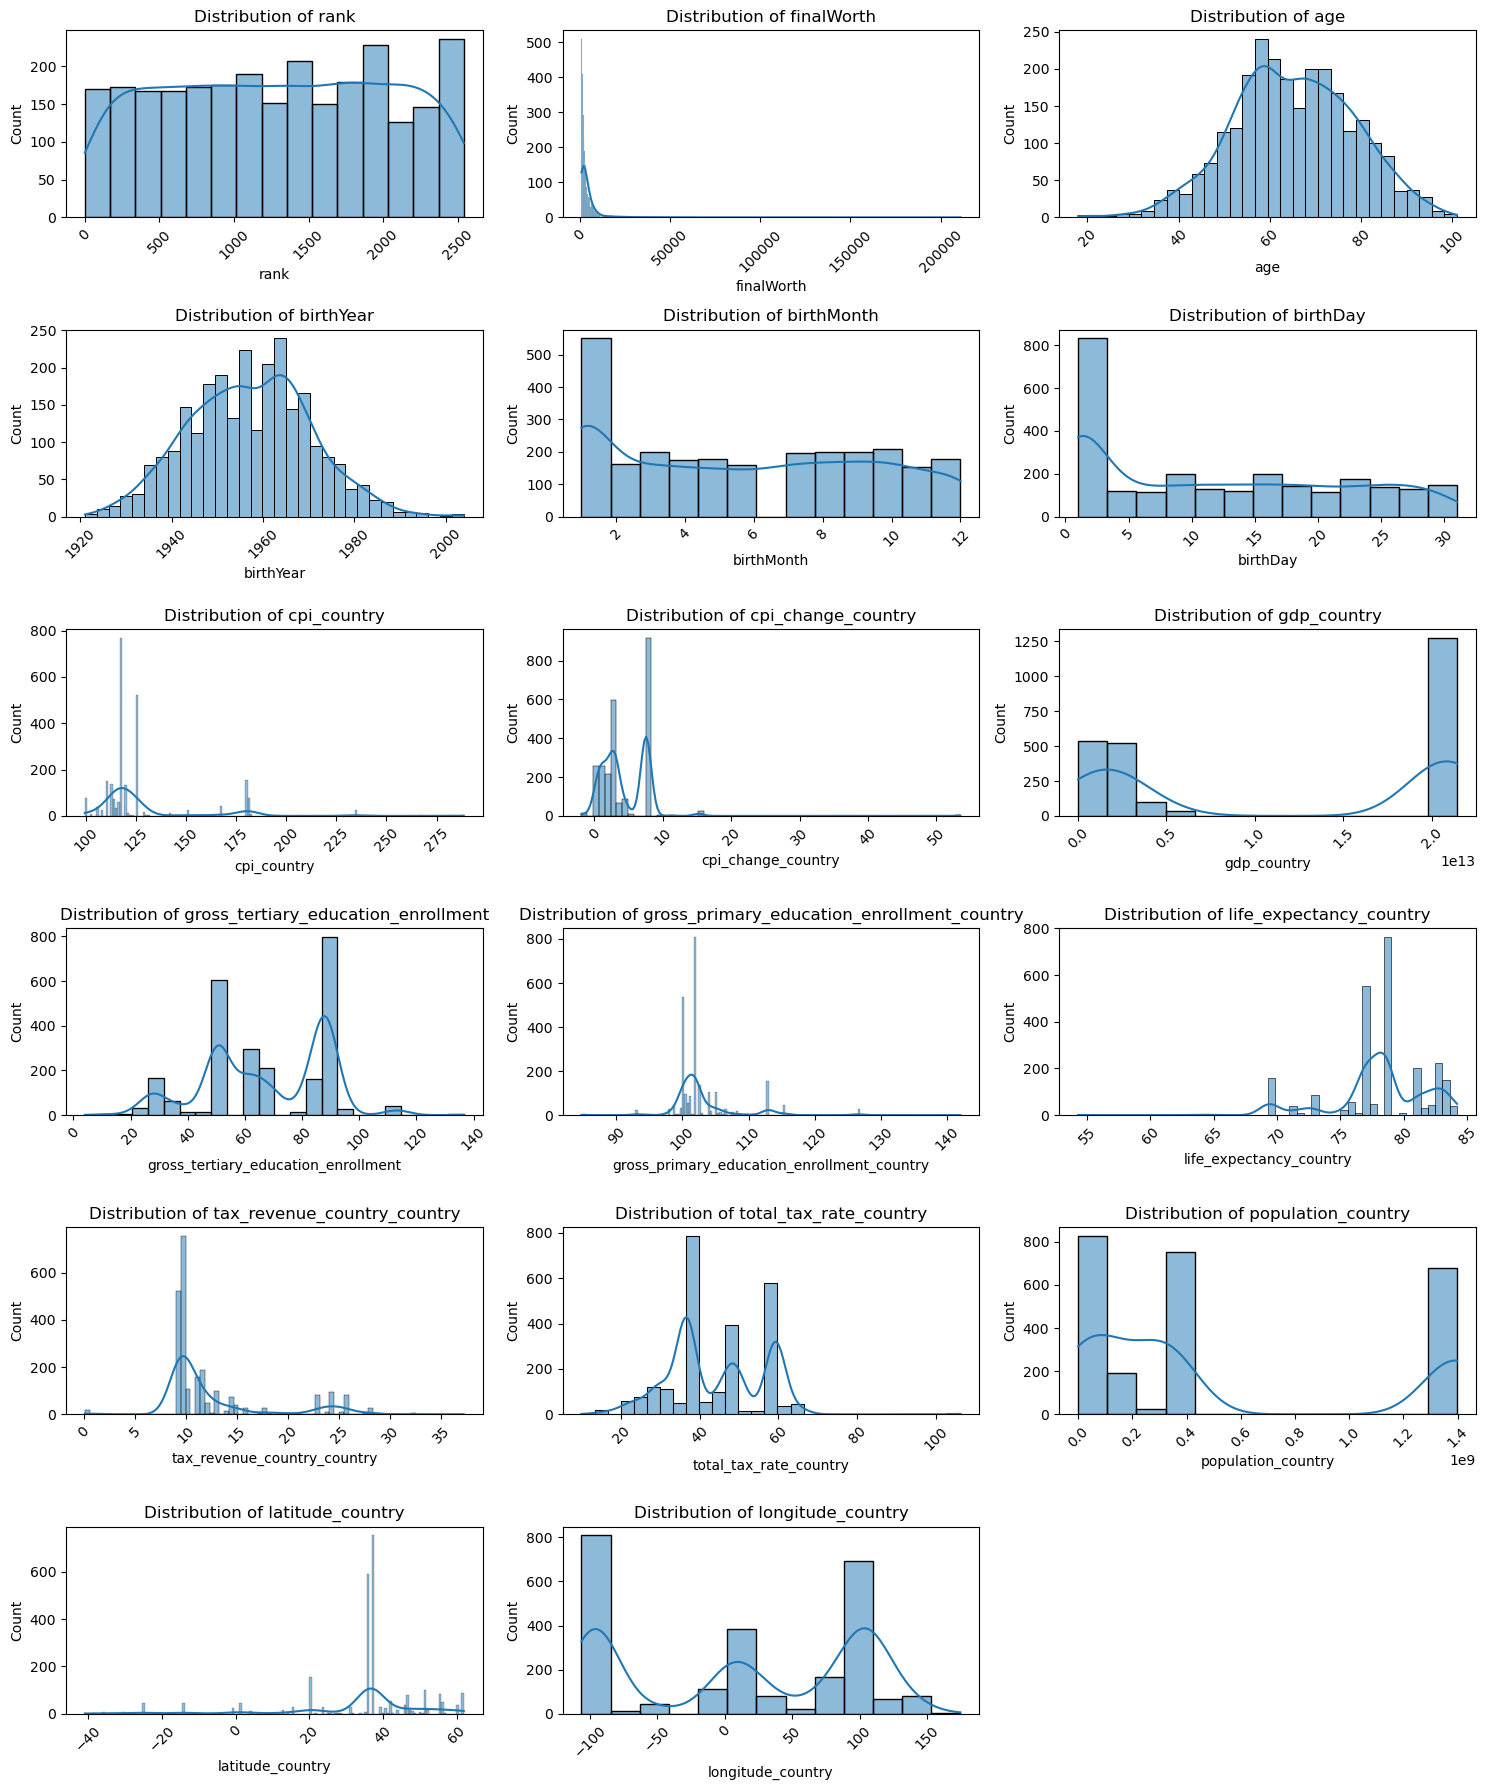

In [24]:
# Create subplots for numerical columns
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 18))
axes = axes.ravel()

# Plot distribution for each numerical column
for idx, column in enumerate(num_col_df.columns):
    # Create distribution plot
    sns.histplot(data=num_col_df, x=column, kde=True, ax=axes[idx])
    axes[idx].set_title(f"Distribution of {column}")
    axes[idx].tick_params(axis="x", rotation=45)

# Remove empty subplots
for idx in range(len(num_col_df.columns), len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout
plt.tight_layout()
plt.show()

**Nhận xét:**

Dựa trên bảng thống kê và biểu đồ phân bố của các giá trị số, ta có thể rút ra một số nhận xét như sau:

1. **Phân bố thứ hạng và giá trị tài sản (rank, finalWorth):**

   - **rank:** Không có giá trị thiếu. Giá trị thứ hạng dao động từ 1 đến 2540 với trung vị là 1312. Nhìn chung, phân bố của cột này không có gì bất thường.

   - **finalWorth:** Không có giá trị thiếu. Giá trị tài sản ròng có phân bố lệch về phía bên phải với trung vị 2300 và Q3 là 4200, trong khi giá trị tối đa đạt tới 211000. Điều này phản ánh rằng phần lớn tỷ phú có tài sản trong khoảng vài nghìn triệu USD (tức là vài tỷ USD), nhưng cũng có một số ít cá nhân có tài sản vượt trội, làm tăng mức giá trị tối đa rất cao.

2. **Nhân khẩu học của các tỷ phú (age, birthYear, birthMonth, birthDay):**

   - **age:** Với tỷ lệ thiếu chỉ khoảng 2.46%, tuổi của các tỷ phú dao động từ 18 đến 101 với trung vị là 65. Điều này cho thấy đa số các tỷ phú là những người trưởng thành với kinh nghiệm sống và sự nghiệp tích lũy trong thời gian dài.

   - **birthYear:** Phân bố từ 1921 đến 2004 với trung vị là 1957, cho thấy phần lớn tỷ phú sinh vào giữa thế kỷ 20, mặc dù vẫn tồn tại một số ngoại lệ khá trẻ.

   - **birthMonth & birthDay:** Mặc dù chỉ là thông tin phụ, nhưng với trung vị tháng 6 và ngày 11, các giá trị này cho thấy sự phân bố đều theo thời gian trong năm, không có xu hướng đặc biệt nào.

3. **Các chỉ số kinh tế và xã hội của quốc gia (cpi_country, cpi_change_country, gdp_country, gross_tertiary_education_enrollment, gross_primary_education_enrollment_country, life_expectancy_country, tax_revenue_country_country, total_tax_rate_country, population_country):**

   - **Chỉ số CPI và biến động CPI:** Với khoảng 7% giá trị thiếu, hầu hết các quốc gia có CPI nằm trong khoảng 117-125, tuy nhiên có một số trường hợp cao bất thường (tối đa 288.6) cho thấy mức giá tiêu dùng ở một số quốc gia có thể bị ảnh hưởng bởi lạm phát mạnh. Biến động CPI có trung vị là 2.9 nhưng cũng có giá trị cực đại lên tới 53.5, cho thấy sự khác biệt lớn về biến động giá giữa các quốc gia.

   - **GDP quốc gia:** Với khoảng 6% giá trị thiếu, GDP dao động từ khoảng 3,15 tỷ USD đến 21,43 nghìn tỷ USD, trong đó giá trị trung vị khá cao (19,91 nghìn tỷ USD). Điều này cho thấy phần lớn tỷ phú đến từ những quốc gia có nền kinh tế lớn và phát triển mạnh.

   - **Đăng ký giáo dục:** Giá trị đăng ký giáo dục đại học có trung vị 65.6 so với đăng ký giáo dục tiểu học có trung vị 101.8, phản ánh sự đồng đều cao trong giáo dục tiểu học và biến thiên lớn hơn trong giáo dục đại học giữa các quốc gia.

   - **Tuổi thọ:** Với trung vị 78.5 và khoảng Q1-Q3 từ 77.0 đến 80.9, hầu hết các quốc gia có tuổi thọ ổn định, mặc dù vẫn có ngoại lệ với giá trị thấp (tối thiểu 54.3).

   - **Thuế:** Doanh thu thuế có trung vị 9.6 và tổng tỷ lệ thuế trung vị là 41.2, tuy nhiên tổng tỷ lệ thuế có giá trị tối đa lên tới 106.3, cho thấy có sự khác biệt đáng kể trong chính sách thuế của các quốc gia.

   - **Dân số:** Dân số quốc gia dao động rất lớn, từ dưới 40 nghìn đến gần 1,4 tỷ, với trung vị 328 triệu, cho thấy sự đa dạng về quy mô dân số của các quốc gia mà các tỷ phú cư trú.

4. **Phân bố địa lý của quốc gia (latitude_country, longitude_country):**

   - **Vĩ độ:** Với trung vị 37.1 và phần lớn các giá trị nằm trong khoảng từ 35.9 đến 40.5, phần lớn quốc gia có tỷ phú có vị trí địa lý nằm ở bán cầu bắc với vĩ độ trung bình.

   - **Kinh độ:** Với Q1 là -95.7, trung vị 10.5 và Q3 là 104.2, các quốc gia phân bố rộng từ khu vực Tây bán cầu (đặc biệt là châu Mỹ) đến khu vực Đông bán cầu (châu Âu, châu Á), cho thấy tỷ phú đến từ nhiều vùng địa lý khác nhau.

**Kết luận:**

- **Tập trung của cải không đồng đều:**  
  Giá trị tài sản ròng cho thấy một phân bố lệch, trong đó phần lớn tỷ phú có giá trị nằm ở mức trung bình (2300) nhưng tồn tại một số ít cá nhân với tài sản khổng lồ (lên đến 211000), làm nổi bật sự chênh lệch về của cải trong nhóm này.

- **Nhân khẩu học của tỷ phú:**  
  Hầu hết các tỷ phú đều là những người lớn tuổi, với trung vị tuổi khoảng 65 và sinh chủ yếu vào giữa thế kỷ 20 (trung vị năm sinh 1957). Điều này cho thấy quá trình tích lũy của cải thường diễn ra qua nhiều năm kinh nghiệm.

- **Ảnh hưởng của nền kinh tế quốc gia:**  
  Các chỉ số kinh tế như GDP, CPI và thuế cho thấy tỷ phú chủ yếu đến từ những quốc gia có nền kinh tế lớn, ổn định và phát triển. Sự khác biệt về chỉ số kinh tế và chính sách thuế giữa các quốc gia có thể góp phần vào sự hình thành và tập trung của cải.

- **Sự đồng đều về mặt xã hội:**  
  Các chỉ số giáo dục tiểu học và tuổi thọ có sự biến thiên nhỏ, cho thấy hầu hết các quốc gia nơi các tỷ phú cư trú có mức độ ổn định về mặt xã hội.

- **Phân bố địa lý đa dạng:**  
  Dù phần lớn các quốc gia có tỷ phú nằm ở bán cầu bắc, kinh độ cho thấy một sự phân bố toàn cầu, với tỷ phú đến từ các quốc gia ở cả hai bán cầu, phản ánh tính đa dạng về vùng địa lý của nguồn gốc các tỷ phú.


## 3.5. Phân tích phân bố của các giá trị trong mỗi cột có kiểu dữ liệu không phải dạng số (non-numerical)

Với mỗi cột có kiểu dữ liệu không phải dạng số, ta sẽ tính:

- Tỷ lệ thiếu giá trị (từ 0 đến 100).
- Số lượng các giá trị khác nhau.
- Tỷ lệ xuất hiện (từ 0 đến 100) của mỗi giá trị.


In [25]:
# Some helper functions to calculate
# the missing ratio, number of unique values, and value ratios
def missing_ratio(s):
    return (s.isna().mean() * 100).round(1)


def num_values(s):
    return len(s.value_counts())


def value_ratios(s):
    # Calculate the value ratios for each unique value in the Series
    total_count = (~s.isna()).sum()
    ratios = (s.value_counts() / total_count * 100).round(1)

    # Convert the index to string for better display
    ratios.index = ratios.index.astype(str)

    return ratios.to_dict()


def display_non_numerical_columns_statistics(non_num_col_df: pd.DataFrame):
    """ Display the summary statistics for non-numerical columns in the DataFrame

    Args:
        non_num_col_df (pd.DataFrame): The DataFrame containing non-numerical columns

    Returns:
        pd.io.formats.style.Styler: The summary statistics for non-numerical columns
    """

    # Calculate the missing ratio, number of unique values, and value ratios
    # for each non-numerical column
    non_num_col_info_df = non_num_col_df.aggregate(
        [missing_ratio, num_values, value_ratios])

    # Transpose the DataFrame for better visualization
    non_num_col_info_df = non_num_col_info_df.T

    # Rename the columns for better interpretation
    non_num_col_info_df.columns = [
        "Missing Ratio (Percent)", "Number of Unique Values", "Value Ratios"
    ]

    # Display the basic statistics for the non-numerical columns
    # Only show first 5 values in column "Value Ratios"
    return non_num_col_info_df.reset_index(names="Column Name").style.format({
        "Missing Ratio (Percent)": "{:.1f}",
        "Number of Unique Values": "{:,.0f}",
        "Value Ratios": lambda x: dict(list(x.items())[:6])
    }).hide()

**Kết quả:**

In [26]:
# Extract non-numerical columns from the DataFrame
non_num_col_df = df.select_dtypes(exclude=[np.number, np.datetime64])

In [27]:
# Get the LaTeX representation of the summary statistics
# for non-numerical columns in the DataFrame
clipboard.copy(display_non_numerical_columns_statistics(non_num_col_df).to_latex())

# Display the summary statistics for non-numerical columns
display_non_numerical_columns_statistics(non_num_col_df)

Vẽ biểu đồ phân phối của các cột dạng không số.

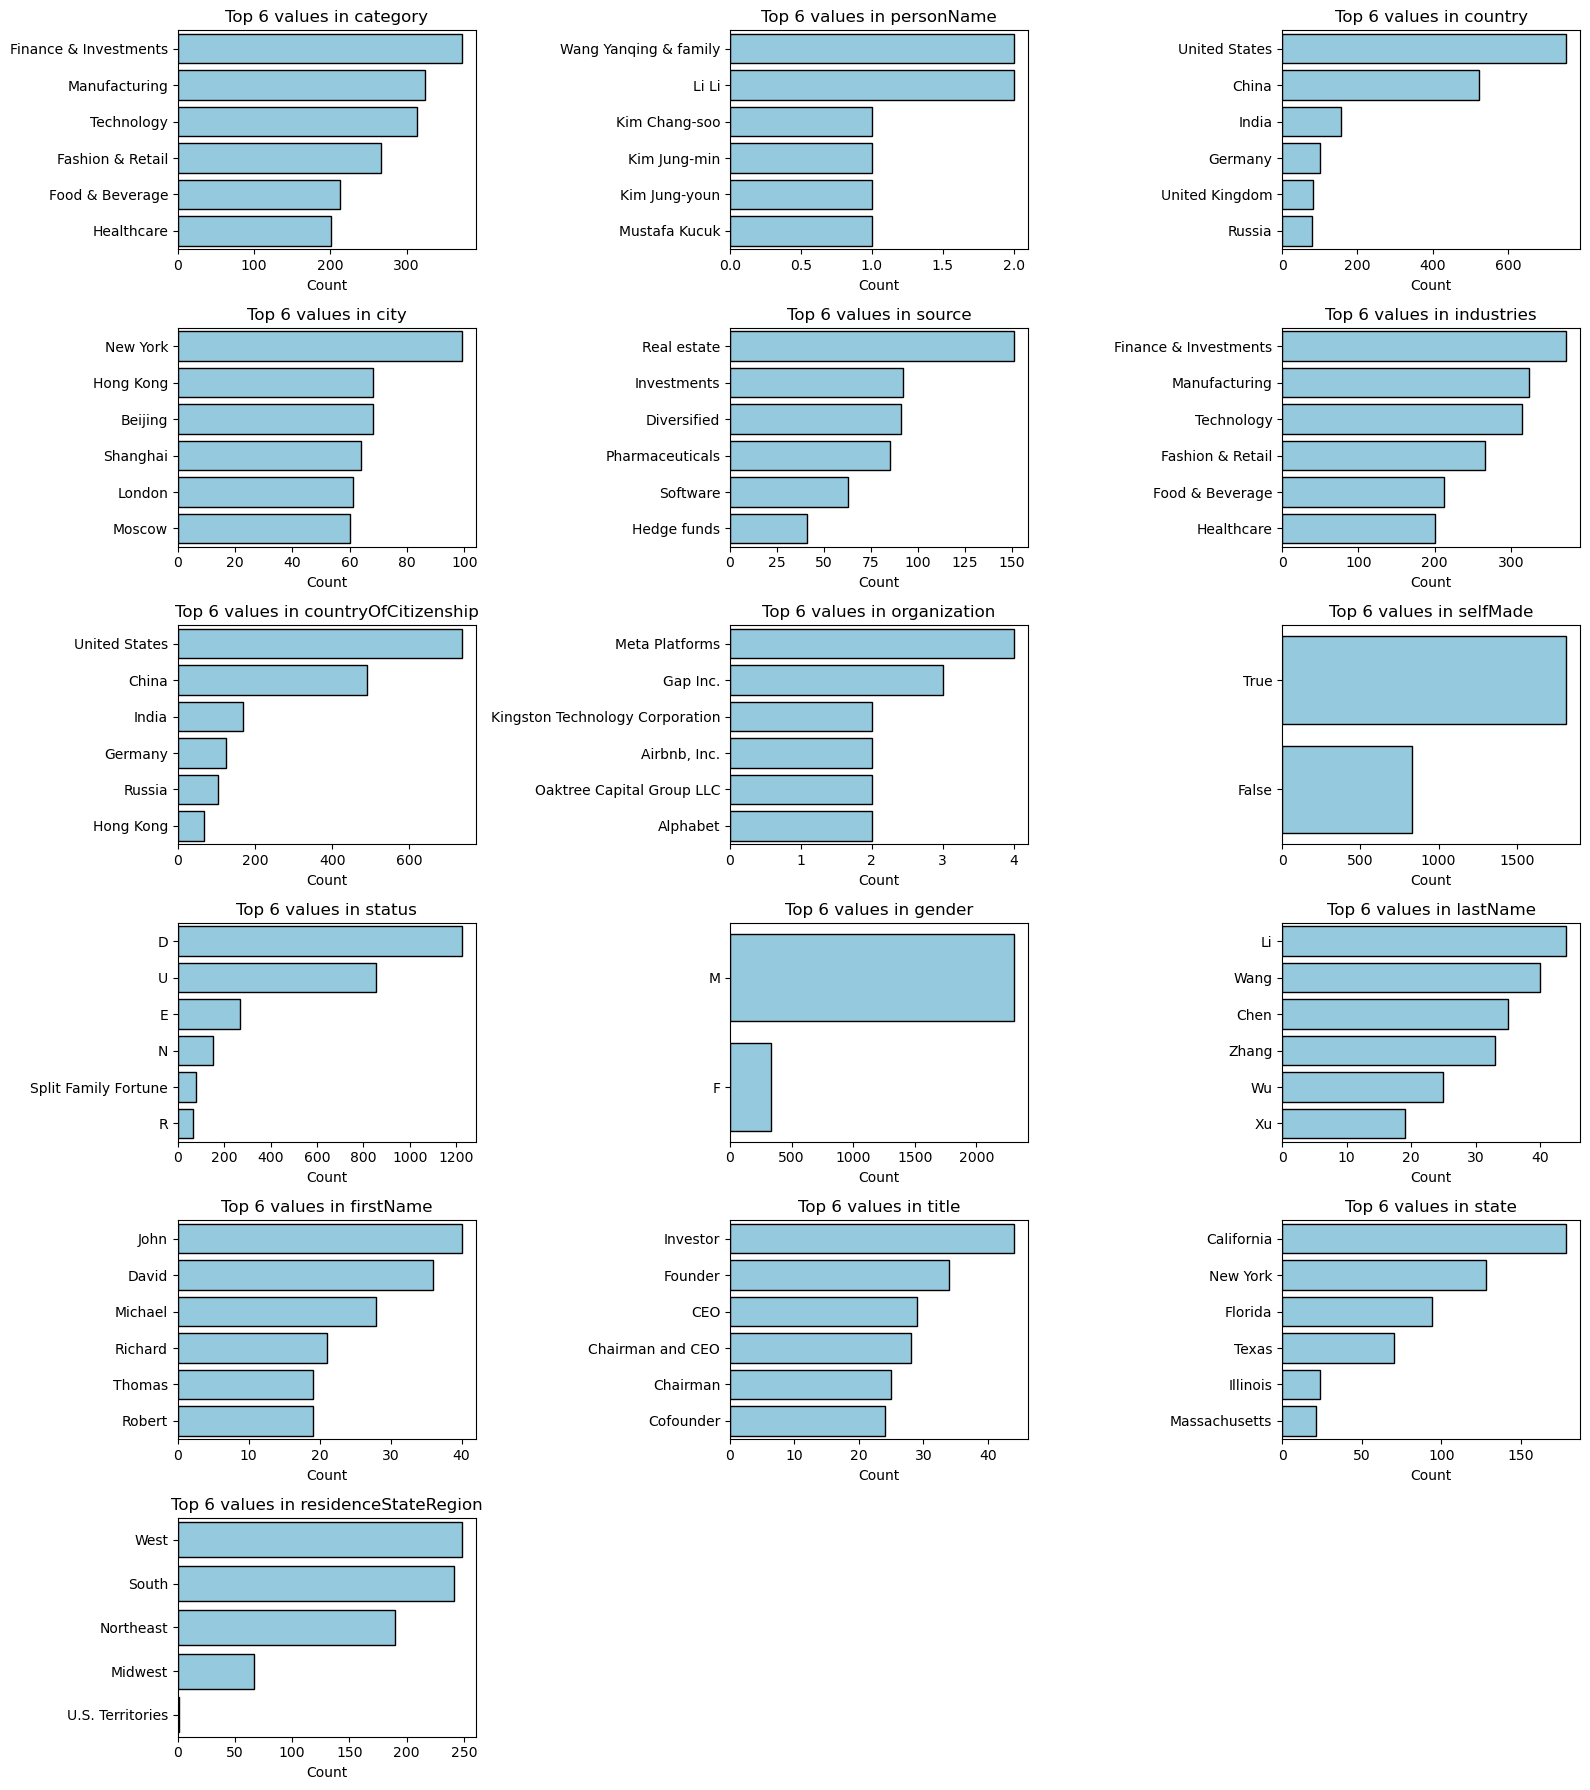

In [28]:
# Create subplots for non-numerical columns
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(16, 18))
axes = axes.ravel()

# Plot count plot for each non-numerical column
# Only show top 6 values in the count plot
for idx, column in enumerate(non_num_col_df.columns):
    # Only keep top 6 values
    value_counts = non_num_col_df[column].value_counts()[:6]
    # Convert index to string for consistent display
    value_counts.index = value_counts.index.astype(str)

    # Create horizontal bar plot
    sns.barplot(x=value_counts.values, y=value_counts.index,
                ax=axes[idx], orient="h",
                color="skyblue", edgecolor="black")
    axes[idx].set_title(f"Top 6 values in {column}")
    axes[idx].set_xlabel("Count")
    axes[idx].set_ylabel("")

# Remove empty subplots
for idx in range(len(non_num_col_df.columns), len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout
plt.tight_layout()
plt.show()

**Nhận xét:**

Dựa trên bảng thống kê và biểu đồ phân bố của các giá trị không phải số, ta có thể rút ra một số nhận xét như sau:

1. **Phân bố ngành nghề và lĩnh vực hoạt động (category, industries):**

   - Cả hai cột đều có 18 giá trị duy nhất với tỷ lệ xuất hiện của các ngành khá tương đồng.

   - "Finance & Investments" chiếm tỷ lệ cao nhất (14.1%), theo sau là "Manufacturing" (12.3%) và "Technology" (11.9%).

   - Điều này cho thấy các ngành tài chính, sản xuất và công nghệ đóng vai trò chủ đạo trong việc tạo ra của cải cho các tỷ phú.

2. **Thông tin cá nhân (personName, firstName, lastName):**

   - Cột personName có 2.638 giá trị duy nhất cho thấy mức độ đa dạng rất lớn về danh tính.

   - Trong khi đó, các cột firstName và lastName cũng cho thấy sự phong phú của tên gọi; ví dụ, các họ phổ biến như "Li", "Wang", "Chen", "Zhang" cho thấy sự hiện diện mạnh mẽ của các tỷ phú có gốc Trung Quốc hoặc từ khu vực châu Á.

3. **Phân bố quốc gia và thành phố (country, countryOfCitizenship, city):**

   - Quốc gia: Dữ liệu có 78 giá trị duy nhất với "United States" (29.0%) và "China" (20.1%) chiếm tỷ lệ lớn, cho thấy hai nền kinh tế này là trung tâm của sự tập trung của cải.

   - Quốc tịch: Tương tự, cột countryOfCitizenship cho thấy Mỹ (27.8%) và Trung Quốc (18.6%) dẫn đầu.

   - Thành phố: Với 741 giá trị duy nhất, các thành phố nổi bật như New York, Hong Kong, Beijing, Shanghai, London và Moscow xuất hiện với tỷ lệ khoảng 2.3% đến 3.9%, cho thấy các trung tâm tài chính - kinh tế lớn luôn là nơi tập trung của cải.

4. **Nguồn gốc của cải (source):**

   - Cột này có 906 giá trị duy nhất.

   - "Real estate" chiếm tỷ lệ cao nhất (5.7%), theo sau là "Investments" (3.5%) và "Diversified" (3.4%), cho thấy bất động sản và các khoản đầu tư tài chính là những nguồn tạo ra của cải quan trọng.

5. **Tỷ lệ tỷ phú tự thân so với thừa kế (selfMade, status):**

   - 68.6% các tỷ phú là tự tạo ra tài sản (selfMade = True) so với 31.4% thừa kế, điều này phản ánh xu hướng khởi nghiệp mạnh mẽ trong việc tạo dựng của cải.

   - Cột status với 6 giá trị cho thấy nhóm "D" (self-made, thường là nhà sáng lập/doanh nhân) chiếm 46.3%, tiếp theo là "U" (thừa kế) với 32.4%. Các nhóm còn lại có tỷ lệ thấp hơn, thể hiện những đặc thù riêng của nguồn gốc giàu có.

6. **Giới tính (gender):**

   - Dữ liệu thể hiện sự mất cân đối rõ rệt khi 87.2% các tỷ phú là nam và chỉ 12.8% là nữ, cho thấy sự chênh lệch đáng kể về giới trong giới tỷ phú.

7. **Thông tin tổ chức và chức danh (organization, title):**

   - Cột organization có tỷ lệ thiếu cực cao (87.7%), cho thấy phần lớn hồ sơ không cung cấp thông tin về tổ chức liên quan - có thể do vấn đề bảo mật hoặc dữ liệu không đầy đủ.

   - Tương tự, cột title cũng có tỷ lệ thiếu cao (87.2%), nhưng với dữ liệu có sẵn, các chức danh như "Investor", "Founder", "CEO" chiếm tỷ lệ cao (tương ứng 13.0%, 10.0%, 8.6%), phản ánh vai trò lãnh đạo và tầm quan trọng của các chức danh này đối với các tỷ phú.

8. **Thông tin địa phương của Mỹ (state, residenceStateRegion):**

   - Hai cột này có tỷ lệ thiếu khá lớn (71.5% và 71.7%) vì chỉ áp dụng cho các hồ sơ liên quan đến Mỹ.

   - Trong số dữ liệu có sẵn, các bang như California (23.6%), New York (17.0%), Florida (12.5%) và Texas (9.3%) là những địa phương phổ biến, trong khi về vùng, "West" (33.2%) và "South" (32.3%) chiếm ưu thế.

**Kết luận:**

- **Tập trung ngành nghề:**  
   Các ngành tài chính, sản xuất và công nghệ là những lĩnh vực tạo ra của cải hàng đầu, cho thấy xu hướng đầu tư và phát triển kinh doanh hiện đại.

- **Sự tập trung địa lý:**  
   Mỹ và Trung Quốc là hai quốc gia chính, với các thành phố tài chính lớn đóng vai trò trung tâm, phản ánh vai trò then chốt của những nền kinh tế này trong việc tích lũy của cải.

- **Nguồn gốc giàu có:**  
   Xu hướng tự tạo ra của cải chiếm ưu thế, mặc dù vẫn có một tỷ lệ đáng kể của những người thừa kế, từ đó nhấn mạnh tầm quan trọng của khả năng khởi nghiệp và đổi mới sáng tạo.

- **Phân bố giới tính không đồng đều:**  
  Đáng chú ý là sự mất cân đối về giới, khi mà các tỷ phú nam chiếm đa số áp đảo so với tỷ phú nữ.

- **Thông tin không đầy đủ:**  
   Một số cột như organization và title có tỷ lệ thiếu dữ liệu rất cao, điều này gợi ý cần cải thiện chất lượng thu thập dữ liệu hoặc có thể do tính chất bảo mật của thông tin liên quan đến các tỷ phú.

- **Đặc điểm tên gọi:**  
  Sự đa dạng trong tên và họ, cùng với sự xuất hiện của các họ phổ biến từ châu Á như "Li", "Wang" và "Chen", cho thấy sự góp mặt đáng kể của các tỷ phú gốc châu Á trong dữ liệu.


## 3.6. Phân tích tương quan giữa các biến định lượng

Đầu tiên, ta cần xác định hệ số tương quan giữa các biến định lượng trong tập dữ liệu. Ta sẽ dùng phương thức `corr()` để tính ma trận tương quan, sử dụng phương pháp "`pearson`" để xác định mức độ tương quan tuyến tính giữa các cặp biến.


In [29]:
# Calculate correlation matrix for numerical columns
# Use Pearson correlation coefficient by default
correlation_matrix = df.select_dtypes(
    include=[np.number]).corr(method="pearson")

# Get the LaTeX representation of the correlation matrix
clipboard.copy(correlation_matrix.to_latex())

# Display the correlation matrix
correlation_matrix

rank  finalWorth       age  \
rank                                        1.000000   -0.448930 -0.142686   
finalWorth                                 -0.448930    1.000000  0.067053   
age                                        -0.142686    0.067053  1.000000   
birthYear                                   0.143708   -0.066721 -0.999336   
birthMonth                                 -0.042514    0.003407  0.015322   
birthDay                                   -0.042987    0.059315  0.081547   
cpi_country                                 0.074872   -0.042842 -0.001479   
cpi_change_country                         -0.069537    0.035702  0.115669   
gdp_country                                -0.052705    0.037589 -0.068638   
gross_tertiary_education_enrollment        -0.126277    0.066711  0.061736   
gross_primary_education_enrollment_country  0.005887   -0.008880  0.066394   
life_expectancy_country                    -0.041443    0.021819  0.020327   
tax_revenue_country_country                 0.021576   -0.009270  0.006429   
total_tax_rate_country                      0.123434   -0.036381 -0.151771   
population_country                          0.118411   -0.053024 -0.167812   
latitude_country                           -0.060056    0.031122 -0.122544   
longitude_country                           0.185638   -0.101048 -0.169338   

                                            birthYear  birthMonth  birthDay  \
rank                                         0.143708   -0.042514 -0.042987   
finalWorth                                  -0.066721    0.003407  0.059315   
age                                         -0.999336    0.015322  0.081547   
birthYear                                    1.000000   -0.045066 -0.091512   
birthMonth                                  -0.045066    1.000000  0.221384   
birthDay                                    -0.091512    0.221384  1.000000   
cpi_country                                 -0.000738    0.056870  0.037517   
cpi_change_country                          -0.118060    0.106427  0.146357   
gdp_country                                  0.067644   -0.000183 -0.033647   
gross_tertiary_education_enrollment         -0.061316    0.049269  0.171608   
gross_primary_education_enrollment_country  -0.066810    0.026174  0.045075   
life_expectancy_country                     -0.017936   -0.044165  0.004498   
tax_revenue_country_country                 -0.005262    0.001484  0.034128   
total_tax_rate_country                       0.151297   -0.046784 -0.149580   
population_country                           0.167355   -0.050506 -0.204271   
latitude_country                             0.125035   -0.038060  0.006617   
longitude_country                            0.169756   -0.062697 -0.188214   

                                            cpi_country  cpi_change_country  \
rank                                           0.074872           -0.069537   
finalWorth                                    -0.042842            0.035702   
age                                           -0.001479            0.115669   
birthYear                                     -0.000738           -0.118060   
birthMonth                                     0.056870            0.106427   
birthDay                                       0.037517            0.146357   
cpi_country                                    1.000000            0.436769   
cpi_change_country                             0.436769            1.000000   
gdp_country                                   -0.295076            0.382137   
gross_tertiary_education_enrollment           -0.456428            0.167455   
gross_primary_education_enrollment_country     0.279601            0.053483   
life_expectancy_country                       -0.747716           -0.393884   
tax_revenue_country_country                   -0.037022           -0.317516   
total_tax_rate_country                         0.245961            0.003272   
population_country                 

Ta sẽ sử dụng biểu đồ heatmap để trực quan hóa ma trận tương quan giữa các biến định lượng trong tập dữ liệu. Đối với biểu đồ heatmap, ta chỉ hiển thị một nửa phía dưới của ma trận tương quan vì ma trận tương quan là ma trận đối xứng qua đường chéo chính. Điều này giúp giảm sự lặp lại thông tin và tạo ra một biểu đồ dễ đọc hơn.



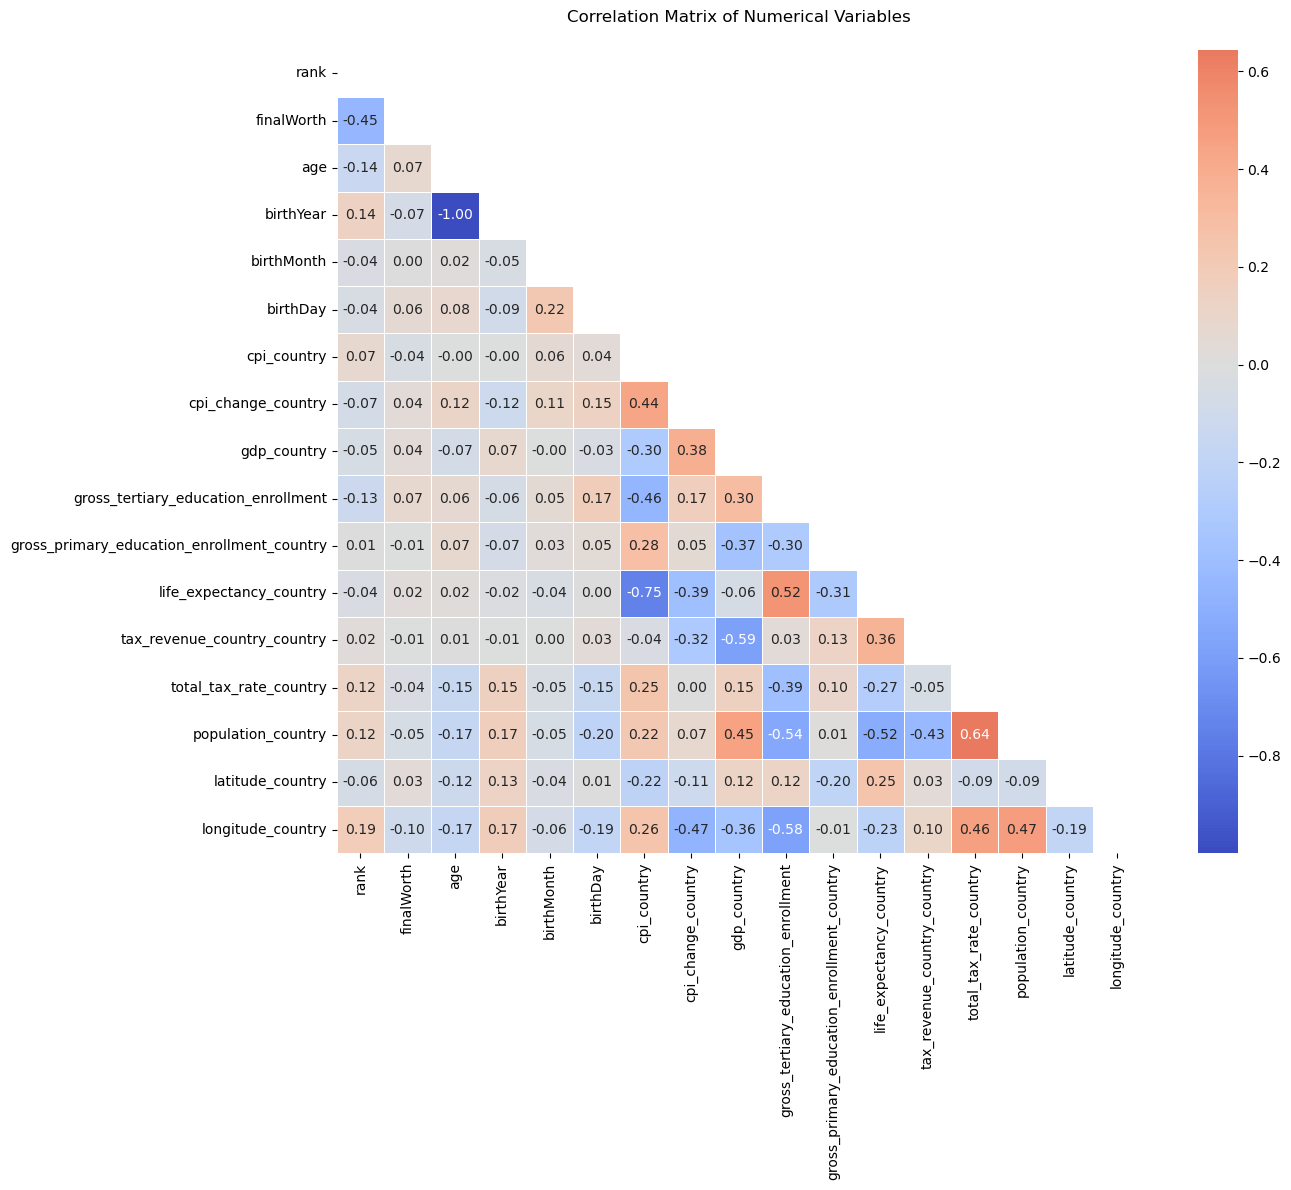

In [30]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix,
            mask=mask,          # Apply mask to hide upper triangle
            annot=True,         # Show correlation values
            cmap="coolwarm",    # Color scheme
            center=0,           # Center the colormap at 0
            fmt=".2f",          # Format correlation values to 2 decimal places
            square=True,        # Make cells square
            linewidths=0.5)     # Add gridlines

plt.title("Correlation Matrix of Numerical Variables", pad=20)
plt.tight_layout()
plt.show()

**Nhận xét:**

Dựa vào biểu đồ **heatmap** của ma trận tương quan giữa các biến định lượng, ta có thể rút ra một số nhận xét như sau:

1. **Mối quan hệ giữa thứ hạng và tài sản:**

   - **Rank vs. finalWorth (-0.45):**  
     Có mối tương quan nghịch vừa phải giữa thứ hạng và giá trị tài sản ròng. Điều này có nghĩa là những tỷ phú có thứ hạng thấp (tức là gần vị trí 1) thường có giá trị tài sản cao hơn. Đây là mối quan hệ hợp lý khi xếp hạng được xác định dựa trên tổng tài sản.

2. **Nhân khẩu học: Tuổi và Năm sinh:**

   - **Age vs. birthYear (-0.999):**  
     Mối tương quan gần như hoàn hảo giữa tuổi và năm sinh cho thấy càng người càng có năm sinh càng sớm (với dấu âm cho biết mối quan hệ nghịch). Điều này hoàn toàn hợp lý do tuổi và năm sinh là hai đại lượng phụ thuộc lẫn nhau (tuổi = năm hiện tại - năm sinh).

3. **Các chỉ số kinh tế và xã hội:**

   - **cpi_country vs. life_expectancy_country (-0.75):**  
     Mối tương quan âm mạnh giữa CPI và tuổi thọ cho thấy quốc gia có chỉ số giá tiêu dùng cao (có thể phản ánh lạm phát hoặc chi phí sinh hoạt đắt đỏ) thường có tuổi thọ trung bình thấp hơn. Điều này gợi ý rằng mức sống và áp lực kinh tế có thể ảnh hưởng đến sức khỏe và tuổi thọ của dân cư.

   - **cpi_country vs. gross_tertiary_education_enrollment (-0.46):**  
     Chỉ số CPI có mối tương quan âm vừa phải với tỷ lệ đăng ký giáo dục đại học, có thể phản ánh mối quan hệ giữa chi phí sinh hoạt và đầu tư vào giáo dục ở một số quốc gia.

   - **cpi_change_country vs. longitude_country (-0.47):**  
     Mối tương quan âm giữa biến động CPI và kinh độ có thể gợi ý sự khác biệt về biến động giá cả giữa các khu vực địa lý, mặc dù cần nghiên cứu sâu hơn để giải thích hiện tượng này.

4. **Tác động của quy mô kinh tế quốc gia:**

   - **gdp_country vs. population_country (0.45):**  
     Có mối tương quan dương vừa phải giữa GDP và dân số, cho thấy các quốc gia có quy mô dân số lớn thường có nền kinh tế lớn hơn.

   - **gdp_country vs. tax_revenue_country_country (-0.59):**  
     Mối tương quan âm mạnh giữa GDP và doanh thu thuế (theo cách tính của biến này) có thể chỉ ra rằng các quốc gia với GDP cao có cơ cấu thuế hoặc hệ thống tài chính khác biệt, tuy nhiên kết quả này cần được xem xét cùng với bối cảnh cụ thể của biến thuế.

5. **Giáo dục và chất lượng cuộc sống:**

   - **gross_tertiary_education_enrollment vs. life_expectancy_country (0.52):**  
     Sự tăng trưởng trong tỷ lệ đăng ký giáo dục đại học có mối liên hệ dương với tuổi thọ trung bình, cho thấy đầu tư vào giáo dục bậc cao có thể góp phần cải thiện chất lượng cuộc sống và hệ thống y tế.

   - **gross_tertiary_education_enrollment vs. population_country (-0.54):**  
     Mối tương quan âm mạnh giữa đăng ký giáo dục đại học và dân số cho thấy, có thể, các quốc gia có tỷ lệ đăng ký cao không nhất thiết là những quốc gia có dân số đông, hoặc ngược lại - điều này cần được phân tích thêm trong bối cảnh các hệ thống giáo dục và quy mô dân số khác nhau.

6. **Các chỉ số về thuế:**

   - **total_tax_rate_country vs. population_country (0.64):**  
     Tỷ lệ thuế tổng cộng có mối tương quan dương mạnh với dân số, gợi ý rằng các quốc gia có dân số lớn thường áp dụng mức thuế cao hơn. Điều này có thể liên quan đến nhu cầu tài chính và quy mô dịch vụ công ở những quốc gia có số người lớn.

   - **total_tax_rate_country vs. longitude_country (0.46):**  
     Một mối tương quan vừa phải với kinh độ cho thấy có thể tồn tại sự khác biệt về chính sách thuế giữa các khu vực địa lý, ví dụ như giữa các quốc gia thuộc các vùng kinh tế phát triển khác nhau.

7. **Các mối tương quan khác không quá nổi bật:**

   - Các biến liên quan đến thông tin ngày sinh (birthMonth, birthDay) có tương quan nhẹ hoặc thấp với hầu hết các biến khác, cho thấy chúng không đóng góp nhiều vào các mối quan hệ về kinh tế hay xã hội.

   - Các biến địa lý (latitude_country và longitude_country) có tương quan thấp với hầu hết các biến kinh tế, ngoại trừ một số mối liên hệ vừa phải như đã nêu ở trên.

**Kết luận:**

- **Hiệu quả xếp hạng và tài sản:** Sự tương quan âm giữa rank và finalWorth cho thấy thứ hạng cao (gần số 1) đi kèm với giá trị tài sản ròng lớn, củng cố tính hợp lý của hệ thống xếp hạng.

- **Nhân khẩu học rõ ràng:** Mối liên hệ gần như hoàn hảo giữa tuổi và năm sinh khẳng định tính nhất quán của dữ liệu về nhân khẩu học.

- **Ảnh hưởng của yếu tố kinh tế - xã hội:** CPI và biến động CPI có liên quan mật thiết với các chỉ số như tuổi thọ và giáo dục, cho thấy chi phí sinh hoạt và biến động giá cả có thể tác động đến chất lượng cuộc sống.

- **Quy mô và cơ cấu kinh tế quốc gia:** GDP, dân số và các chỉ số thuế cho thấy mối liên hệ giữa quy mô kinh tế quốc gia và cơ cấu tài chính - chính sách thuế, qua đó tác động gián tiếp đến mức sống và đầu tư vào các lĩnh vực như giáo dục.

- **Đầu tư vào giáo dục và chất lượng cuộc sống:** Tỷ lệ đăng ký giáo dục đại học có mối tương quan dương với tuổi thọ, gợi ý rằng các quốc gia đầu tư mạnh vào giáo dục thường có chất lượng cuộc sống và hệ thống y tế tốt hơn.


## 3.7. Tiền xử lý dữ liệu

Đầu tiên, ta sẽ sử dụng hàm `missing_values_table()` (mà ta đã định nghĩa ở trên) để phân tích tỷ lệ thiếu giá trị của các cột hiện có trong tập dữ liệu.

In [31]:
# Get the LaTeX representation of the missing values count and rate
# for each column in the DataFrame
clipboard.copy(display_missing_statistics(df).to_latex())

# Display the missing values count and rate
# for each column in the DataFrame
display_missing_statistics(df)

### 3.7.1. Đối với các cột có tỷ lệ thiếu giá trị cao

Dựa vào kết quả phân tích, ta thấy rằng có 4 cột có tỷ lệ thiếu giá trị cao (trên 70%) là: `organization`, `title`, `residenceStateRegion`, `state`. Tỷ lệ thiếu giá trị của các cột này là khá cao, điều đó đồng nghĩa với việc "chất lượng" của dữ liệu trong các cột này không đủ tốt để sử dụng trong quá trình phân tích. Do đó, ta sẽ tiến hành xóa các cột này khỏi tập dữ liệu.


In [32]:
# Define the list of columns with high missing rate
high_missing_rate_cols = ["organization", "title",
                          "residenceStateRegion", "state"]

# Drop the columns with high missing rate
df = df.drop(
    columns=high_missing_rate_cols,
    errors="ignore",  # Ignore errors if columns do not exist
)

### 3.7.2. Đối với các cột không có nhiều ý nghĩa trong quá trình phân tích

Thông qua nhiều bước phân tích trước đó, ta nhận thấy rằng một số cột không có nhiều ý nghĩa trong quá trình phân tích dữ liệu, bao gồm:

- `firstName`, `personName`, `lastName`: Đây là các cột chứa thông tin cá nhân về họ và tên của các tỷ phú. Các cột này sẽ không cần thiết trong quá trình phân tích dữ liệu, vì chúng không cung cấp thông tin quan trọng về khả năng tạo ra của cải của các tỷ phú. Mặt khác, ta cũng nên xóa chúng để đảm bảo quyền riêng tư cho các cá nhân.

- `birthDate`, `birthYear`, `birthMonth`, `birthDay`: Các cột này chứa thông tin về ngày tháng năm sinh của các tỷ phú. Chúng ta nên xóa các cột này vì chúng không cung cấp thông tin quan trọng về khả năng tạo ra của cải của các tỷ phú.

- `date`: Cột này chứa thông tin về ngày tháng năm mà dữ liệu được cập nhật (hoặc thu thập). Chúng ta cũng nên xóa cột này vì nó không liên quan đến bài phân tích mà ta đang muốn thực hiện.


In [33]:
# Define the list of unnecessary columns
unnecessary_cols = [
    "firstName", "personName", "lastName",
    "birthDate", "birthYear", "birthMonth", "birthDay",
    "date",
]

# Drop the unnecessary columns
df = df.drop(
    columns=unnecessary_cols,
    errors="ignore",  # Ignore errors if columns do not exist
)

### 3.7.3. Đối với các cột có kiểu dữ liệu số và không bị thiếu quá nhiều giá trị


Với các cột số có ít giá trị thiếu, chúng ta sẽ điền giá trị **trung vị** (của các giá trị không thiếu) vào chỗ trống. Cách này giúp giữ lại đặc điểm phân phối dữ liệu gốc nhiều nhất có thể, hạn chế ảnh hưởng đến phân tích sau này.

In [34]:
# Get the name of numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns

# Fill missing values in numerical columns with the median
for col in num_cols:
    if df[col].isna().sum() > 0:
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)

### 3.7.4. Đối với các cột có kiểu dữ liệu không phải số và không bị thiếu quá nhiều giá trị

Với các cột không phải số có ít giá trị thiếu, chúng ta sẽ điền 1 giá trị đặc biệt là **"others"** vào chỗ trống. Cách này giúp giữ lại đặc điểm phân phối dữ liệu gốc nhiều nhất có thể, hạn chế ảnh hưởng đến phân tích sau này.


In [35]:
# Get the list of non-numerical columns
non_num_cols = df.select_dtypes(exclude=[np.number, np.datetime64]).columns

# Fill missing values in non-numerical columns with "others"
for col in non_num_cols:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna("others")

## 3.8. Tổng kết quá trình tiền xử lý dữ liệu

Sau khi thực hiện nhiều bước để khám phá và tiền xử lý dữ liệu, ta đã có tập dữ liệu mới với các cột được xử lý một cách phù hợp. Khi này, ta sẽ sử dụng phương thức `info()` của `DataFrame` để kiểm tra lại thông tin của tập dữ liệu sau khi đã được tiền xử lý. Đây là tập dữ liệu mà ta sẽ sử dụng để thực hiện các phân tích để làm rõ những câu hỏi được đặt ra ở trên.


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   age                                         2640 non-null   float64
 4   country                                     2640 non-null   object 
 5   city                                        2640 non-null   object 
 6   source                                      2640 non-null   object 
 7   industries                                  2640 non-null   object 
 8   countryOfCitizenship                        2640 non-null   object 
 9   selfMade                                    2640 non-null   bool   
 10  status      

# 4. Phân tích Khám phá Dữ liệu (Exploratory Data Analysis - EDA)

## 4.1. Phân tích tỷ lệ tỷ phú tự thân theo các cột: 'category', 'country', 'source', 'industries'


Trong phần này, ta sẽ phân tích tỷ lệ tỷ phú tự thân (selfMade) theo các nhóm giá trị khác nhau trong 4 cột 'category', 'country', 'source', 'industries'. Đầu tiên, ta sẽ tính tỷ lệ tỷ phú tự thân (selfMade = True) theo từng nhóm giá trị trong các cột có kiểu dữ liệu phân loại. Sau đó, ta sẽ vẽ biểu đồ cột để trực quan hóa kết quả.

In [37]:
def calculate_top_self_made_ratios(df: pd.DataFrame, top_n: int = 10,
                                   min_records: int = 10, ascending: bool = False) -> Dict[str, pd.Series]:
    """ Calculate the top `top_n` self-made ratios for each categorical column in the DataFrame

    Args:
        df (pd.DataFrame): The input DataFrame
        top_n (int, optional): Number of top self-made ratios to calculate. Defaults to 10.
        min_records (int, optional): Minimum number of records for each group. Defaults to 10.
        ascending (bool, optional): Whether to sort the ratios in ascending order. Defaults to False.

    Returns:
        Dict[str, pd.Series]: A dictionary containing the top `top_n` self-made ratios for each categorical column
    """

    # Initialize the results dictionary
    results: Dict[str, pd.Series] = {}

    # Iterate over each column in the DataFrame
    for column in df.columns:
        # Check if the column is categorical
        if df[column].dtype == np.object_ or df[column].dtype == "category":
            # Filter out groups with less than `min_records` records
            valid_groups = df.groupby(column).filter(
                lambda x: len(x) > min_records)

            # Calculate the self-made ratio for each group in the column
            ratios = valid_groups.groupby(column)["selfMade"].mean()

            # Sort the ratios based on the `ascending` parameter
            top_ratios = ratios.sort_values(
                ascending=ascending).head(top_n) * 100

            # Store the top ratios in the results dictionary
            results[column] = top_ratios

    return results

### 4.1.1. Theo top các nhóm giá trị có tỷ lệ tỷ phú tự thân cao nhất

Ta sẽ tiền xử lý dữ liệu để tính tỷ lệ tỷ phú tự thân theo từng nhóm giá trị trong các cột 'category', 'country', 'source', 'industries'. Sau đó, ta sẽ lấy top 10 nhóm giá trị có tỷ lệ tỷ phú tự thân cao nhất để vẽ biểu đồ cột.

In [38]:
# Calculate the top self-made ratios for each categorical column
top_self_made_ratios = calculate_top_self_made_ratios(df)

# Filter out the selected categories
selected_categories = ["category", "country", "source", "industries"]
data = {category: top_self_made_ratios[category]
        for category in selected_categories}

# Display the top self-made ratios for the selected categories
for column, ratios in data.items():
    print(f"Top Self-Made Ratios for {column}:\n{ratios}\n")

Top Self-Made Ratios for category:
category
Technology               92.993631
Telecom                  83.870968
Gambling & Casinos       76.000000
Finance & Investments    74.193548
Energy                   73.000000
Healthcare               72.636816
Manufacturing            72.530864
Logistics                72.500000
Metals & Mining          71.621622
Media & Entertainment    70.329670
Name: selfMade, dtype: float64

Top Self-Made Ratios for country:
country
Russia            100.000000
China              96.749522
Japan              76.315789
Israel             73.076923
United States      71.618037
Canada             71.428571
United Kingdom     70.731707
Australia          67.441860
Hong Kong          64.705882
Austria            63.636364
Name: selfMade, dtype: float64

Top Self-Made Ratios for source:
source
Hedge funds       100.000000
E-commerce        100.000000
Semiconductors    100.000000
Online games      100.000000
Private equity     97.500000
Software           95.238

**Trực quan hóa dữ liệu bằng biểu đồ cột:**

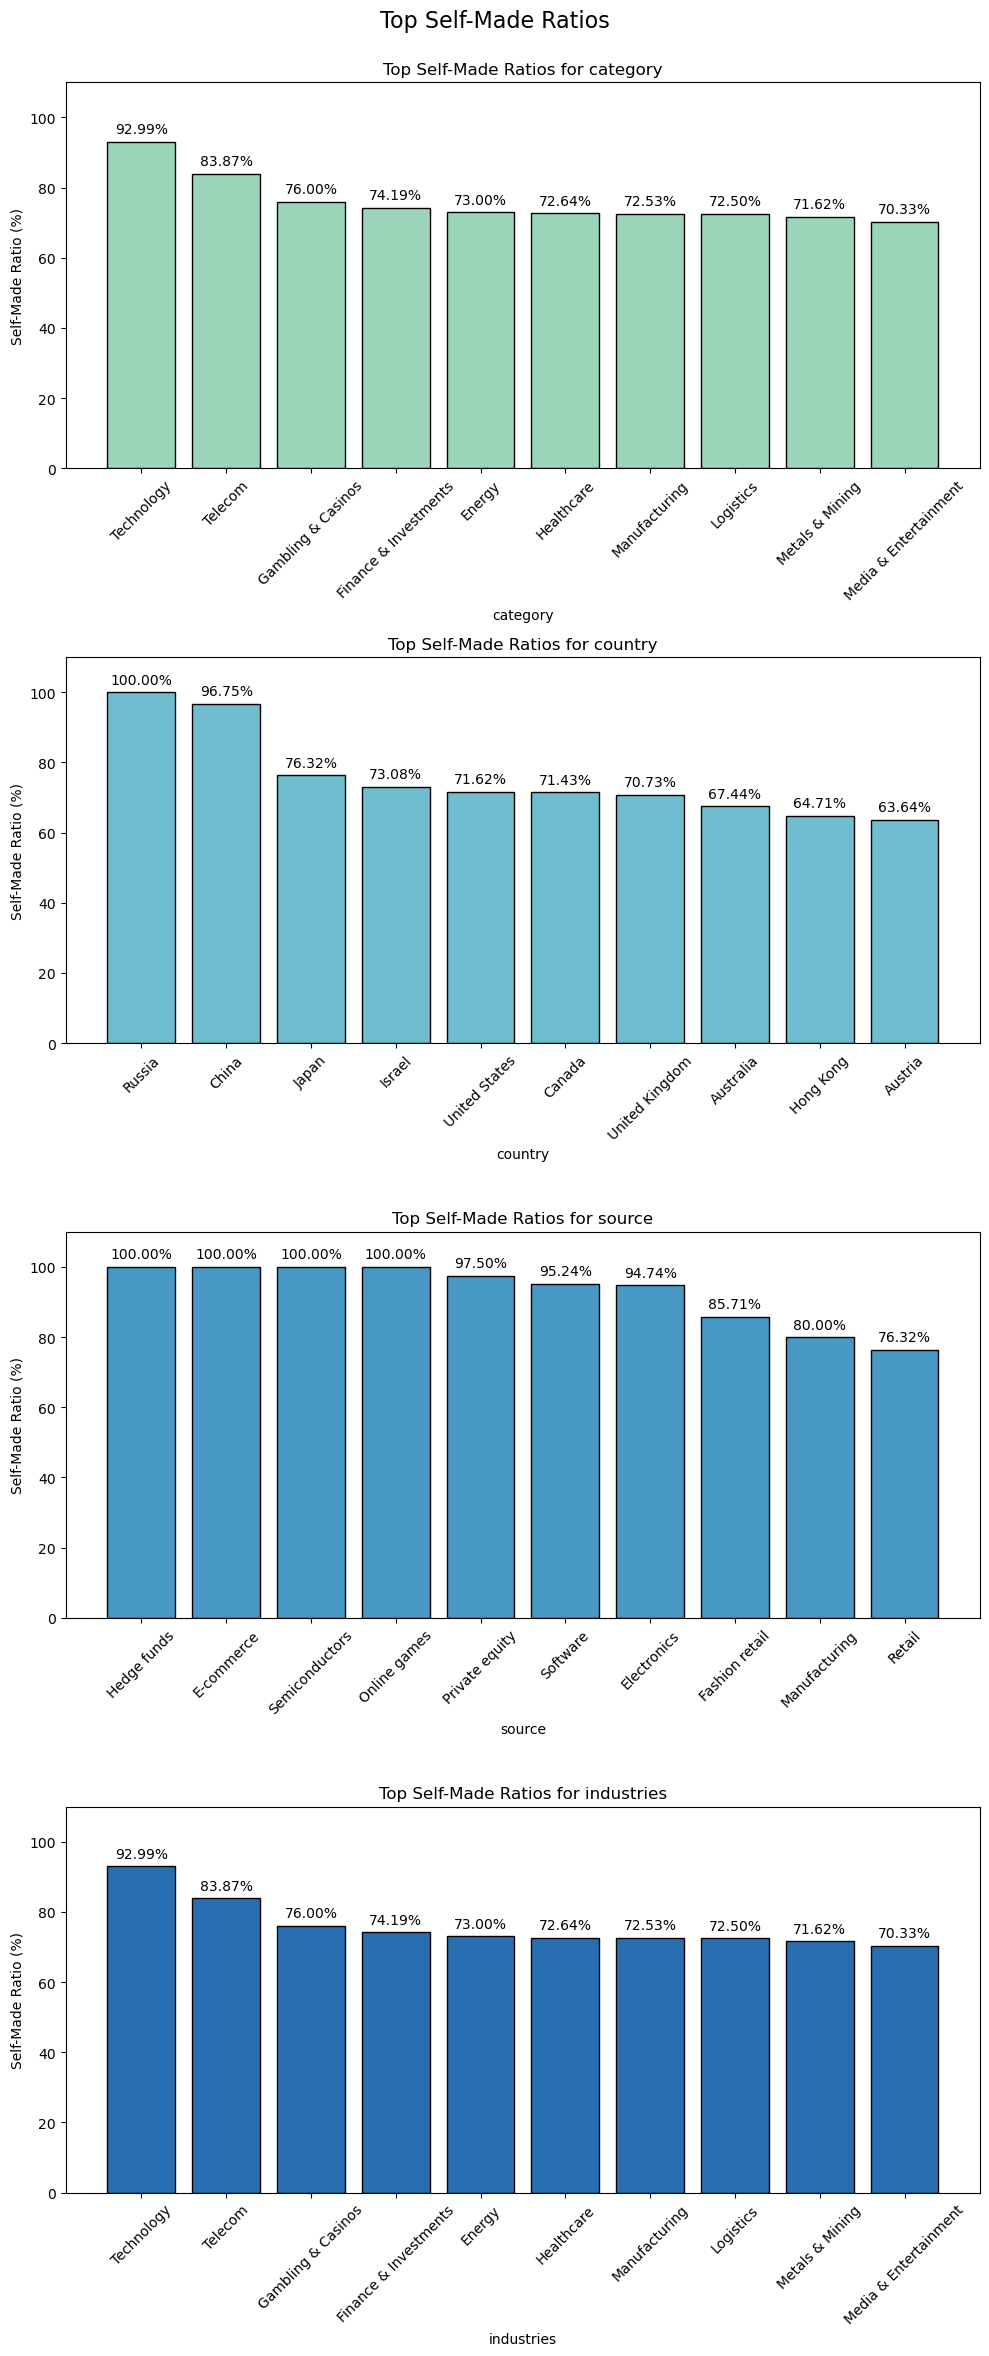

In [39]:
# Create subplots for the top self-made ratios
fig, axes = plt.subplots(nrows=len(data), figsize=(10, 6 * len(data)))
# Add a super title for the subplots
fig.suptitle("Top Self-Made Ratios", fontsize=16)

# Create shade of blue colors for the bars
colors = ["#9cd6ba", "#6fbdce", "#4898c6", "#286eb0"]

# Plot the top self-made ratios for each categorical column
for i, (column, ratios) in enumerate(data.items()):
    ax = axes[i]
    bars = ax.bar(ratios.index, ratios.values, 
                  color=colors[i], edgecolor="black")

    # Add labels and title
    ax.set_title(f"Top Self-Made Ratios for {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Self-Made Ratio (%)")
    ax.set_ylim(0, 110)
    ax.tick_params(axis="x", rotation=45)

    # Annotate the bars with the self-made ratios values
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}%",
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 4), textcoords="offset points",
                    ha="center", va="bottom")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

**Nhận xét:**

Dựa theo kết quả phân tích dữ liệu, ta có thể rút ra một số nhận xét như sau:

1. Theo **Category** và **Industries**

   - **Công nghệ (Technology) và Viễn thông (Telecom):**

     - Với tỷ lệ tỷ phú tự thân (self-made) lần lượt là khoảng 93% và 84%, các lĩnh vực này cho thấy phần lớn tỷ phú trong ngành đều tự xây dựng đế chế của riêng họ.

     - Điều này phản ánh sức mạnh của tinh thần khởi nghiệp và khả năng đổi mới trong lĩnh vực công nghệ, nơi mà các startup và doanh nghiệp mới nổi có thể nhanh chóng phát triển thành các ông lớn trên thị trường.

   - **Các ngành khác:**

     - Các ngành như Gambling & Casinos, Finance & Investments, Energy, Healthcare, Manufacturing, Logistics, Metals & Mining và Media & Entertainment có tỷ lệ tỷ phú tự thân (self-made) dao động từ 70% đến 76%.

     - Mặc dù tỷ lệ không cao như Technology, nhưng vẫn cho thấy một phần lớn tỷ phú trong các ngành này đều có hành trình tự tạo dựng, phản ánh xu hướng khởi nghiệp mạnh mẽ ngay cả trong các lĩnh vực truyền thống hơn.

2. Theo **Country**

   - **Những quốc gia có tỷ lệ tự tạo cao nhất:**

     - **Russia** và **China** lần lượt đạt tỷ lệ 100% và 96.75%, cho thấy hầu hết các tỷ phú tại đây đều tự tạo ra tài sản.

     - Điều này có thể liên quan đến bối cảnh kinh tế chuyển đổi nhanh, cơ hội kinh doanh mới nổi và một văn hóa khởi nghiệp mạnh mẽ trong bối cảnh cải cách kinh tế.

   - **Những quốc gia khác:**

     - **Japan** (76.32%), **Israel** (73.08%) và **United States** (71.62%) có tỷ lệ tự tạo thấp hơn so với Russia và China.

     - Các quốc gia này có thể có truyền thống gia đình hay hệ thống di sản về tài sản mạnh mẽ, hoặc những yếu tố văn hóa và kinh tế khiến tỷ lệ tỷ phú tự tạo không chiếm ưu thế tuyệt đối.

3. Theo **Source**

   - **Các nguồn tạo ra của cải có tỷ lệ tự tạo đạt 100%:**

     - Các lĩnh vực như **Hedge funds, E-commerce, Semiconductors, Online games** đều đạt mức 100%, chứng tỏ các lĩnh vực này hầu như chỉ sinh ra các tỷ phú tự tạo.

     - Điều này cho thấy các ngành kinh doanh hiện đại, dựa trên công nghệ và đổi mới sáng tạo, thường mở rộng cơ hội cho những cá nhân khởi nghiệp và tự kiến tạo thành công.

   - **Các nguồn khác:**

     - Các lĩnh vực như **Private equity, Software, Electronics** có tỷ lệ tự tạo rất cao (trên 94%), trong khi **Fashion retail, Manufacturing, Retail** có tỷ lệ thấp hơn (từ 76% đến 85%).

     - Điều này phản ánh rằng một số ngành truyền thống hoặc bán lẻ có thể có phần tỷ phú thừa kế chiếm tỷ lệ đáng kể hơn so với các ngành đòi hỏi sự đổi mới và sáng tạo.

**Kết luận:**

- **Xu hướng khởi nghiệp mạnh mẽ:**

  - Các lĩnh vực liên quan đến công nghệ, tài chính hiện đại, và các ngành kinh doanh dựa trên đổi mới (như e-commerce, semiconductors, online games) thường có tỷ lệ tỷ phú tự tạo rất cao, chứng tỏ rằng sự khởi nghiệp và khả năng tự kiến tạo tài sản là yếu tố chủ chốt trong các ngành này.

- **Sự khác biệt theo khu vực địa lý:**

  - Các quốc gia như Russia và China dẫn đầu về tỷ lệ tự tạo, điều này có thể phản ánh những biến động kinh tế, sự mở cửa của thị trường và các chính sách hỗ trợ doanh nghiệp khởi nghiệp.

  - Trong khi đó, các quốc gia với nền kinh tế phát triển lâu đời như Mỹ, Nhật hay Israel có tỷ lệ tự tạo thấp hơn, có thể do sự tồn tại của các gia đình doanh nghiệp lâu đời hoặc văn hóa thừa kế tài sản mạnh mẽ.

- **Ảnh hưởng của ngành và nguồn tạo ra của cải:**

  - Mỗi ngành hoặc nguồn gốc của cải đều mang đến một bức tranh khác nhau về cách thức tạo ra sự giàu có. Những ngành có tính chất đổi mới, rủi ro cao và đòi hỏi sự sáng tạo thường tạo ra tỷ lệ tỷ phú tự tạo cao, trong khi các ngành truyền thống có thể có sự pha trộn giữa tự tạo và thừa kế.


### 4.1.2. Theo top các nhóm giá trị có tỷ lệ tỷ phú tự thân thấp nhất

Ta sẽ tiền xử lý dữ liệu để tính tỷ lệ tỷ phú tự thân theo từng nhóm giá trị trong các cột 'category', 'country', 'source', 'industries'. Sau đó, ta sẽ lấy top 10 nhóm giá trị có tỷ lệ tỷ phú tự thân thấp nhất để vẽ biểu đồ cột.

In [40]:
# Calculate the top worst self-made ratios for each categorical column
top_worst_self_made_ratios = calculate_top_self_made_ratios(df, ascending=True)

# Filter out the selected categories
selected_categories = ["category", "country", "source", "industries"]
data = {category: top_worst_self_made_ratios[category]
        for category in selected_categories}

# Display the top worst self-made ratios for the selected categories
for column, ratios in data.items():
    print(f"Top Worst Self-Made Ratios for {column}:\n{ratios}\n")

Top Worst Self-Made Ratios for category:
category
Diversified                   44.385027
Construction & Engineering    51.111111
Food & Beverage               51.415094
Automotive                    53.424658
Service                       56.603774
Fashion & Retail              59.774436
Sports                        64.102564
Real Estate                   67.875648
Media & Entertainment         70.329670
Metals & Mining               71.621622
Name: selfMade, dtype: float64

Top Worst Self-Made Ratios for country:
country
others         26.315789
Germany        30.392157
Monaco         35.294118
Philippines    35.714286
Brazil         38.636364
Spain          40.000000
India          42.675159
France         42.857143
Italy          43.636364
Mexico         46.153846
Name: selfMade, dtype: float64

Top Worst Self-Made Ratios for source:
source
Cargill                 0.000000
Hotels, investments     0.000000
Consumer goods         16.666667
Diversified            28.571429
Supermarke

**Trực quan hóa dữ liệu bằng biểu đồ cột:**


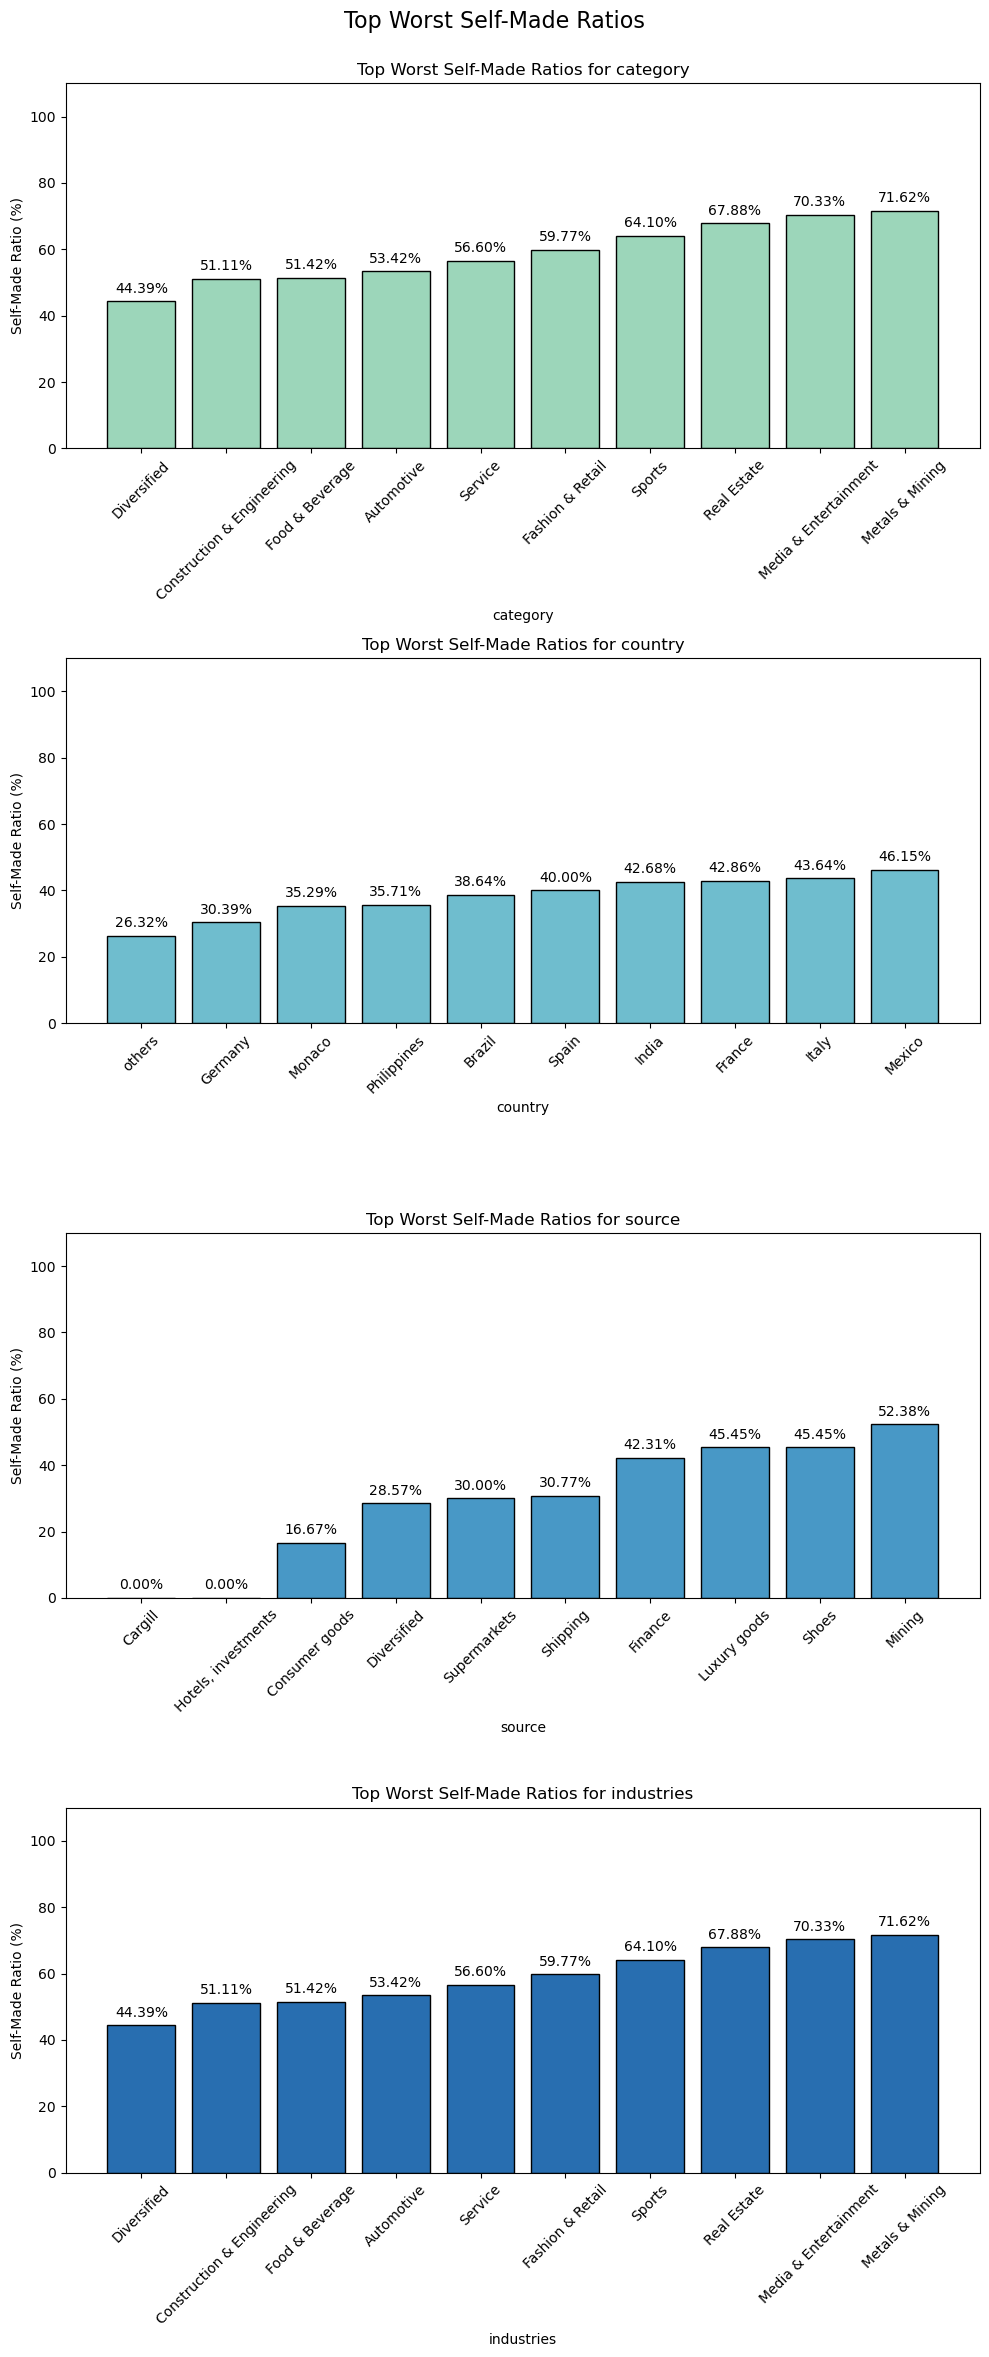

In [41]:
# Create subplots for the top self-made ratios
fig, axes = plt.subplots(nrows=len(data), figsize=(10, 6 * len(data)))
# Add a super title for the subplots
fig.suptitle("Top Worst Self-Made Ratios", fontsize=16)

# Create shade of blue colors for the bars
colors = ["#9cd6ba", "#6fbdce", "#4898c6", "#286eb0"]

# Plot the top worst self-made ratios for each categorical column
for i, (column, ratios) in enumerate(data.items()):
    ax = axes[i]
    bars = ax.bar(ratios.index, ratios.values,
                  color=colors[i], edgecolor="black")

    # Add labels and title
    ax.set_title(f"Top Worst Self-Made Ratios for {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Self-Made Ratio (%)")
    ax.tick_params(axis="x", rotation=45)
    ax.set_ylim(0, 110)

    # Annotate the bars with the self-made ratios values
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}%",
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 4), textcoords="offset points",
                    ha="center", va="bottom")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

**Nhận xét:**

Dựa vào kết quả phân tích dữ liệu, ta có thể rút ra một số nhận xét như sau:

1. **Theo nhóm ngành nghề (Category & Industries)**

   - **Ngành có tỷ lệ tự tạo thấp:**

     - Các nhóm như **Diversified (44.39%)**, **Construction & Engineering (51.11%)**, **Food & Beverage (51.42%)**, **Automotive (53.42%)** và **Service (56.60%)** cho thấy tỷ phú trong những lĩnh vực này chủ yếu đến từ nguồn thừa kế hoặc được gia đình hỗ trợ hơn là tự mình khởi nghiệp.

     - Điều này có thể gợi ý rằng ở các ngành truyền thống, có truyền thống kinh doanh gia đình hoặc cấu trúc thị trường đã ổn định, dẫn đến việc những người thành công thường là những người nối tiếp kinh doanh từ thế hệ trước.

   - **Những ngành khác có tỷ lệ tự tạo tương đối cao (mặc dù nằm trong danh sách “xấu nhất” so với các nhóm khác):**

     - **Media & Entertainment (70.33%)** và **Metals & Mining (71.62%)** tuy nằm ở cuối danh sách top worst nhưng tỷ lệ tự tạo của chúng vẫn cao hơn so với các nhóm khác trong bảng thống kê top worst.

     - Điều này cho thấy ngay cả trong một số ngành không thuộc “đỉnh” khởi nghiệp như công nghệ, vẫn có một phần không nhỏ tỷ phú tự tạo, phản ánh xu hướng khởi nghiệp và đổi mới trong các lĩnh vực đa dạng.

2. **Theo quốc gia (Country)**

   - **Quốc gia có tỷ lệ tự tạo thấp nhất:**

     - **Germany (30.39%)**, **Monaco (35.29%)** và **Philippines (35.71%)** đứng đầu danh sách với tỷ lệ tự tạo rất thấp.

     - Ở các quốc gia này, có thể hệ thống kinh tế, văn hóa doanh nghiệp và truyền thống gia đình mạnh mẽ, dẫn đến việc nhiều tỷ phú xuất phát từ nguồn thừa kế, hơn là sự khởi nghiệp tự thân.

   - **Các quốc gia khác:**

     - **Brazil (38.64%)**, **Spain (40.00%)**, **India (42.68%)**, **France (42.86%)**, **Italy (43.64%)**, **Mexico (46.15%)** và **South Korea (48.28%)** cũng có tỷ lệ tự tạo thấp, cho thấy ở một số nền kinh tế lớn, việc tích lũy của cải thông qua thừa kế vẫn chiếm một phần không nhỏ.

     - Điều này cho thấy rằng dù có sự phát triển kinh tế, nhưng truyền thống kinh doanh gia đình và di sản tài sản vẫn đóng vai trò quan trọng ở nhiều quốc gia.

3. **Theo nguồn tạo ra của cải (Source)**

   - **Nguồn có tỷ lệ tự tạo thấp đáng chú ý:**

     - **Cargill** và **Hotels, investments** có tỷ lệ tự tạo là **0%**, tức là tất cả các tỷ phú trong các nguồn này đều đến từ việc thừa kế hoặc được gia đình tạo dựng sẵn.

     - **Consumer goods (16.67%)** và **Diversified (28.57%)** cũng cho thấy tỷ lệ tỷ phú tự tạo rất thấp, cho thấy các lĩnh vực này thường gắn liền với các doanh nghiệp gia đình lâu đời hoặc các tập đoàn có lịch sử phát triển qua nhiều thế hệ.

   - **Những nguồn khác trong danh sách:**

     - Các nguồn như **Supermarkets (30.00%)**, **Shipping (30.77%)**, **Finance (42.31%)**, **Luxury goods (45.45%)**, **Shoes (45.45%)** và **Mining (52.38%)** cho thấy có một phần tỷ phú tự tạo nhất định, tuy nhiên vẫn thấp hơn so với các lĩnh vực hiện đại đòi hỏi khởi nghiệp mạnh mẽ (như E-commerce, Software, v.v.).

**Kết luận:**

- **Sự khác biệt giữa các ngành và nguồn tạo ra của cải:**

  - Các ngành truyền thống và các lĩnh vực có lịch sử lâu đời (Diversified, Construction & Engineering, Food & Beverage, Automotive, Service) thường có tỷ lệ tỷ phú tự tạo thấp, cho thấy sự phụ thuộc vào di sản tài sản và kinh doanh gia đình.

- **Ảnh hưởng của truyền thống kinh doanh theo quốc gia:**

  - Ở một số quốc gia như Germany, Monaco, và Philippines, tỷ lệ tỷ phú tự tạo cực kỳ thấp, cho thấy truyền thống doanh nghiệp gia đình hoặc hệ thống di sản tài sản vẫn mạnh mẽ, dẫn đến việc phần lớn của cải tập trung qua các thế hệ.

- **Nguồn tạo ra của cải và khởi nghiệp:**

  - Một số nguồn như Cargill hay Hotels, investments cho thấy không có tỷ phú tự tạo nào, nhấn mạnh rằng ở những lĩnh vực này, việc nối tiếp gia đình hoặc thừa kế là yếu tố chủ đạo trong sự thành công tài chính.


## 4.2. Phân tích mức độ giàu có của tỷ phú theo quốc gia (country)

Trong phần này, ta sẽ phân tích mức độ giàu có của tỷ phú theo quốc gia (`country`) bằng cách tính giá trị trung bình và độ lệch chuẩn của tổng tài sản ròng (`finalWorth`) cho mỗi quốc gia. Sau đó, ta sẽ sắp xếp các quốc gia theo giá trị trung bình từ cao xuống thấp và vẽ biểu đồ cột để trực quan hóa kết quả.

**Tiền xử lý dữ liệu:** Đầu tiên, ta sẽ nhóm các mẫu dữ liệu theo cột 'country' và tính giá trị trung bình, độ lệch chuẩn của cột 'finalWorth' cho mỗi quốc gia. Sau đó, ta sẽ sắp xếp các quốc gia theo giá trị trung bình từ cao xuống thấp. Ta sẽ chọn ra top 20 quốc gia có giá trị trung bình cao nhất để vẽ biểu đồ cột.


In [42]:
# Calculate the average wealth and standard deviation for each country
avg_wealth_country = \
    df.groupby("country")["finalWorth"].agg(["mean", "std"])\
      .sort_values(by="mean", ascending=False)

# Rename the columns for better interpretation
avg_wealth_country.columns = ["Average Wealth", "Standard Deviation"]

# Filter out the top 20 countries with the highest average wealth
top_avg_wealth_country = avg_wealth_country.head(20)

In [43]:
# Get the LaTeX representation of the top 20 countries
# with the highest average wealth
clipboard.copy(top_avg_wealth_country.to_latex())

# Display the top 20 countries with the highest average wealth
top_avg_wealth_country

Average Wealth  Standard Deviation
country                                                 
Uzbekistan              14400.000000                 NaN
France                  14271.428571        37150.873408
Belgium                 13733.333333        21795.030015
Mexico                  12746.153846        25032.399518
Nigeria                  9500.000000         4203.569911
Austria                  6854.545455         9544.041454
Eswatini (Swaziland)     6500.000000                 NaN
Colombia                 6400.000000                 NaN
Czech Republic           6114.285714         5546.599130
United States            6067.771883        13355.875045
Chile                    6066.666667         8386.099610
United Arab Emirates     5847.058824         5963.966554
Denmark                  5842.857143         2180.104847
Spain                    5348.000000        15048.951237
Switzerland              5255.128205         6685.740737
South Africa             5120.000000         4380.296794
New Zealand              5050.000000         5020.458146
Indonesia                4956.000000         7425.804109
Georgia                  4900.000000                 NaN
Hong Kong                4727.941176         6157.602887

Trực quan hóa kết quả bằng **biểu đồ cột** giúp ta dễ dàng so sánh mức độ giàu có của tỷ phú giữa các quốc gia, cũng như phần nào cảm nhận được sự phân bố (sự biến động) của giá trị tài sản ròng giữa các tỷ phú trong cùng một quốc gia.


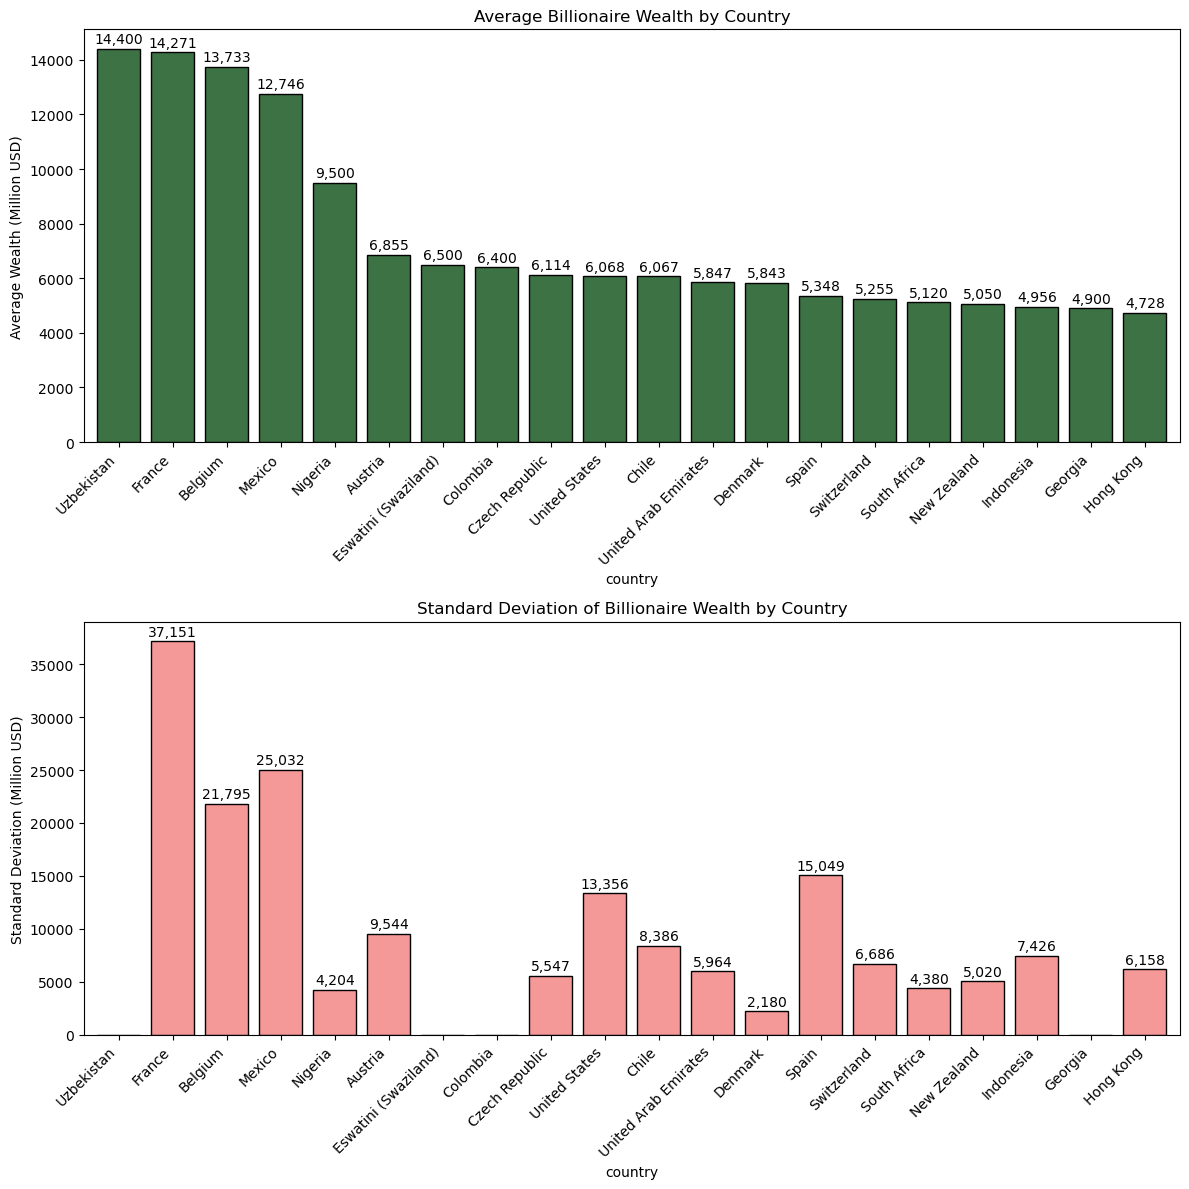

In [44]:
# Create subplots for average wealth and standard deviation
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 12))

# Plot average wealth
top_avg_wealth_country["Average Wealth"].plot(
    kind="bar", ax=ax1,
    edgecolor="black", color="#3d7244",
    width=0.8)
ax1.set_xticks(range(len(top_avg_wealth_country)))
ax1.set_xticklabels(top_avg_wealth_country.index, rotation=45, ha='right')
ax1.set_title("Average Billionaire Wealth by Country")
ax1.set_ylabel("Average Wealth (Million USD)")

# Annotate average wealth bars
for bar in ax1.patches:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 100,
             f'{height:,.0f}',
             ha='center', va='bottom')

# Plot standard deviation
top_avg_wealth_country["Standard Deviation"].plot(
    kind="bar", ax=ax2,
    edgecolor="black", color="#f49998",
    width=0.8)
ax2.set_xticks(range(len(top_avg_wealth_country)))
ax2.set_xticklabels(top_avg_wealth_country.index, rotation=45, ha='right')
ax2.set_title("Standard Deviation of Billionaire Wealth by Country")
ax2.set_ylabel("Standard Deviation (Million USD)")

# Annotate standard deviation bars
for bar in ax2.patches:
    height = bar.get_height()
    if height > 0:
        ax2.text(bar.get_x() + bar.get_width()/2, height + 250,
                 f'{height:,.0f}',
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Nhận xét:**

Dựa trên bảng thống kê về giá trị trung bình và độ lệch chuẩn của tổng tài sản ròng (finalWorth) theo quốc gia, ta có thể rút ra một số nhận xét quan trọng như sau:

1. **Ảnh hưởng của kích thước mẫu:**

   - Các quốc gia có độ lệch chuẩn là NaN (ví dụ: Uzbekistan, Eswatini, Colombia, Georgia) chỉ có 1 tỷ phú trong tập dữ liệu. Do đó, giá trị trung bình ở những quốc gia này chỉ phản ánh trường hợp đơn lẻ chứ không thể cho thấy phân bố hay mức độ biến động của của cải trong quốc gia đó.

2. **Các quốc gia có mức trung bình cao nhưng với mẫu ít:**

   - _Uzbekistan_ đứng đầu với giá trị trung bình 14400, nhưng chỉ có 1 tỷ phú nên không thể đánh giá sự phân bố của cải nội bộ.

   - _France_ (14271) và _Belgium_ (13733) cho thấy mức trung bình cao, tuy nhiên, độ lệch chuẩn lớn (37150 và 21795) cho thấy sự phân bố của cải rất rộng, tức là có những cá nhân vô cùng giàu có so với những người khác.

3. **Sự chênh lệch về mức độ giàu có giữa các quốc gia:**

   - _Mexico_ có mức trung bình 12746 với độ lệch chuẩn 25032, cho thấy mặc dù các tỷ phú ở đây có mức tài sản cao, sự chênh lệch giữa các cá nhân cũng khá lớn.

   - _Nigeria_ có mức trung bình 9500 và độ lệch chuẩn thấp hơn (4203), cho thấy mức tài sản của các tỷ phú Nigeria tương đối đồng đều hơn so với một số quốc gia khác.

4. **Quốc gia có số lượng tỷ phú lớn (như United States):**

   - _United States_ có mức trung bình 6068 với độ lệch chuẩn 13356. Điều này cho thấy mặc dù mức trung bình không phải là cao nhất, nhưng sự biến động rất lớn cho thấy sự chênh lệch giữa các tỷ phú Mỹ là đáng kể - có những cá nhân có tài sản cực kỳ cao trong khi số khác thấp hơn nhiều.

**Kết luận:**

- Việc sắp xếp các quốc gia theo giá trị trung bình giúp ta nhận ra rằng một số quốc gia có thể chỉ có một số ít tỷ phú cực kỳ giàu có (đẩy mức trung bình lên cao) trong khi các quốc gia khác, mặc dù có số lượng tỷ phú lớn, nhưng mức tài sản trung bình lại thấp hơn và đi kèm với sự phân bố rộng (độ lệch chuẩn lớn).

- Điều này gợi ý rằng môi trường kinh tế, cơ hội tích lũy của cải và cơ cấu xã hội - tài chính của mỗi quốc gia đều có ảnh hưởng đáng kể đến cách thức tạo ra và phân bố của cải của các tỷ phú.


## 4.3. Phân tích mức độ giàu có của các tỷ phú theo các ngành nghề (category và industries)

Trong phần này, ta sẽ phân tích mức độ giàu có của các tỷ phú theo các ngành nghề (category và industries) bằng cách tính tổng tài sản ròng (finalWorth) của các tỷ phú trong mỗi ngành. Từ đó, ta sẽ tính được tỷ lệ đóng góp của từng ngành vào tổng tài sản ròng của tất cả các tỷ phú trong tập dữ liệu. Thông qua đó, ta có thể đánh giá được sức mạnh và ảnh hưởng của từng ngành nghề trong việc tạo ra giàu có.


Đầu tiên, ta sẽ tính tổng tài sản ròng (finalWorth) của các tỷ phú trong mỗi ngành nghề (category và industries). Sau đó, ta sẽ tính tỷ lệ đóng góp của từng ngành vào tổng tài sản ròng của tất cả các tỷ phú trong tập dữ liệu. Cuối cùng, ta sẽ sắp xếp các ngành theo tỷ lệ đóng góp giảm dần.

In [45]:
# Calculate total wealth by industry
industry_wealth = df.groupby('industries')['finalWorth'].sum()
total_wealth = industry_wealth.sum()

# Calculate ratio of each industry's wealth to total wealth
industry_ratios = (industry_wealth / total_wealth * 100).round(2)

# Sort by ratio in descending order
industry_ratios = industry_ratios.sort_values(ascending=False)

# Create a dataframe with both total wealth and ratios
industry_summary = pd.DataFrame({
    'Total Wealth (Million USD)': industry_wealth,
    'Percentage of Total Wealth (%)': industry_ratios
})

# Sort by percentage
industry_summary = industry_summary.sort_values(
    'Percentage of Total Wealth (%)', ascending=False)

In [46]:
# Get the LaTeX representation of the industry summary
clipboard.copy(industry_summary.to_latex())

# Display the results
industry_summary

Total Wealth (Million USD)  \
industries                                               
Technology                                     1877900   
Fashion & Retail                               1698800   
Finance & Investments                          1605100   
Manufacturing                                  1019000   
Food & Beverage                                 957200   
Diversified                                     905200   
Real Estate                                     657400   
Healthcare                                      643200   
Automotive                                      525300   
Energy                                          453500   
Metals & Mining                                 446800   
Media & Entertainment                           427500   
Logistics                                       239500   
Telecom                                         203500   
Service                                         173400   
Sports                                          134500   
Gambling & Casinos                              120500   
Construction & Engineering                      118500   

                            Percentage of Total Wealth (%)  
industries                                                  
Technology                                           15.38  
Fashion & Retail                                     13.92  
Finance & Investments                                13.15  
Manufacturing                                         8.35  
Food & Beverage                                       7.84  
Diversified                                           7.42  
Real Estate                                           5.39  
Healthcare                                            5.27  
Automotive                                            4.30  
Energy                                                3.72  
Metals & Mining                                       3.66  
Media & Entertainment                                 3.50  
Logistics                                             1.96  
Telecom                                               1.67  
Service                                               1.42  
Sports                                                1.10  
Gambling & Casinos                                    0.99  
Construction & Engineering                            0.97

Vẽ **biểu đồ tròn** để thể hiện tỷ lệ đóng góp của từng ngành vào tổng tài sản ròng của tất cả các tỷ phú trong tập dữ liệu.


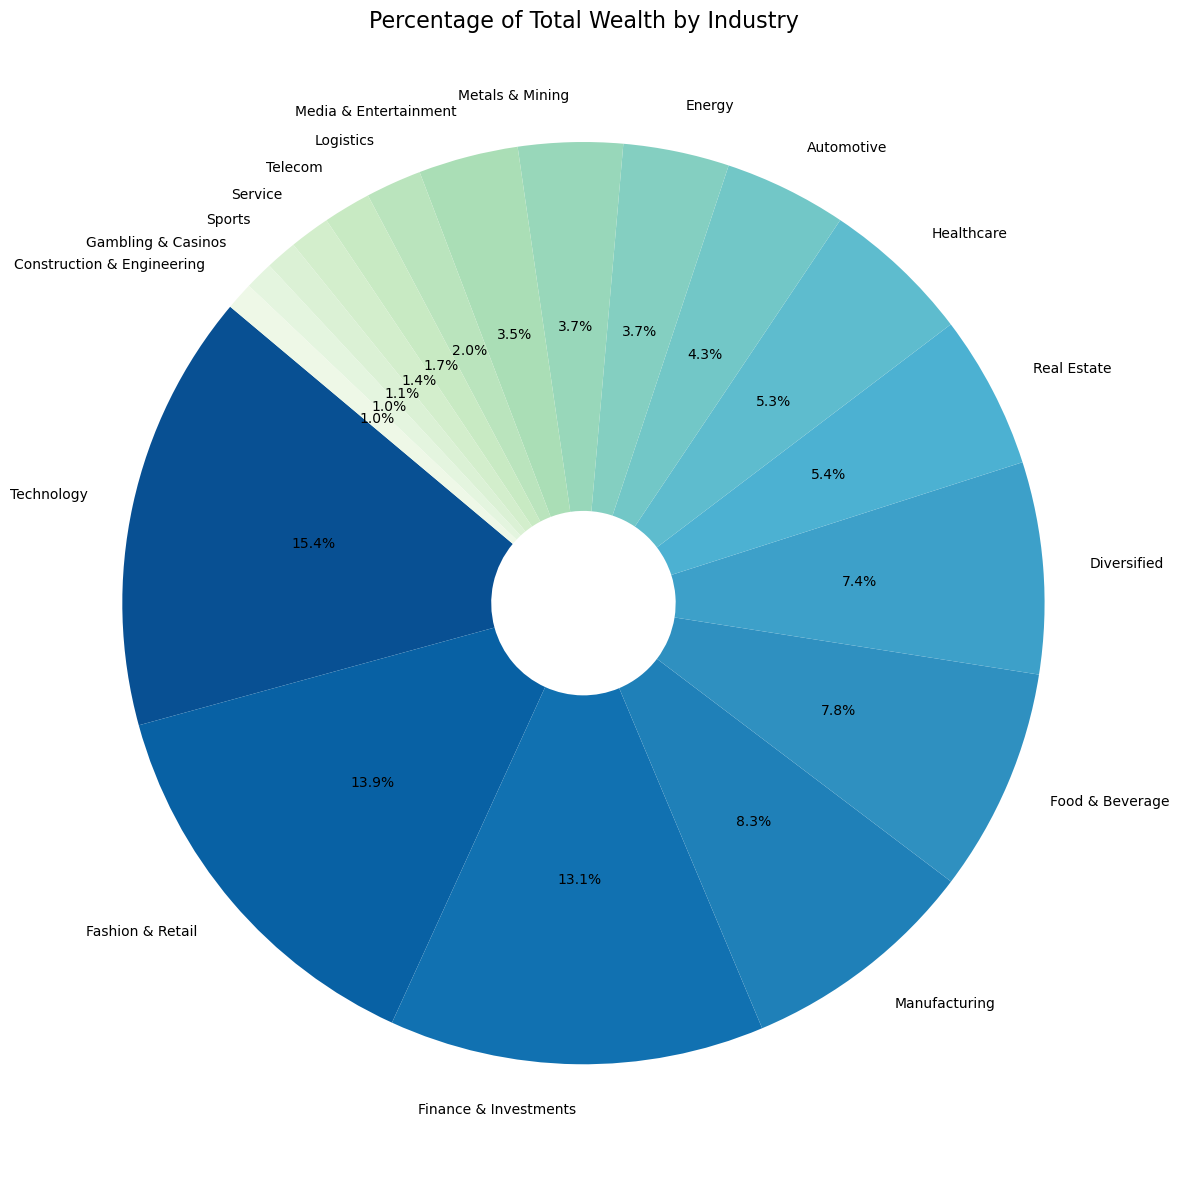

In [47]:
# Create a pie chart for the percentage of total wealth by industry
plt.figure(figsize=(12, 12))
plt.pie(
    industry_ratios, labels=industry_ratios.index,
    autopct='%1.1f%%', startangle=140,
    colors=sns.color_palette(palette='GnBu_r',
                             n_colors=len(industry_ratios)),
    wedgeprops=dict(width=0.8),
)

plt.axis('equal')
plt.title("Percentage of Total Wealth by Industry",
          fontdict={'fontsize': 16})
plt.tight_layout()
plt.show()

**Nhận xét:**

Dựa vào kết quả phân tích, ta có thể rút ra một số nhận xét sau:

1. **Tập trung của cải ở các ngành chủ chốt:**

   - Ba ngành đứng đầu về tổng tài sản ròng là **Technology (15.38%)**, **Fashion & Retail (13.92%)** và **Finance & Investments (13.15%)**. Điều này cho thấy khoảng 42% tổng giá trị của cải được tạo ra từ ba ngành này, nhấn mạnh vai trò then chốt của công nghệ, tiêu dùng và dịch vụ tài chính trong việc tạo ra giàu có.

2. **Sức mạnh của ngành công nghệ:**

   - Ngành Technology không chỉ đứng đầu về tỷ lệ phần trăm mà còn có tổng giá trị tài sản ròng cao nhất (1,877,900 triệu USD). Điều này phản ánh xu hướng chuyển dịch kinh tế số, sự phát triển nhanh chóng của các doanh nghiệp khởi nghiệp trong lĩnh vực công nghệ và sự mở rộng của thị trường toàn cầu.

3. **Ảnh hưởng của ngành thời trang và bán lẻ:**

   - Với tỷ lệ 13.92%, Fashion & Retail cũng là một trong những ngành quan trọng tạo ra của cải lớn. Sự phát triển của thị trường tiêu dùng toàn cầu và thương hiệu thời trang nổi tiếng góp phần đẩy mạnh sự tăng trưởng của ngành này.

4. **Ngành tài chính và đầu tư:**

   - Finance & Investments, với tỷ lệ 13.15%, cho thấy các hoạt động đầu tư và quản lý tài sản chiếm một vai trò không nhỏ trong việc tích lũy của cải của các tỷ phú. Đây là ngành có thể tận dụng các cơ hội từ thị trường tài chính phức tạp và đa dạng.

5. **Các ngành khác có đóng góp trung bình đến thấp:**

   - Các ngành như Manufacturing (8.35%), Food & Beverage (7.84%) và Diversified (7.42%) cũng đóng góp một phần không nhỏ, nhưng mức độ tạo ra của cải thấp hơn so với ba ngành hàng đầu.

   - Các ngành còn lại như Real Estate, Healthcare, Automotive, Energy, Metals & Mining, Media & Entertainment, Logistics, Telecom, Service, Sports, Gambling & Casinos và Construction & Engineering có tỷ lệ đóng góp giảm dần, cho thấy mức độ tập trung của cải trong các lĩnh vực này không bằng các ngành công nghệ, tiêu dùng và tài chính.

**Kết luận:**

- Phân tích cho thấy các ngành có khả năng tạo ra của cải khổng lồ thường là những ngành có tính đột phá công nghệ, khả năng mở rộng quy mô nhanh và thu hút đầu tư lớn. Trong khi đó, các ngành truyền thống hoặc vốn đã bão hòa (như một số ngành xây dựng, giải trí, hay thể thao) có phần hạn chế hơn về khả năng tạo ra của cải khổng lồ.


## 4.4. Phân tích tỷ lệ tỷ phú tự thân và tỷ phú thừa kế theo giới tính


Trong phần này, ta sẽ phân tích tỷ lệ tỷ phú tự thân và tỷ phú thừa kế theo giới tính. Đầu tiên, ta sẽ tiền xử lý dữ liệu để tính tỷ lệ tỷ phú tự thân và tỷ phú thừa kế theo giới tính. Ta sẽ dùng hàm `crosstab()` của thư viện `pandas` để tạo bảng tần số cho việc phân tích.


In [48]:
# Create a cross-tabulation of gender and self-made status
gender_selfmade = pd.crosstab(
    df['gender'], df['selfMade'], normalize='index') * 100

# Add a count column to show the total number for each gender
gender_count = pd.crosstab(df['gender'], df['selfMade'])
gender_count['Total'] = gender_count.sum(axis=1)

# Rename the columns for better interpretation
gender_selfmade = \
    gender_selfmade.rename(columns={False: 'Inherited', True: 'Self-Made'})
gender_count = \
    gender_count.rename(columns={False: 'Inherited', True: 'Self-Made'})

Tỷ lệ tỷ phú tự thân và tỷ phú thừa kế theo giới tính:

In [49]:
# Get the LaTeX representation of 
# percentage of self-made billionaires by gender
clipboard.copy(gender_selfmade.to_latex())

# Display the percentage of self-made billionaires by gender
print("Percentage of self-made billionaires by gender:")
gender_selfmade

Percentage of self-made billionaires by gender:


selfMade  Inherited  Self-Made
gender                        
F         71.513353  28.486647
M         25.488493  74.511507

Số lượng tỷ phú tự thân và tỷ phú thừa kế theo giới tính:

In [50]:
# Get the LaTeX representation of
# the number of billionaires by gender
clipboard.copy(gender_count.to_latex())

# Display the number of billionaires by gender
print("Count of billionaires by gender:")
gender_count

Count of billionaires by gender:


selfMade  Inherited  Self-Made  Total
gender                               
F               241         96    337
M               587       1716   2303

Trực qua hóa kết quả bằng biểu đồ tròn để thể hiện tỷ lệ tỷ phú tự thân và tỷ phú thừa kế giữa nam và nữ.


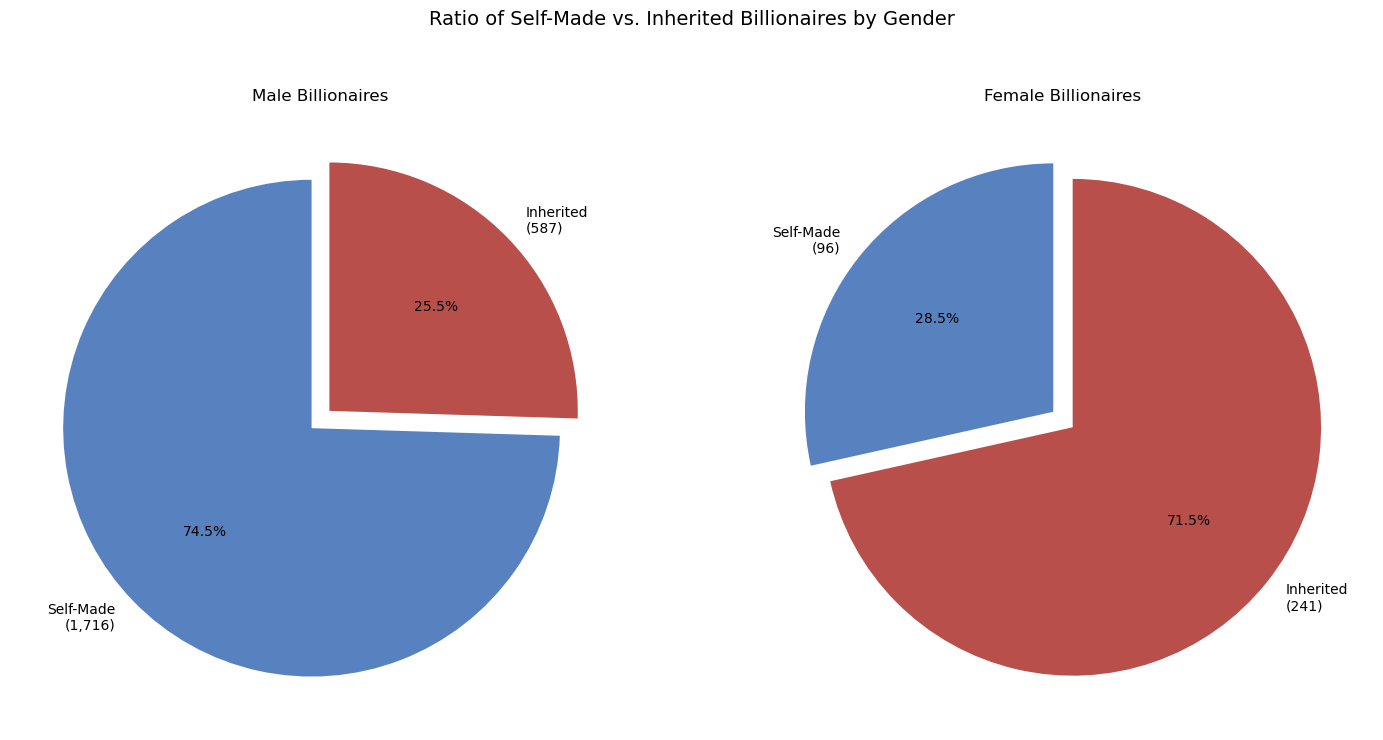

In [51]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Data for male billionaires
male_stats = gender_count.loc['M']
male_sizes = [male_stats['Self-Made'], male_stats['Inherited']]
male_labels = [f'Self-Made\n({male_stats["Self-Made"]:,})',
               f'Inherited\n({male_stats["Inherited"]:,})']

# Data for female billionaires
female_stats = gender_count.loc['F']
female_sizes = [female_stats['Self-Made'], female_stats['Inherited']]
female_labels = [f'Self-Made\n({female_stats["Self-Made"]:,})',
                 f'Inherited\n({female_stats["Inherited"]:,})']

# Colors for the pie charts
colors = ['#5782bf', '#b94f4b']

# Create explode tuples for each pie chart
male_explode = (0.05, 0.05)  # Equal separation for both pieces
female_explode = (0.05, 0.05)  # Equal separation for both pieces

# Create pie chart for males
ax1.pie(male_sizes, labels=male_labels, colors=colors, autopct='%1.1f%%',
        startangle=90, explode=male_explode)
ax1.set_title('Male Billionaires')

# Create pie chart for females
ax2.pie(female_sizes, labels=female_labels, colors=colors, autopct='%1.1f%%',
        startangle=90, explode=female_explode)
ax2.set_title('Female Billionaires')

plt.suptitle('Ratio of Self-Made vs. Inherited Billionaires by Gender',
             fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

**Nhận xét:**

Dựa vào bảng thống kê, ta có thể rút ra các nhận xét và insight sau:

- **Sự chênh lệch rõ rệt theo giới tính:**

  - Ở nhóm tỷ phú nữ, **71,51%** (241 trên 337) có nguồn gốc từ thừa kế, chỉ có **28,49%** (96 trên 337) là tự tạo ra của cải.

  - Ngược lại, đối với tỷ phú nam, **74,51%** (1716 trên 2303) là tự tạo ra của cải, chỉ có **25,49%** (587 trên 2303) có nguồn gốc từ thừa kế.

- **Ý nghĩa của kết quả:**

  - Điều này cho thấy trong giới tỷ phú, tỷ lệ tỷ phú tự tạo và thừa kế rất khác nhau giữa nam và nữ.

  - Phần lớn các tỷ phú nữ có vẻ đến từ các gia đình có truyền thống kinh doanh hay tài sản được di sản qua các thế hệ, trong khi tỷ phú nam thường khởi nghiệp và tự kiến tạo của cải.

- **Nguyên nhân tiềm ẩn:**

  - Sự chênh lệch này có thể phản ánh các rào cản và định kiến xã hội đã tồn tại trong quá khứ, khiến cho phụ nữ có ít cơ hội để khởi nghiệp và tích lũy của cải theo cách tự tạo.

  - Ngoài ra, việc tỷ phú nữ chủ yếu đến từ nguồn thừa kế cũng cho thấy rằng trong các gia đình có nguồn lực tài chính lớn, phụ nữ có thể được hưởng lợi từ truyền thống gia đình, mặc dù họ lại không có cơ hội hoặc lựa chọn phát triển sự nghiệp độc lập như tỷ phú nam.

- **Ý nghĩa đối với xu hướng phát triển:**

  - Sự khác biệt này không chỉ phản ánh lịch sử mà còn là một chỉ báo quan trọng cho các chính sách thúc đẩy bình đẳng giới và khuyến khích phụ nữ tham gia vào khởi nghiệp và các lĩnh vực sáng tạo kinh doanh.

  - Việc thúc đẩy các chương trình hỗ trợ khởi nghiệp cho phụ nữ có thể góp phần thay đổi xu hướng này trong tương lai, tăng tỷ lệ phụ nữ tự tạo ra của cải.


## 4.5. Phân tích số lượng tỷ phú tự thân và tỷ phú thừa kế theo quốc gia


Trong phần này, ta sẽ phân tích số lượng tỷ phú tự thân và tỷ phú thừa kế trong mỗi quốc gia. Đầu tiên, ta sẽ tiền xử lý dữ liệu để tính số lượng tỷ phú tự thân và tỷ phú thừa kế theo quốc gia. Ta sẽ dùng hàm `crosstab()` của thư viện `pandas` để tạo bảng tần số cho việc phân tích. Ta chỉ lấy top 10 quốc gia có tổng số tỷ phú cao nhất để phân tích.

In [52]:
# Create a cross-tabulation of country and self-made status
country_selfmade = pd.crosstab(df["country"], df["selfMade"])

# Rename the columns for better interpretation
country_selfmade = country_selfmade.rename(
    columns={False: "Inherited", True: "Self-Made"})

# Add a total count column and calculate self-made percentage
country_selfmade["Total"] = country_selfmade.sum(axis=1)
country_selfmade["Self-Made (%)"] = \
    (country_selfmade["Self-Made"] / country_selfmade["Total"] * 100).round(2)

# Sort by total count descending and get the top 10 countries
country_selfmade = country_selfmade.sort_values(
    by="Total", ascending=False).head(10)

In [53]:
# Get the LaTeX representation of the percentage
# of self-made billionaires by country
clipboard.copy(country_selfmade.to_latex())

# Display the percentage of self-made billionaires by country
country_selfmade

selfMade        Inherited  Self-Made  Total  Self-Made (%)
country                                                   
United States         214        540    754          71.62
China                  17        506    523          96.75
India                  90         67    157          42.68
Germany                71         31    102          30.39
United Kingdom         24         58     82          70.73
Russia                  0         79     79         100.00
Switzerland            34         44     78          56.41
Hong Kong              24         44     68          64.71
Italy                  31         24     55          43.64
Singapore              17         29     46          63.04

Trực quan hóa kết quả bằng một biểu đồ heatmap để so sánh số lượng tỷ phú tự thân và tỷ phú thừa kế giữa các quốc gia.


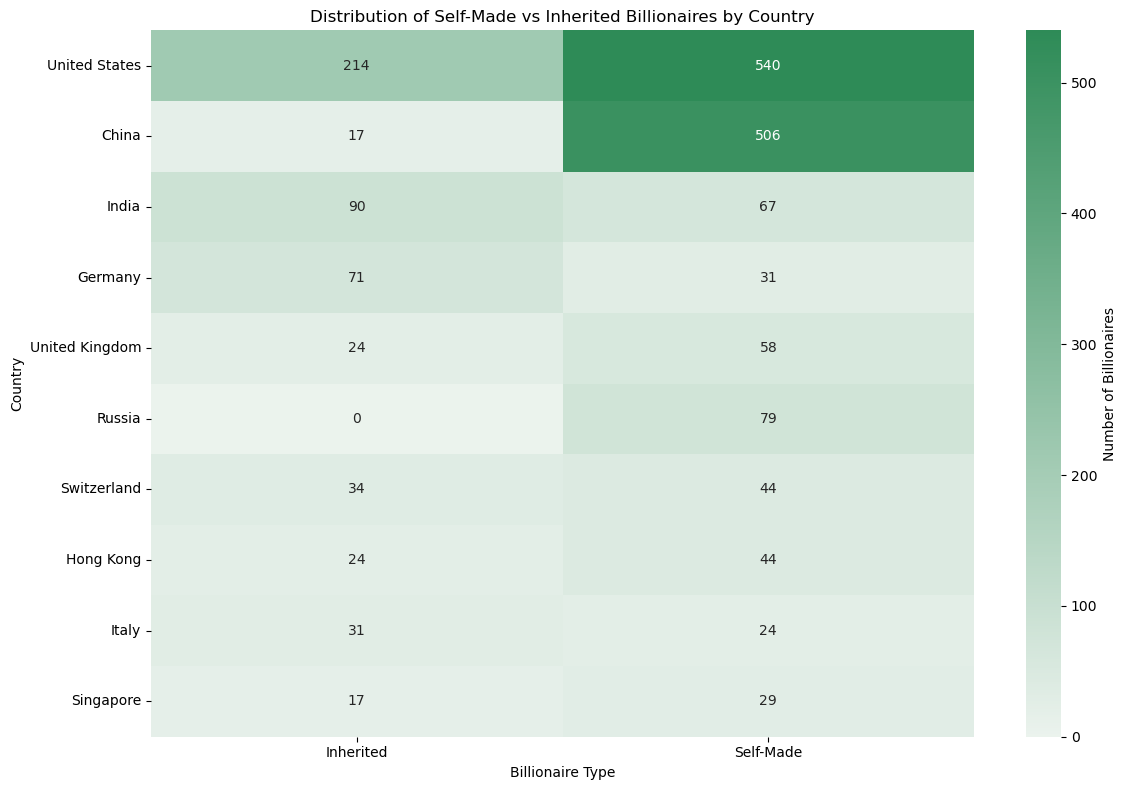

In [54]:
# Create a pivot table to show self-made vs inherited billionaires by country
pivot_data = pd.crosstab(df['country'], df['selfMade'])

# Rename columns for better readability
pivot_data = pivot_data.rename(columns={False: 'Inherited', True: 'Self-Made'})

# Get top 10 countries by total number of billionaires
top_countries = pivot_data.sum(axis=1).sort_values(
    ascending=False).head(10).index

# Filter pivot table for top countries
pivot_data = pivot_data.loc[top_countries]

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data,
            annot=True,  # Show values
            fmt='g',  # Format as integer
            cmap=sns.light_palette("seagreen", as_cmap=True),  # Color scheme
            cbar_kws={'label': 'Number of Billionaires'})

plt.title('Distribution of Self-Made vs Inherited Billionaires by Country')
plt.ylabel('Country')
plt.xlabel('Billionaire Type')

plt.tight_layout()
plt.show()

**Nhận xét:**

Dựa vào kết quả phân tích, ta có thể rút ra một số nhận xét như sau:

1. **Tổng quan về số lượng tỷ phú theo quốc gia**

   - **Số lượng tổng thể:**

     - Các quốc gia như **United States** (754 tỷ phú) và **China** (523 tỷ phú) có số lượng tỷ phú cao nhất trong top 10, cho thấy chúng là những trung tâm kinh tế lớn với nhiều nguồn tạo ra của cải.

     - Trong khi đó, một số quốc gia khác như **Russia** (79) và **Singapore** (46) có số lượng tỷ phú khiêm tốn hơn.

2. **Tỷ lệ tỷ phú tự tạo theo quốc gia**

   - **Các quốc gia có tỷ lệ tự tạo cao:**

     - **Russia** có tỷ lệ 100% và **China** có tỷ lệ 96.75%, nghĩa là hầu hết các tỷ phú ở đây đều là tự tạo ra của cải.

     - **United States** (71.62%) và **United Kingdom** (70.73%) cũng có tỷ lệ tự tạo cao, phản ánh xu hướng khởi nghiệp mạnh mẽ ở những quốc gia này.

   - **Các quốc gia có tỷ lệ tự tạo thấp:**

     - **Germany** chỉ đạt 30.39% và **Italy** 43.64%, cho thấy phần lớn các tỷ phú ở đây đến từ nguồn thừa kế.

     - **India** cũng có tỷ lệ tự tạo khá thấp (42.68%), ngụ ý rằng ở Ấn Độ, các tỷ phú phần lớn có nguồn gốc từ gia đình.

3. **So sánh giữa các quốc gia**

   - **Về số lượng và chất lượng của cải:**

     - **United States:** Dù có số lượng tỷ phú lớn, tỷ lệ tự tạo (71.62%) cho thấy phần đáng kể của cải được tạo ra nhờ khởi nghiệp, mặc dù vẫn có một phần không nhỏ là thừa kế (28.38%).

     - **China và Russia:** Gần như toàn bộ tỷ phú đều là tự tạo, cho thấy môi trường khởi nghiệp và khả năng biến cơ hội thành của cải là rất mạnh.

     - **Germany, India và Italy:** Những quốc gia này có tỷ lệ tự tạo thấp, điều này có thể phản ánh truyền thống kinh doanh gia đình lâu đời hoặc sự hạn chế về cơ hội khởi nghiệp đối với các cá nhân.

**Kết luận:**

- **Môi trường kinh doanh và văn hóa khởi nghiệp:**  
  Các quốc gia có tỷ lệ tỷ phú tự tạo cao (như China, Russia, United States, United Kingdom) thường có văn hóa khởi nghiệp mạnh mẽ, tạo điều kiện cho các doanh nhân tự kiến tạo của cải.

- **Vai trò của truyền thống gia đình và thừa kế:**  
  Ở một số quốc gia như Germany, India và Italy, tỷ phú thừa kế chiếm phần trăm lớn, cho thấy di sản tài sản và truyền thống kinh doanh gia đình vẫn đóng vai trò quan trọng trong việc tích lũy của cải.

- **Sự đa dạng về quy mô:**  
  Số lượng tỷ phú và tỷ lệ tự tạo khác nhau giữa các quốc gia phản ánh không chỉ sự phát triển kinh tế mà còn đặc điểm văn hóa, chính sách hỗ trợ doanh nghiệp và truyền thống gia đình tại mỗi quốc gia.


## 4.6. Phân tích số lượng tỷ phú tự thân và tỷ phú thừa kế theo các ngành nghề (category và industries)

Trong phần này, ta sẽ phân tích số lượng tỷ phú tự thân và tỷ phú thừa kế trong mỗi ngành nghề (category và industries). Đầu tiên, ta sẽ tiền xử lý dữ liệu để tính số lượng tỷ phú tự thân và tỷ phú thừa kế theo ngành nghề. Ta sẽ dùng hàm `crosstab()` của thư viện `pandas` để tạo bảng tần số cho việc phân tích. Sau đó, ta sẽ sắp xếp các ngành theo tổng số lượng tỷ phú giảm dần.

In [55]:
# Create a cross-tabulation of industries and self-made status
industry_selfmade = pd.crosstab(df["industries"], df["selfMade"])

# Rename the columns for better interpretation
industry_selfmade = industry_selfmade.rename(
    columns={False: "Inherited", True: "Self-Made"})

# Add total count and self-made percentage columns
industry_selfmade["Total"] = industry_selfmade.sum(axis=1)
industry_selfmade["Self-Made (%)"] = \
    (industry_selfmade["Self-Made"] /
     industry_selfmade["Total"] * 100).round(2)

# Sort by total count descending
industry_selfmade = industry_selfmade.sort_values(by="Total", ascending=False)

In [56]:
# Get the LaTeX representation of the percentage
# of self-made billionaires by industry
clipboard.copy(industry_selfmade.to_latex())

# Display the percentage of self-made billionaires by industry
industry_selfmade

selfMade                    Inherited  Self-Made  Total  Self-Made (%)
industries                                                            
Finance & Investments              96        276    372          74.19
Manufacturing                      89        235    324          72.53
Technology                         22        292    314          92.99
Fashion & Retail                  107        159    266          59.77
Food & Beverage                   103        109    212          51.42
Healthcare                         55        146    201          72.64
Real Estate                        62        131    193          67.88
Diversified                       104         83    187          44.39
Energy                             27         73    100          73.00
Media & Entertainment              27         64     91          70.33
Metals & Mining                    21         53     74          71.62
Automotive                         34         39     73          53.42
Service                            23         30     53          56.60
Construction & Engineering         22         23     45          51.11
Logistics                          11         29     40          72.50
Sports                             14         25     39          64.10
Telecom                             5         26     31          83.87
Gambling & Casinos                  6         19     25          76.00

Trực quan hóa kết quả bằng biểu đồ cột chồng (stacked bar chart) để so sánh số lượng tỷ phú tự thân và tỷ phú thừa kế giữa các ngành nghề.


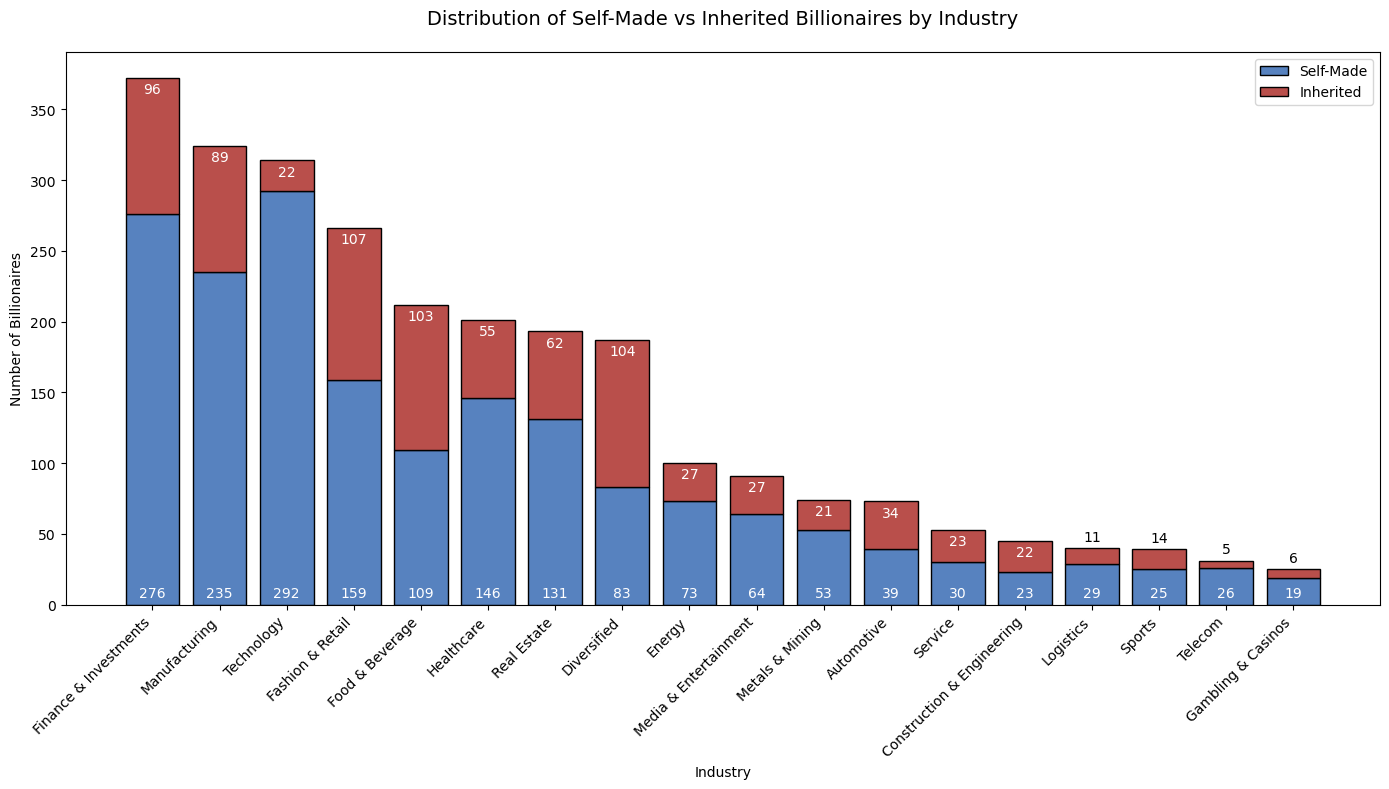

In [57]:
# Create a figure
plt.figure(figsize=(14, 8))

# Create the stacked bar chart
bars = plt.bar(industry_selfmade.index, industry_selfmade["Self-Made"],
               color='#5782bf', edgecolor='black', label='Self-Made')
plt.bar(industry_selfmade.index, industry_selfmade["Inherited"],
        bottom=industry_selfmade["Self-Made"],
        color='#b94f4b', edgecolor='black', label='Inherited')

# Customize the plot
plt.title('Distribution of Self-Made vs Inherited Billionaires by Industry',
          fontsize=14, pad=20)
plt.xlabel('Industry')
plt.ylabel('Number of Billionaires')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Add value annotations
for i, industry in enumerate(industry_selfmade.index):
    total = industry_selfmade.loc[industry, "Total"]
    self_made = industry_selfmade.loc[industry, "Self-Made"]
    inherited = industry_selfmade.loc[industry, "Inherited"]

    # Add self-made count
    # plt.text(i, self_made/2, f'{self_made}',
    #          ha='center', va='center', color='white')
    plt.text(i, 8, f'{self_made}',
             ha='center', va='center', color='white')

    # Add inherited count
    # plt.text(i, self_made + inherited/2, f'{inherited}',
    #          ha='center', va='center', color='white')
    if inherited > 15:
        plt.text(i, self_made + inherited - 8, f'{inherited}',
                 ha='center', va='center', color='white')
    else:
        plt.text(i, self_made + inherited + 8, f'{inherited}',
                 ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

**Nhận xét:**

Dựa vào kết quả phân tích, ta có thể rút ra một số nhận xét sau:

1. **Phân bố số lượng tỷ phú theo ngành nghề**

   - **Các ngành có tổng số lượng tỷ phú cao nhất:**

     - **Finance & Investments** có 372 tỷ phú, **Manufacturing** và **Technology** lần lượt có 324 và 314 tỷ phú. Đây là những ngành có sự tập trung của cải lớn, cho thấy vai trò quan trọng trong việc tạo ra của cải của các tỷ phú.

   - **Các ngành có tổng số lượng thấp hơn:**

     - Các ngành như **Telecom** (31), **Gambling & Casinos** (25) hay **Sports** (39) có tổng số lượng tỷ phú khiêm tốn hơn, tuy nhiên tỷ lệ tự tạo hoặc thừa kế trong từng ngành có thể khá khác biệt.

2. **Tỷ lệ tỷ phú tự tạo**

   - **Các ngành có tỷ lệ tự tạo rất cao:**

     - **Technology** đạt 92.99% và **Telecom** 83.87%, cho thấy hầu hết các tỷ phú trong các ngành này là tự tạo. Điều này phản ánh môi trường khởi nghiệp mạnh mẽ và sự đổi mới sáng tạo trong lĩnh vực công nghệ và viễn thông.

   - **Các ngành có tỷ lệ tự tạo trung bình đến cao:**

     - **Finance & Investments** (74.19%), **Manufacturing** (72.53%), **Healthcare** (72.64%), và **Energy** (73.00%) cho thấy đa số các tỷ phú trong các ngành này đều tự tạo ra của cải, mặc dù vẫn tồn tại nhóm tỷ phú thừa kế.

   - **Các ngành có tỷ lệ tự tạo thấp:**

     - **Diversified** chỉ đạt 44.39%, **Food & Beverage** (51.42%), **Construction & Engineering** (51.11%), và **Fashion & Retail** (59.77%) cho thấy rằng ở một số ngành truyền thống hoặc ngành có truyền thống gia đình mạnh, tỷ phú thừa kế chiếm tỉ lệ đáng kể.

**Kết luận:**

- **Môi trường khởi nghiệp và đổi mới sáng tạo:**

  - Các ngành có tỷ lệ tự tạo rất cao như **Technology** và **Telecom** cho thấy môi trường kinh doanh năng động, khuyến khích khởi nghiệp và đổi mới sáng tạo. Đây là những lĩnh vực mà các doanh nhân thường tạo ra các đế chế kinh doanh từ đầu.

  - Hiểu được tỷ lệ tự tạo cao trong các ngành như Technology và Telecom có thể cho thấy các doanh nghiệp trong những lĩnh vực này có khả năng tăng trưởng mạnh mẽ và đột phá, do đó là môi trường thuận lợi cho đầu tư mạo hiểm và khởi nghiệp.

- **Vai trò của truyền thống gia đình và di sản tài sản:**

  - Ngược lại, các ngành như **Diversified**, **Food & Beverage**, và **Construction & Engineering** có tỷ lệ tự tạo thấp, cho thấy sự phụ thuộc vào nguồn thừa kế hoặc kinh doanh gia đình. Điều này có thể phản ánh bối cảnh lịch sử và văn hóa của ngành nghề đó.

- **Cân bằng giữa tự tạo và thừa kế:**

  - Một số ngành như **Finance & Investments** và **Manufacturing** mặc dù có tổng số lượng tỷ phú lớn, nhưng tỷ lệ tự tạo chiếm khoảng 72-74%, cho thấy rằng mặc dù đa số tỷ phú tự tạo, nhóm thừa kế cũng vẫn chiếm phần đáng kể, phản ánh sự pha trộn giữa đổi mới và truyền thống.

- **Đối với hoạch định chính sách:**

  - Các quốc gia có sự tập trung của cải chủ yếu đến từ các ngành tự tạo cần tạo điều kiện thuận lợi cho khởi nghiệp và đổi mới sáng tạo. Ngược lại, ở những ngành có tỷ lệ thừa kế cao, có thể cần các chính sách hỗ trợ nhằm thúc đẩy sự cạnh tranh và tăng cường chuyển giao công nghệ.

- **Đối với nghiên cứu thị trường:**

  - Phân tích sự khác biệt giữa các ngành cho thấy rằng cấu trúc tạo ra của cải rất đa dạng, từ các ngành đột phá đến những ngành có truyền thống gia đình lâu đời. Điều này giúp các nhà nghiên cứu hiểu rõ hơn về động lực của sự giàu có trong từng ngành và đề xuất các chiến lược phát triển phù hợp.


## 4.7. Phân tích số lượng tỷ phú nam và tỷ phú nữ trong các ngành nghề (category và industries)


Trong phần này ta sẽ phân tích số lượng tỷ phú nam và tỷ phú nữ trong từng ngành nghề (category và industries). Thông qua đó, ta có thể hiểu được sự tập trung của cải giữa nam và nữ trong các ngành nghề khác nhau.

Đầu tiên, ta sẽ tiền xử lý dữ liệu để tính số lượng tỷ phú nam và tỷ phú nữ trong từng ngành nghề. Ta sẽ dùng hàm `crosstab()` của thư viện `pandas` để tạo bảng tần số cho việc phân tích. Sau đó, ta sẽ sắp xếp các ngành theo tổng số lượng tỷ phú giảm dần.


In [58]:
# Create a cross-tabulation of industries and gender
industry_gender = pd.crosstab(df["industries"], df["gender"])

# Add total count and female percentage columns
industry_gender["Total"] = industry_gender.sum(axis=1)
industry_gender["Female (%)"] = \
    (industry_gender["F"] / industry_gender["Total"] * 100).round(2)

# Sort by total count descending
industry_gender = industry_gender.sort_values(by="Total", ascending=False)

In [59]:
# Get the LaTeX representation of the percentage
# of Female billionaires by industry
clipboard.copy(industry_gender.to_latex())

# Display the percentage of Female billionaires by industry
industry_gender

gender                       F    M  Total  Female (%)
industries                                            
Finance & Investments       30  342    372        8.06
Manufacturing               45  279    324       13.89
Technology                  30  284    314        9.55
Fashion & Retail            39  227    266       14.66
Food & Beverage             45  167    212       21.23
Healthcare                  28  173    201       13.93
Real Estate                 22  171    193       11.40
Diversified                 29  158    187       15.51
Energy                      10   90    100       10.00
Media & Entertainment       12   79     91       13.19
Metals & Mining              9   65     74       12.16
Automotive                   7   66     73        9.59
Service                      9   44     53       16.98
Construction & Engineering   6   39     45       13.33
Logistics                    6   34     40       15.00
Sports                       6   33     39       15.38
Telecom                      0   31     31        0.00
Gambling & Casinos           4   21     25       16.00

Trực quan hóa kết quả bằng biểu đồ cột kép (grouped bar chart) để so sánh số lượng tỷ phú nam và tỷ phú nữ giữa các ngành nghề.

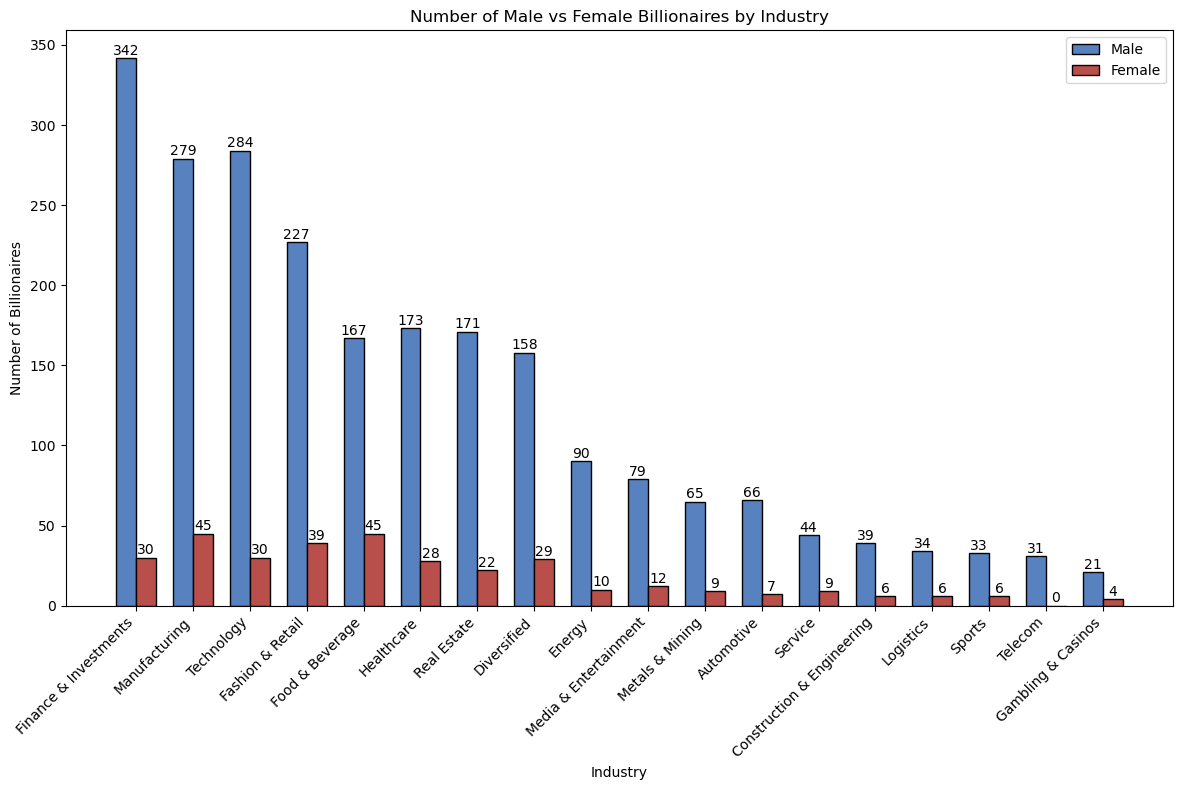

In [60]:
# Create a figure
plt.figure(figsize=(12, 8))

# Set the width of each bar and positions of the bars
width = 0.35
x = np.arange(len(industry_gender))

# Create bars for male and female
plt.bar(x - width/2, industry_gender["M"], width,
        label='Male', color='#5782bf', edgecolor='black')
plt.bar(x + width/2, industry_gender["F"], width,
        label='Female', color='#b94f4b', edgecolor='black')

# Customize the plot
plt.title('Number of Male vs Female Billionaires by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Billionaires')
plt.xticks(x, industry_gender.index, rotation=45, ha='right')
plt.legend()

# Add annotations for each bar
for i, v in enumerate(industry_gender["M"]):
    plt.text(i - width/2, v + 2, str(v), ha='center')
for i, v in enumerate(industry_gender["F"]):
    plt.text(i + width/2, v + 2, str(v), ha='center')

plt.tight_layout()
plt.show()

**Nhận xét:**

Dựa vào kết quả phân tích dữ liệu, ta có thể rút ra một số nhận xét và insight như sau:

1. **Tổng quan về số lượng và tỷ lệ theo ngành**

   - **Số lượng tổng thể:** Các ngành có số lượng tỷ phú lớn nhất là **Finance & Investments** (372), **Manufacturing** (324) và **Technology** (314). Đây là các ngành có sự tập trung của cải lớn nhưng lại có tỷ lệ tỷ phú nữ rất thấp.

   - **Tỷ lệ tỷ phú nữ (Female %):**

     - Ở **Finance & Investments**, chỉ có 8,06% là tỷ phú nữ, trong khi **Technology** chỉ đạt 9,55%.

     - Các ngành khác như **Manufacturing** (13,89%) và **Fashion & Retail** (14,66%) có tỷ lệ nữ cao hơn nhưng vẫn dưới 15%.

2. **Sự phân bố theo ngành giữa tỷ phú nam và nữ**

   - **Ngành có tỷ lệ nữ cao hơn (mặc dù số lượng không quá lớn):**

     - **Food & Beverage** có tỷ lệ tỷ phú nữ cao nhất (21,23%), cho thấy các tỷ phú nữ có xu hướng tập trung hơn vào ngành thực phẩm và đồ uống.

     - Các ngành như **Service** (16,98%), **Gambling & Casinos** (16,00%), **Diversified** (15,51%), **Sports** (15,38%) và **Logistics** (15,00%) cũng cho thấy tỷ lệ nữ cao hơn so với các ngành kỹ thuật hay tài chính.

   - **Ngành bị chi phối bởi tỷ phú nam:**

     - **Finance & Investments**, **Technology**, **Manufacturing** và **Telecom** (0% nữ) là những ngành hầu như chỉ có tỷ phú nam chiếm đa số, cho thấy môi trường kinh doanh và văn hóa khởi nghiệp trong những lĩnh vực này vẫn ưu tiên hoặc dễ tạo ra của cải cho nam giới hơn.

**Một số insight:**

- **Sự tập trung của cải theo giới:**

  - Các ngành kỹ thuật, tài chính và sản xuất (như Finance & Investments, Technology, Manufacturing) có sự chênh lệch rõ rệt giữa tỷ phú nam và nữ, với tỷ lệ nữ chỉ dao động từ 8% đến 14%. Điều này cho thấy môi trường trong những lĩnh vực này có thể mang tính cạnh tranh cao và chưa tạo được nhiều cơ hội cho phụ nữ khởi nghiệp độc lập.

- **Ngành phù hợp với tỷ phú nữ:**

  - Một số ngành có tính chất tiêu dùng, dịch vụ hoặc liên quan đến thẩm mỹ, nghệ thuật như Food & Beverage, Fashion & Retail, Service và Gambling & Casinos có tỷ lệ nữ cao hơn (từ 14% đến 21%). Điều này gợi ý rằng các tỷ phú nữ có xu hướng tập trung vào các lĩnh vực này, nơi các yếu tố như thương hiệu, thị hiếu tiêu dùng và sự sáng tạo đóng vai trò quan trọng.

- **Ý nghĩa đối với chính sách và hỗ trợ khởi nghiệp:**

  - Sự chênh lệch rõ rệt giữa tỷ phú nam và nữ trong các ngành chủ chốt như tài chính, công nghệ hay sản xuất cho thấy cần có các chính sách, chương trình hỗ trợ khởi nghiệp và đào tạo đặc thù nhằm tạo cơ hội cho phụ nữ phát triển trong các lĩnh vực này.

**Kết luận:**

- Như vậy, kết quả phân tích cho thấy rằng các tỷ phú nữ thường tập trung vào các ngành có tính chất tiêu dùng, dịch vụ và sáng tạo, trong khi các ngành kỹ thuật, tài chính và sản xuất vẫn là lĩnh vực chủ yếu tạo ra của cải cho tỷ phú nam. Điều này không chỉ phản ánh sự khác biệt về văn hóa kinh doanh và cơ hội khởi nghiệp giữa hai giới mà còn là cơ sở để hoạch định các chiến lược thúc đẩy bình đẳng giới trong kinh doanh và khởi nghiệp.


## 4.8. Phân tích mức độ giàu có của các tỷ phú theo độ tuổi

Trong phần này ta sẽ phân tích mức độ giàu có của các tỷ phú theo độ tuổi. Thông qua đó, ta có thể hiểu được xu hướng tích lũy tài sản của các tỷ phú theo các nhóm tuổi khác nhau.

Đầu tiên, ta sẽ tiền xử lý dữ liệu để tạo các nhóm tuổi với khoảng cách 10 năm bằng cách sử dụng hàm `pd.cut()` của thư viện `pandas`. Sau đó, ta tính giá trị trung bình, độ lệch chuẩn và số lượng tỷ phú trong mỗi nhóm tuổi bằng cách nhóm dữ liệu theo trường `age_group` và sử dụng hàm `groupby()` kết hợp với `agg()` trên cột `finalWorth`. Kết quả thống kê sẽ được sắp xếp tăng dần theo các nhóm tuổi.


In [61]:
# Create age groups with 10-year intervals
df['age_group'] = pd.cut(df['age'], bins=range(0, 111, 10), right=False)

# Calculate average wealth by age group
age_wealth = df.groupby('age_group', observed=False)[
    'finalWorth'].agg(['mean', 'std', 'count'])

# Check if the sum of counts equals the total number of records
assert age_wealth['count'].sum() == len(df), "Counts do not match!" # 2640

In [62]:
# Get the LaTeX representation of the average wealth by age group
clipboard.copy(age_wealth.to_latex())

# Display the average wealth by age group
age_wealth

mean           std  count
age_group                                   
[0, 10)             NaN           NaN      0
[10, 20)    2600.000000   1272.792206      2
[20, 30)    2133.333333    913.783344      9
[30, 40)    5669.642857  11101.939546     56
[40, 50)    3230.092593   5835.175770    216
[50, 60)    4335.759494  10022.269327    632
[60, 70)    4234.491979   8235.802770    748
[70, 80)    4845.882353  11190.447873    595
[80, 90)    6050.495050  11202.125127    303
[90, 100)   6944.871795  12992.091975     78
[100, 110)  1300.000000           NaN      1

Trực quan hóa dữ liệu về giá trị trung bình tài sản ròng của các tỷ phú theo từng nhóm tuổi và số lượng tỷ phú trong từng nhóm tuổi bằng biểu đồ cột.


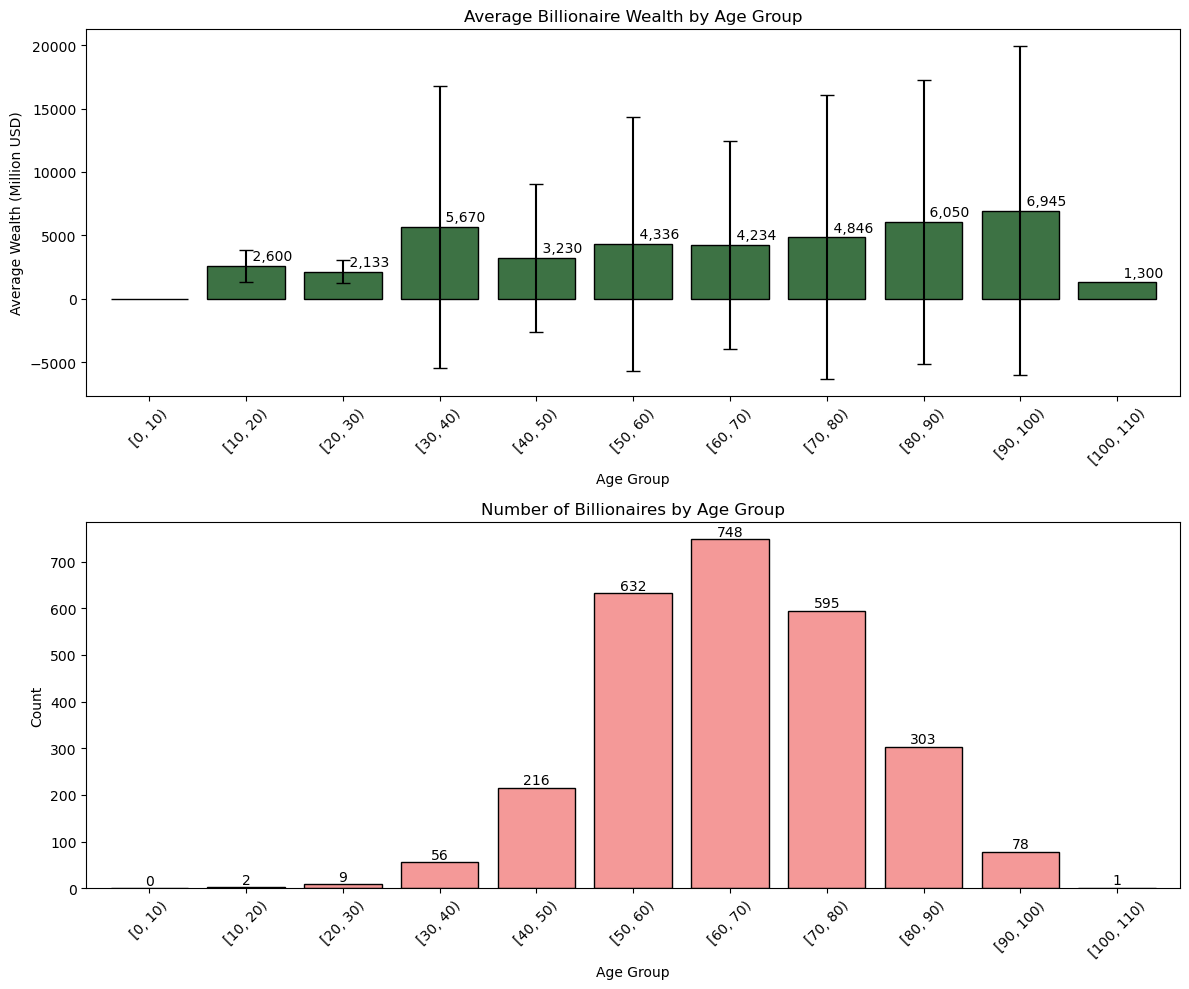

In [63]:
# Create subplots for average wealth and count by age group
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 10))

# Plot average wealth by age group
age_wealth['mean'].plot(kind='bar', ax=ax1,
                        color='#3d7244',
                        edgecolor='black',
                        yerr=age_wealth['std'],
                        capsize=5,
                        width=0.8)

ax1.set_title('Average Billionaire Wealth by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Average Wealth (Million USD)')
ax1.set_xticklabels(age_wealth.index.astype(str), rotation=45)

# Add value labels
for i, v in enumerate(age_wealth['mean']):
    ax1.text(i, v + 200,
             f'            {v:,.0f}',
             ha='center', va='bottom')

# Plot count by age group
age_wealth['count'].plot(kind='bar', ax=ax2,
                         color='#f49998',
                         edgecolor='black',
                         width=0.8)

ax2.set_title('Number of Billionaires by Age Group')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Count')
ax2.set_xticklabels(age_wealth.index.astype(str), rotation=45)

# Add value labels
for i, v in enumerate(age_wealth['count']):
    ax2.text(i, v + 1, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Nhận xét:**

Từ kết quả phân tích dữ liệu, ta có thể rút ra một số nhận xét như sau:

- Các nhóm tuổi từ [10, 20) và [20, 30) có mức tài sản trung bình thấp, điều này hoàn toàn hợp lý do quá trình tích lũy của cải còn mới bắt đầu ở những độ tuổi trẻ.

- Khi bước sang nhóm tuổi [30, 40), mức trung bình tăng lên đáng kể (khoảng 5669), tuy nhiên đi kèm với độ biến động cao (std gần 11102) cho thấy có sự chênh lệch lớn giữa các cá nhân.

- Đến nhóm tuổi [40, 50) mức trung bình giảm xuống còn khoảng 3230, có thể phản ánh giai đoạn chuyển giao hoặc ổn định của cải.

- Các nhóm tuổi từ [50, 60) đến [70, 80) có mức trung bình dao động quanh 4200-4800, sau đó nhóm [80, 90) đạt trung bình 6050 và nhóm [90, 100) có mức trung bình cao nhất (khoảng 6945).

- Dù nhóm [90, 100) chỉ có số lượng mẫu nhỏ (78 tỷ phú), nhưng cho thấy những cá nhân đạt đến độ tuổi này có khả năng tích lũy được mức tài sản khổng lồ, dù đi kèm với độ biến động rất lớn.

**Kết luận:**

- Như vậy, ta thấy xu hướng tích lũy tài sản có sự gia tăng rõ rệt theo tuổi, với nhóm tuổi trẻ có mức tài sản thấp và nhóm tuổi cao có mức tài sản trung bình lớn hơn. Tuy nhiên, độ lệch chuẩn cao ở các nhóm tuổi lớn cho thấy sự phân bố tài sản rất bất đối xứng, có thể là do một số cá nhân có giá trị tài sản cực kỳ cao kéo trung bình lên.

- Kết quả này phản ánh một phân phối lệch phải (right-skewed), trong đó phần lớn tỷ phú tích lũy được mức tài sản trung bình nhưng lại có một số cá nhân vượt trội tạo ra "đuôi" dài của phân phối. Điều này cung cấp cái nhìn sâu sắc về quá trình tích lũy của cải theo thời gian và cho thấy rằng tuổi tác là một yếu tố quan trọng ảnh hưởng đến mức độ giàu có của các tỷ phú.


## 4.9. Phân tích phân bố độ tuổi của các tỷ phú theo các quốc gia

Trong phần này, chúng ta sẽ đi sâu vào phân tích **sự khác biệt** trong phân bố độ tuổi của giới tỷ phú giữa các quốc gia khác nhau. Để có cái nhìn **tập trung và rõ ràng**, chúng ta sẽ giới hạn phạm vi phân tích ở top 10 quốc gia dẫn đầu về số lượng tỷ phú. Mục tiêu chính là **khám phá liệu có sự khác biệt đáng kể nào về độ tuổi trung bình, độ tuổi trẻ nhất và lớn tuổi nhất của tỷ phú giữa các quốc gia này hay không.**

Để thực hiện, bước đầu tiên là tiền xử lý dữ liệu. Chúng ta sẽ **nhóm các tỷ phú theo quốc gia** bằng cách sử dụng cột `country`. Sau đó, chúng ta sẽ tận dụng hàm `agg()` để tính toán các **thống kê mô tả quan trọng** về độ tuổi (`age`) cho mỗi quốc gia. Các giá trị được tính toán bao gồm: độ tuổi trẻ nhất (giá trị tối thiểu), các giá trị tứ phân vị (Q1, trung vị - Q2, Q3) để hiểu rõ hơn về sự phân tán độ tuổi, độ tuổi lớn nhất (giá trị tối đa) và độ tuổi trung bình. Những thống kê này sẽ cung cấp cho chúng ta **cái nhìn tổng quan và chi tiết** về phân bố độ tuổi tỷ phú ở từng quốc gia trong top 10.

In [64]:
# Get top 10 countries by billionaire count
top_10_countries = df['country'].value_counts().head(10).index

# Filter data for top 10 countries
top_10_df = df[df['country'].isin(top_10_countries)]

# Calculate age statistics for each country
age_stats = top_10_df.groupby('country')['age'].agg([
    ('min', 'min'),
    ('q1', lambda x: x.quantile(0.25)),
    ('median', 'median'),
    ('q3', lambda x: x.quantile(0.75)),
    ('max', 'max'),
    ('mean', 'mean'),
    ('count', 'count')
]).round(2)

# Sort by count descending to match the order of top 10 countries
age_stats = age_stats.reindex(top_10_countries)

In [65]:
# Get the LaTeX representation of the age statistics
clipboard.copy(age_stats.to_latex())

# Display statistics
print("Age Distribution Statistics for Top 10 Countries by Billionaire Count:")
age_stats

Age Distribution Statistics for Top 10 Countries by Billionaire Count:


min     q1  median     q3    max   mean  count
country                                                        
United States   28.0  59.00    67.0  78.00  101.0  67.31    754
China           26.0  53.50    58.0  65.00   91.0  58.93    523
India           36.0  63.00    68.0  75.00   99.0  68.46    157
Germany         33.0  56.25    65.0  76.00   90.0  64.70    102
United Kingdom  30.0  55.00    64.0  70.00   97.0  62.76     82
Russia          43.0  55.00    58.0  64.50   74.0  59.10     79
Switzerland     39.0  57.00    65.0  77.00   95.0  66.08     78
Hong Kong       31.0  58.00    67.0  78.25   99.0  67.63     68
Italy           18.0  55.00    69.0  80.00   88.0  66.89     55
Singapore       39.0  60.00    68.0  73.75   95.0  66.17     46

Đối với mỗi quốc gia trong top 10, chúng ta sẽ trực quan hóa phân bố độ tuổi của tỷ phú bằng biểu đồ boxplot. Biểu đồ này sẽ giúp chúng ta **so sánh phân phối độ tuổi** giữa các quốc gia và **nhận biết sự khác biệt** trong phân bố độ tuổi của tỷ phú giữa các quốc gia.

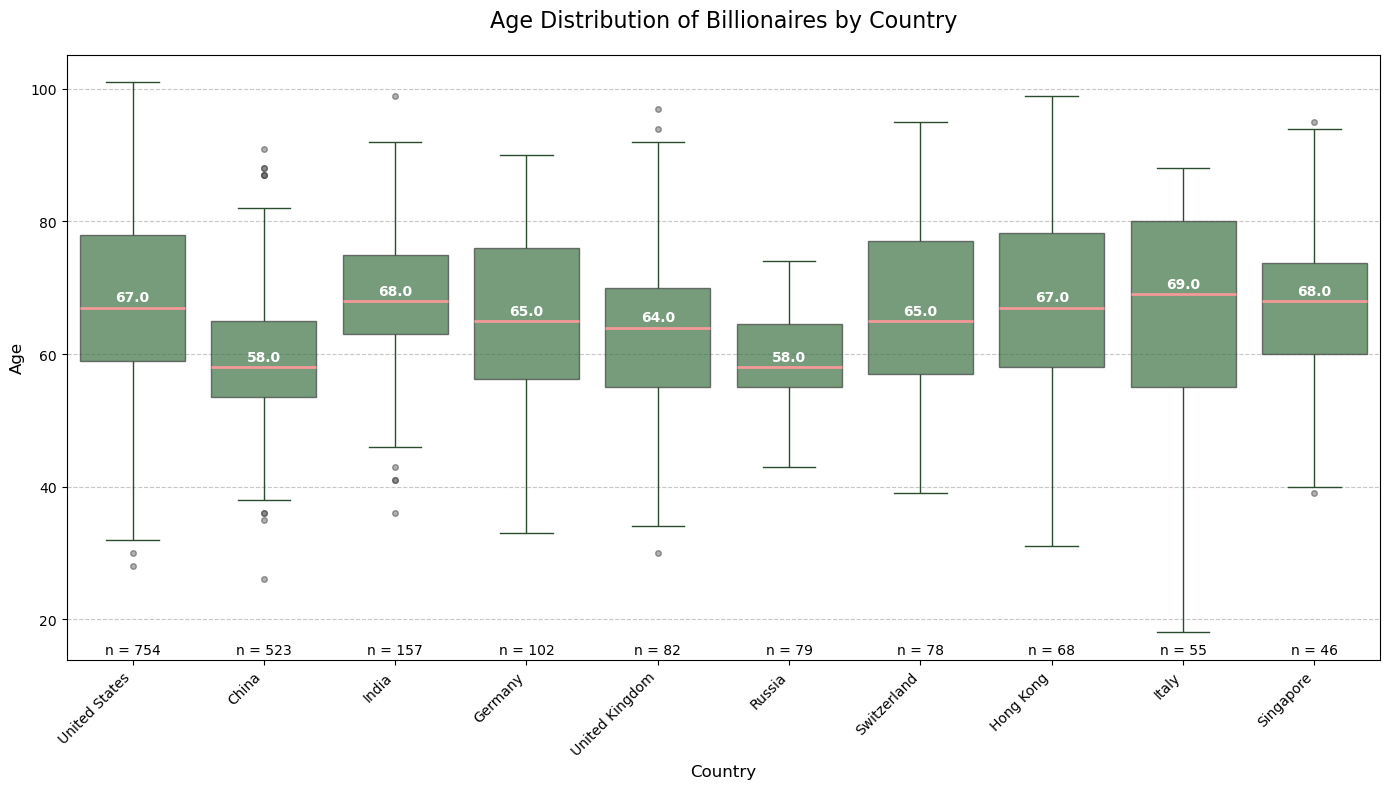

In [66]:
# Create a boxplot for age distribution by country
plt.figure(figsize=(14, 8))

# Create custom colors
box_color = '#3d7244'  # Dark green for boxes
whisker_color = '#2a4d2f'  # Darker green for whiskers
median_color = '#f49998'  # Salmon pink for median lines
flier_color = '#666666'  # Grey for outliers

# Create a list of sorted countries
sorted_countries = age_stats.index

# Create boxplot with customized appearance
sns.boxplot(data=top_10_df, x='country', y='age',
            order=sorted_countries,
            boxprops=dict(facecolor=box_color, alpha=0.7),
            whiskerprops=dict(color=whisker_color),
            capprops=dict(color=whisker_color),
            medianprops=dict(color=median_color, linewidth=2),
            flierprops=dict(marker='o', markerfacecolor=flier_color,
                            markersize=4, alpha=0.5))

# Customize the plot
plt.title('Age Distribution of Billionaires by Country',
          fontsize=16, pad=20)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add number of billionaires for each country
for i, country in enumerate(sorted_countries):
    count = age_stats.loc[country, 'count']
    median = age_stats.loc[country, 'median']
    plt.text(i, plt.ylim()[0]+2.5, f'n = {count}',
             ha='center', va='top', fontsize=10)
    plt.text(i, median+0.5, f'{median:.1f}',
             ha='center', va='bottom', fontsize=10,
             color='white', fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.show()

**Nhận xét:**

Dựa vào kết quả phân tích dữ liệu, ta có thể rút ra một số nhận xét như sau:

- **United States:**

  - **Số lượng:** 754 tỷ phú, là quốc gia có số lượng tỷ phú lớn nhất trong top 10.
  - **Phân bố tuổi:** Độ tuổi từ 28 đến 101, với trung vị 67 và trung bình 67.31.

  - **Nhận xét:** Điều này cho thấy ở Mỹ, các tỷ phú tích lũy của cải qua một quá trình dài và có sự phân bố tuổi rộng, phản ánh cả những cá nhân trẻ có khả năng bứt phá và những người đạt được thành công qua thời gian.

- **China:**

  - **Số lượng:** 523 tỷ phú.
  - **Phân bố tuổi:** Độ tuổi từ 26 đến 91, với trung vị 58 và trung bình 58.93.

  - **Nhận xét:** Trung vị và trung bình thấp hơn so với Mỹ cho thấy các tỷ phú Trung Quốc có xu hướng trẻ hơn, phản ánh tốc độ tăng trưởng kinh tế nhanh chóng và khả năng tích lũy của cải ở độ tuổi trẻ.

- **India:**

  - **Số lượng:** 157 tỷ phú.
  - **Phân bố tuổi:** Độ tuổi từ 36 đến 99, với trung vị 68 và trung bình 68.46.

  - **Nhận xét:** Các tỷ phú Ấn Độ có xu hướng già hơn so với Trung Quốc, điều này có thể cho thấy quá trình tích lũy của cải diễn ra dần dần theo thời gian.

- **Germany:**

  - **Số lượng:** 102 tỷ phú.
  - **Phân bố tuổi:** Độ tuổi từ 33 đến 90, với trung vị 65 và trung bình 64.70.

  - **Nhận xét:** Phân bố tuổi tương đối ổn định, cho thấy mức độ tích lũy của cải chủ yếu xảy ra ở giai đoạn trung niên đến cao niên.

- **United Kingdom:**

  - **Số lượng:** 82 tỷ phú.
  - **Phân bố tuổi:** Độ tuổi từ 30 đến 97, với trung vị 64 và trung bình 62.76.

  - **Nhận xét:** Các tỷ phú Anh có độ tuổi trung vị thấp hơn so với Mỹ, có thể phản ánh một mô hình tích lũy của cải khác biệt, với khả năng khởi nghiệp sớm hơn.

- **Russia:**

  - **Số lượng:** 79 tỷ phú.
  - **Phân bố tuổi:** Độ tuổi từ 43 đến 74, với trung vị 58 và trung bình 59.10.

  - **Nhận xét:** Dải tuổi khá hẹp với mức tuổi tối thiểu cao (43) cho thấy chỉ những người ở độ tuổi nhất định mới có khả năng tích lũy của cải lớn, có thể do các yêu cầu về kinh nghiệm và mối quan hệ trong môi trường kinh doanh.

- **Switzerland:**

  - **Số lượng:** 78 tỷ phú.
  - **Phân bố tuổi:** Độ tuổi từ 39 đến 95, với trung vị 65 và trung bình 66.08.

  - **Nhận xét:** Phân bố tuổi tương đối cân bằng, cho thấy sự ổn định trong quá trình tích lũy của cải ở các tỷ phú Thụy Sĩ.

- **Hong Kong:**

  - **Số lượng:** 68 tỷ phú.
  - **Phân bố tuổi:** Độ tuổi từ 31 đến 99, với trung vị 67 và trung bình 67.63.

  - **Nhận xét:** Các tỷ phú Hong Kong có mức tuổi trung bình tương đối cao, cho thấy có sự tích lũy của cải lâu dài trong môi trường kinh doanh năng động của khu vực.

- **Italy:**

  - **Số lượng:** 55 tỷ phú.
  - **Phân bố tuổi:** Độ tuổi từ 18 đến 88, với trung vị 69 và trung bình 66.89.

  - **Nhận xét:** Mặc dù trung vị cao, giá trị tuổi tối thiểu là 18 cho thấy tồn tại ít nhất một trường hợp ngoại lệ cực đoan. Do đó, ta có thể tiến hành phân tích sâu hơn về mẫu dữ liệu này để xác định nguyên nhân và cố gắng hiểu rõ hơn về quá trình tích lũy của cải ở Ý.

- **Singapore:**

  - **Số lượng:** 46 tỷ phú.
  - **Phân bố tuổi:** Độ tuổi từ 39 đến 95, với trung vị 68 và trung bình 66.17.

  - **Nhận xét:** Các tỷ phú Singapore có mức tuổi trung vị và trung bình cao, cho thấy quá trình tích lũy của cải chủ yếu diễn ra ở giai đoạn trung niên và cao niên.

**Kết luận:**

- **Sự khác biệt về độ tuổi:**

  - Các quốc gia như **China** và **Russia** có tỷ phú trẻ hơn trung bình, cho thấy khả năng tích lũy của cải nhanh chóng và mạnh mẽ ở độ tuổi trẻ.

  - Trong khi đó, các quốc gia như **United States**, **India**, **Hong Kong** và **Singapore** có tỷ phú với độ tuổi trung vị và trung bình cao hơn, phản ánh một quá trình tích lũy của cải kéo dài theo thời gian.

- **Phân bố và dải tuổi:**

  - Các quốc gia có dải tuổi rộng như **United States** và **Hong Kong** cho thấy sự đa dạng trong quá trình tích lũy của cải, từ những người bắt đầu khởi nghiệp sớm đến những người đạt đến đỉnh cao tuổi tác.

  - Các quốc gia với dải tuổi hẹp như **Russia** có thể phản ánh một môi trường kinh doanh đặc thù, nơi chỉ những cá nhân đạt đến một mức tuổi nhất định mới có thể trở thành tỷ phú.

- **Ảnh hưởng đến chiến lược kinh doanh:**

  - Những sự khác biệt về phân bố độ tuổi của các tỷ phú giữa các quốc gia cung cấp thông tin hữu ích cho các nhà hoạch định chính sách, nhà đầu tư và các doanh nghiệp về xu hướng và thời điểm tích lũy của cải, từ đó điều chỉnh chiến lược phát triển kinh tế và hỗ trợ khởi nghiệp phù hợp với đặc điểm dân số và văn hóa kinh doanh của từng quốc gia.


## 4.10. Phân tích phân bố độ tuổi của các tỷ phú theo giới tính

Trong phần này, chúng ta sẽ phân tích phân bố độ tuổi của các tỷ phú theo giới tính. Mục tiêu chính là **so sánh phân bố độ tuổi giữa tỷ phú nam và tỷ phú nữ** để hiểu rõ hơn sự khác biệt về độ tuổi giữa hai giới. Điều này giúp chúng ta có cái nhìn sâu sắc hơn về quá trình tích lũy của cải và sự phân bố độ tuổi của tỷ phú nam và tỷ phú nữ.

Để thực hiện, bước đầu tiên là tiền xử lý dữ liệu. Chúng ta sẽ **nhóm các tỷ phú theo giới tính** bằng cách sử dụng cột `gender`. Sau đó, chúng ta sẽ tận dụng hàm `agg()` để tính toán các **thống kê mô tả quan trọng** về độ tuổi (`age`) cho từng giới tính. Các giá trị được tính toán bao gồm: độ tuổi trẻ nhất (giá trị tối thiểu), các giá trị tứ phân vị (Q1, trung vị - Q2, Q3) để hiểu rõ hơn về sự phân tán độ tuổi, độ tuổi lớn nhất (giá trị tối đa) và độ tuổi trung bình. Những thống kê này sẽ cung cấp cho chúng ta **cái nhìn tổng quan và chi tiết** về phân bố độ tuổi của tỷ phú nam và tỷ phú nữ.

In [67]:
# Calculate age statistics for each gender
age_stats_by_gender = df.groupby('gender')['age'].agg([
    ('min', 'min'),
    ('q1', lambda x: x.quantile(0.25)),
    ('median', 'median'),
    ('q3', lambda x: x.quantile(0.75)),
    ('max', 'max'),
    ('mean', 'mean'),
    ('count', 'count')
]).round(2)

# Sort by count descending to match previous analysis
age_stats_by_gender = age_stats_by_gender.reindex(['F', 'M'])

In [68]:
# Get the LaTeX representation of the age statistics
clipboard.copy(age_stats_by_gender.to_latex())

# Display statistics
print("Age Distribution Statistics by Gender:")
age_stats_by_gender

Age Distribution Statistics by Gender:


min    q1  median    q3    max   mean  count
gender                                               
F       19.0  55.0    65.0  73.0   98.0  63.67    337
M       18.0  56.0    65.0  75.0  101.0  65.35   2303

Trực quan hóa dữ liệu về phân bố độ tuổi của tỷ phú nam và tỷ phú nữ bằng biểu đồ violin plot. Biểu đồ này sẽ giúp chúng ta **so sánh phân phối độ tuổi** giữa tỷ phú nam và tỷ phú nữ và **nhận biết sự khác biệt** trong phân bố độ tuổi của tỷ phú giữa hai giới.

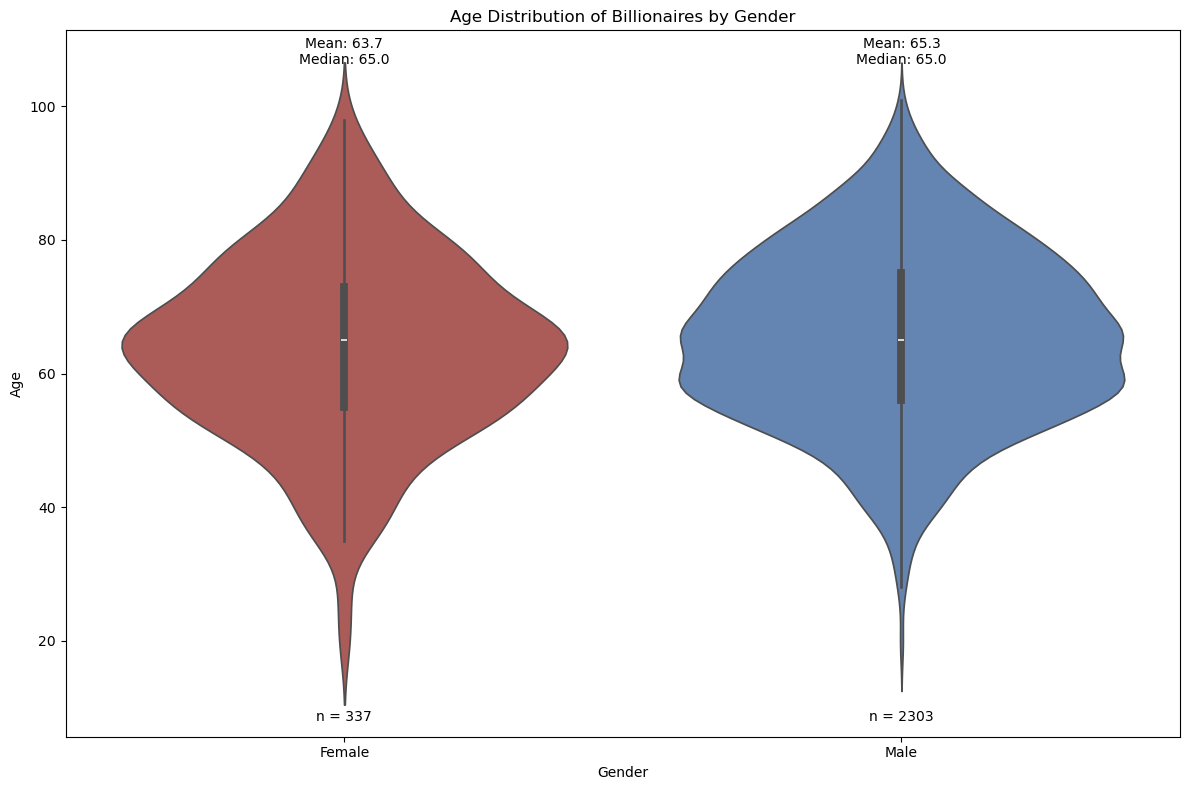

In [69]:
# Create violin plot for age distribution by gender
plt.figure(figsize=(12, 8))

# Create violin plot with different colors for each gender
sns.violinplot(data=df, x='gender', y='age',
               palette={'M': '#5782bf', 'F': '#b94f4b'}, width=0.8,
               hue='gender', legend=False,
               order=['F', 'M'])

# Customize the plot
plt.title('Age Distribution of Billionaires by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')

# Change the x-axis labels
plt.xticks(range(2), ["Female", "Male"])

# Add text annotations for sample sizes
for i, gender in enumerate(['F', 'M']):
    count = df[df['gender'] == gender].shape[0]
    plt.text(i, df['age'].min()-10, f'n = {count}', ha='center')

# Add statistics annotations
for i, gender in enumerate(['F', 'M']):
    age_stats = age_stats_by_gender.loc[gender]
    plt.text(i, plt.ylim()[1]-5,
             f'Mean: {age_stats["mean"]:.1f}\nMedian: {age_stats["median"]:.1f}',
             ha='center')

plt.tight_layout()
plt.show()

**Nhận xét:**

Dựa vào kết quả phân tích dữ liệu, ta có thể rút ra một số nhận xét như sau:

- **Số lượng tỷ phú theo giới tính:**

  - Tỷ phú nam chiếm phần lớn (2303 người) so với tỷ phú nữ (337 người), cho thấy sự chênh lệch về số lượng giữa hai giới.

- **Tuổi trung vị:**

  - Cả hai nhóm đều có tuổi trung vị bằng 65. Điều này cho thấy, bất kể giới tính, phần lớn các tỷ phú đều đạt đến mốc tuổi 65, một thời điểm quan trọng trong quá trình tích lũy của cải.

- **Tuổi trung bình:**

  - Tuổi trung bình của tỷ phú nam (65.35) cao hơn một chút so với tỷ phú nữ (63.67), gợi ý rằng trung bình, các tỷ phú nam có xu hướng già hơn một chút so với tỷ phú nữ. Tuy nhiên, ta sẽ cần thu thập và phân tích thêm dữ liệu để xác định xem sự chênh lệch này có ý nghĩa thống kê hay không.

- **Khoảng phân vị:**

  - Với tỷ phú nữ, Q1 là 55 và Q3 là 73; đối với tỷ phú nam, Q1 là 56 và Q3 là 75. Điều này cho thấy khoảng tuổi của tỷ phú nam rộng hơn một chút, phản ánh sự phân tán tuổi hơi lớn hơn so với nhóm nữ.

- **Biên độ tuổi:**

  - Độ tuổi nhỏ nhất: 19 đối với nữ và 18 đối với nam.
  - Độ tuổi lớn nhất: 98 đối với nữ và 101 đối với nam.
  - Mặc dù khác biệt không lớn, nhưng dữ liệu cho thấy tỷ phú nam có xu hướng có biên độ tuổi rộng hơn.

**Kết luận:**

- Mặc dù tuổi trung vị của cả hai nhóm là giống nhau (65 tuổi), sự khác biệt ở tuổi trung bình và khoảng phân vị cho thấy các tỷ phú nam có xu hướng tích lũy của cải trong một khoảng thời gian lâu hơn, hoặc có sự đa dạng về độ tuổi cao hơn so với tỷ phú nữ.

- Sự chênh lệch về số lượng giữa hai giới cho thấy rằng trong lĩnh vực tích lũy của cải, tỷ phú nữ vẫn chiếm tỷ lệ nhỏ hơn, điều này có thể liên quan đến nhiều yếu tố xã hội và kinh tế.


## 4.11. Phân tích độ tuổi của các tỷ phú so với tuổi thọ trung bình của các quốc gia


Trong phần này, chúng ta sẽ so sánh độ tuổi trung bình của các tỷ phú trong cùng một quốc gia với tuổi thọ trung bình của quốc gia đó. Mục tiêu chính là **khám phá liệu có sự khác biệt đáng kể nào giữa độ tuổi trung bình của tỷ phú và tuổi thọ trung bình của quốc gia hay không**. Điều này giúp chúng ta hiểu rõ hơn về mối quan hệ giữa độ tuổi của tỷ phú và điều kiện sống, yếu tố văn hóa, xã hội của quốc gia đó.

Đầu tiên, chúng ta sẽ tiền xử lý dữ liệu để tạo các nhóm dữ liệu theo quốc gia và tính tuổi trung bình của các tỷ phú trong mỗi quốc gia. Sau đó, chúng ta sẽ sử dụng dữ liệu về tuổi thọ trung bình của các quốc gia để so sánh với độ tuổi trung bình của các tỷ phú. Ở đây, chúng ta chỉ chọn ra 10 quốc gia dẫn đầu về số lượng tỷ phú để phân tích.

In [70]:
# Create a DataFrame comparing average age and life expectancy for top 10 countries
age_comparison_data = pd.DataFrame({
    'Average Age': age_stats['mean'],
    'Life Expectancy': df.groupby('country')['life_expectancy_country'].first()
})

# Filter for top 10 countries only
age_comparison_data = age_comparison_data.loc[top_10_countries]

In [71]:
# Get the LaTeX representation of
# the age and life expectancy comparison data
clipboard.copy(age_comparison_data.to_latex())

# Display the age and life expectancy comparison data
age_comparison_data

Average Age  Life Expectancy
country                                     
United States         65.35             78.5
China                 65.35             77.0
India                 65.35             69.4
Germany               65.35             80.9
United Kingdom        65.35             81.3
Russia                65.35             72.7
Switzerland           65.35             83.6
Hong Kong             65.35             78.5
Italy                 65.35             82.9
Singapore             65.35             83.1

Ta sẽ trực quan hóa dữ liệu bằng biểu đồ cột kép (grouped bar chart) để so sánh độ tuổi trung bình của các tỷ phú và tuổi thọ trung bình của quốc gia. Biểu đồ này giúp chúng ta **nhìn rõ sự khác biệt** giữa độ tuổi của tỷ phú và tuổi thọ trung bình của quốc gia.

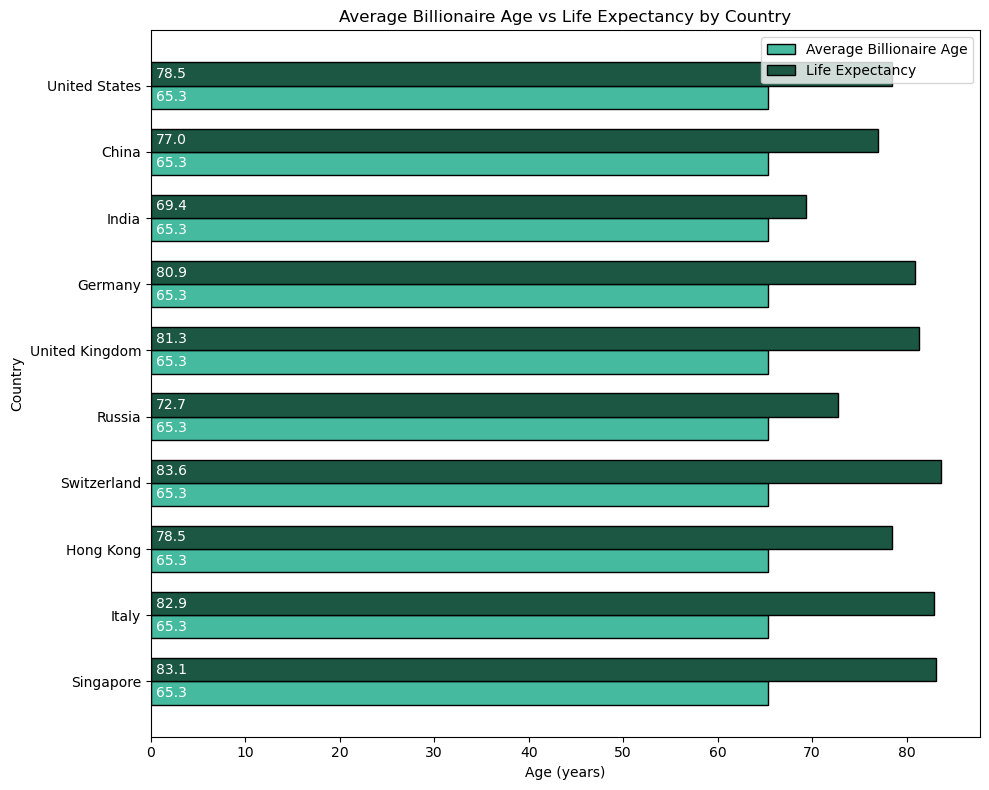

In [72]:
# Create a figure
plt.figure(figsize=(10, 8))

# Set width and positions for bars
height = 0.35
y = np.arange(len(top_10_countries))

# Create bars (now horizontal) with reversed country order
plt.barh(y - height/2, age_comparison_data['Average Age'][::-1], height,
         label='Average Billionaire Age', color='#45ba9f', edgecolor='black')
plt.barh(y + height/2, age_comparison_data['Life Expectancy'][::-1], height,
         label='Life Expectancy', color='#1b5742', edgecolor='black')

# Customize the plot
plt.title('Average Billionaire Age vs Life Expectancy by Country')
plt.ylabel('Country')
plt.xlabel('Age (years)')
plt.yticks(y, top_10_countries[::-1])
plt.legend(loc='upper right')

# Add value labels at the start of each bar with white color
for i, v in enumerate(age_comparison_data['Average Age'][::-1]):
    plt.text(0.5, i - height/2, f'{v:.1f}',
             va='center', ha='left', color='white')
for i, v in enumerate(age_comparison_data['Life Expectancy'][::-1]):
    plt.text(0.5, i + height/2, f'{v:.1f}',
             va='center', ha='left', color='white')

plt.tight_layout()
plt.show()

**Nhận xét:**

Dựa vào kết quả phân tích dữ liệu, ta có thể rút ra một số nhận xét như sau:

- **So sánh trực tiếp giữa tuổi trung bình của tỷ phú và tuổi thọ trung bình của quốc gia:**

  - **United States:** Tuổi trung bình của tỷ phú là 67.31, trong khi tuổi thọ trung bình của người dân là 78.50 (thấp hơn khoảng 11 năm).

  - **China:** Tuổi trung bình của tỷ phú là 58.93, còn tuổi thọ trung bình của người dân là 77.00 (thấp hơn khoảng 18 năm).

  - **India:** Tuổi trung bình của tỷ phú là 68.46, gần bằng tuổi thọ trung bình 69.40, cho thấy các tỷ phú Ấn Độ có xu hướng già hơn hoặc quá trình tích lũy diễn ra muộn hơn.

  - **Germany:** Tuổi trung bình của tỷ phú là 64.70 so với tuổi thọ trung bình 80.90 (chênh lệch khoảng 16 năm).

  - **United Kingdom:** Tuổi trung bình của tỷ phú là 62.76, với tuổi thọ trung bình là 81.30 (chênh lệch khoảng 18.5 năm).

  - **Russia:** Tuổi trung bình của tỷ phú là 59.10, so với tuổi thọ trung bình 72.70 (chênh lệch khoảng 13.6 năm).

  - **Switzerland:** Tuổi trung bình của tỷ phú là 66.08, trong khi tuổi thọ trung bình là 83.60 (chênh lệch khoảng 17.5 năm).

  - **Hong Kong:** Tuổi trung bình của tỷ phú là 67.63, so với tuổi thọ trung bình 78.50 (thấp hơn khoảng 10.9 năm).

  - **Italy:** Tuổi trung bình của tỷ phú là 66.89, so với tuổi thọ trung bình 82.90 (thấp hơn khoảng 16 năm).

  - **Singapore:** Tuổi trung bình của tỷ phú là 66.17, còn tuổi thọ trung bình là 83.10 (chênh lệch khoảng 16.9 năm).

- **Nhận xét chung:**

  - Ở hầu hết các quốc gia có số lượng tỷ phú nhiều nhất trong tập dữ liệu, tuổi trung bình của tỷ phú thấp hơn đáng kể so với tuổi thọ trung bình của quốc gia, cho thấy các tỷ phú thường tích lũy của cải và đạt được thành công ở độ tuổi trẻ hơn so với kỳ vọng sống chung của dân số.

  - Trường hợp của Ấn Độ là ngoại lệ, khi tuổi trung bình của tỷ phú gần bằng với tuổi thọ trung bình của quốc gia. Đồng thời, ta cũng nhận thấy rằng tuổi thọ trung bình của Ấn Độ thấp hơn đáng kể so với các quốc gia khác trên bảng xếp hạng. Điều này phần nào phản ánh sự chênh lệch về mức sống và điều kiện kinh tế - xã hội giữa tầng lớp siêu giàu và người dân bình thường ở Ấn Độ.

**Kết luận:**

- **Sự chênh lệch giữa tầng lớp siêu giàu và người dân bình thường ở Ấn Độ:** Sự chênh lệch giữa tuổi trung bình của tỷ phú và tuổi thọ trung bình của quốc gia ở Ấn Độ cho thấy sự chênh lệch về điều kiện sống và mức độ phát triển kinh tế - xã hội giữa tầng lớp siêu giàu và người dân bình thường. Giới tài phiệt ở Ấn Độ có thể nhận được sự chăm sóc sức khỏe và điều kiện sống tốt hơn so với người dân bình thường, điều này cần được xem xét và giải quyết trong các chính sách xã hội và kinh tế.

- **Quá trình tích lũy sớm:** Hầu hết các quốc gia cho thấy rằng các tỷ phú đạt được mức giàu có ở độ tuổi sớm hơn tuổi thọ trung bình, điều này phản ánh tốc độ tích lũy của cải nhanh chóng và khả năng tận dụng các cơ hội kinh doanh ở độ tuổi trẻ.

- **Tác động của điều kiện kinh tế - xã hội:** Khoảng cách giữa tuổi trung bình của tỷ phú và tuổi thọ trung bình của quốc gia (dao động từ khoảng 11 đến 18 năm) có thể phản ánh các yếu tố như môi trường kinh doanh, văn hóa khởi nghiệp, và mức độ đầu tư vào đổi mới sáng tạo, từ đó ảnh hưởng đến quá trình tích lũy của cải của các cá nhân.


## 4.12. Phân tích phân bố giá trị tài sản ròng của các tỷ phú theo giới tính

Trong phần này, chúng ta sẽ phân tích phân bố giá trị tài sản ròng của các tỷ phú theo giới tính. Mục tiêu chính là **so sánh phân bố giá trị tài sản ròng giữa tỷ phú nam và tỷ phú nữ** để hiểu rõ hơn sự khác biệt về giá trị tài sản ròng giữa hai giới. Điều này giúp chúng ta có cái nhìn sâu sắc hơn về quá trình tích lũy của cải và sự phân bố giá trị tài sản ròng của tỷ phú nam và tỷ phú nữ.

Đầu tiên, chúng ta sẽ tiền xử lý dữ liệu để tạo các nhóm dữ liệu theo giới tính và tính một số giá trị thống kê quan trọng như giá trị trung bình, trung vị, độ lệch chuẩn, v.v. về giá trị tài sản ròng cho từng giới tính. _Vì giá trị tài sản ròng có sự chênh lệch lớn giữa các tỷ phú, nên chúng ta sẽ lấy logarit tự nhiên của giá trị tài sản ròng để giảm thiểu ảnh hưởng của các giá trị ngoại lệ và phân bố dữ liệu_.


In [73]:
# Calculate the log of finalWorth
df["log_finalWorth"] = np.log(df["finalWorth"])

# Calculate statistics for log(finalWorth) by gender
wealth_stats = df.groupby("gender")["log_finalWorth"].describe()

# Get the LaTeX representation of the statistics
clipboard.copy(wealth_stats.to_latex())

# Display statistics
print("Log(finalWorth) Statistics by Gender:")
wealth_stats

Log(finalWorth) Statistics by Gender:


count      mean       std       min      25%       50%       75%  \
gender                                                                      
F        337.0  7.953821  0.833859  6.907755  7.31322  7.824046  8.476371   
M       2303.0  7.926996  0.819092  6.907755  7.31322  7.740664  8.342840   

              max  
gender             
F       11.296012  
M       12.259613

Ta trực quan hóa dữ liệu bằng biểu đồ KDE plot để so sánh phân bố giá trị tài sản ròng của tỷ phú nam và tỷ phú nữ. Biểu đồ này giúp chúng ta **nhìn rõ sự khác biệt** giữa phân phối giá trị tài sản ròng của tỷ phú nam và tỷ phú nữ.


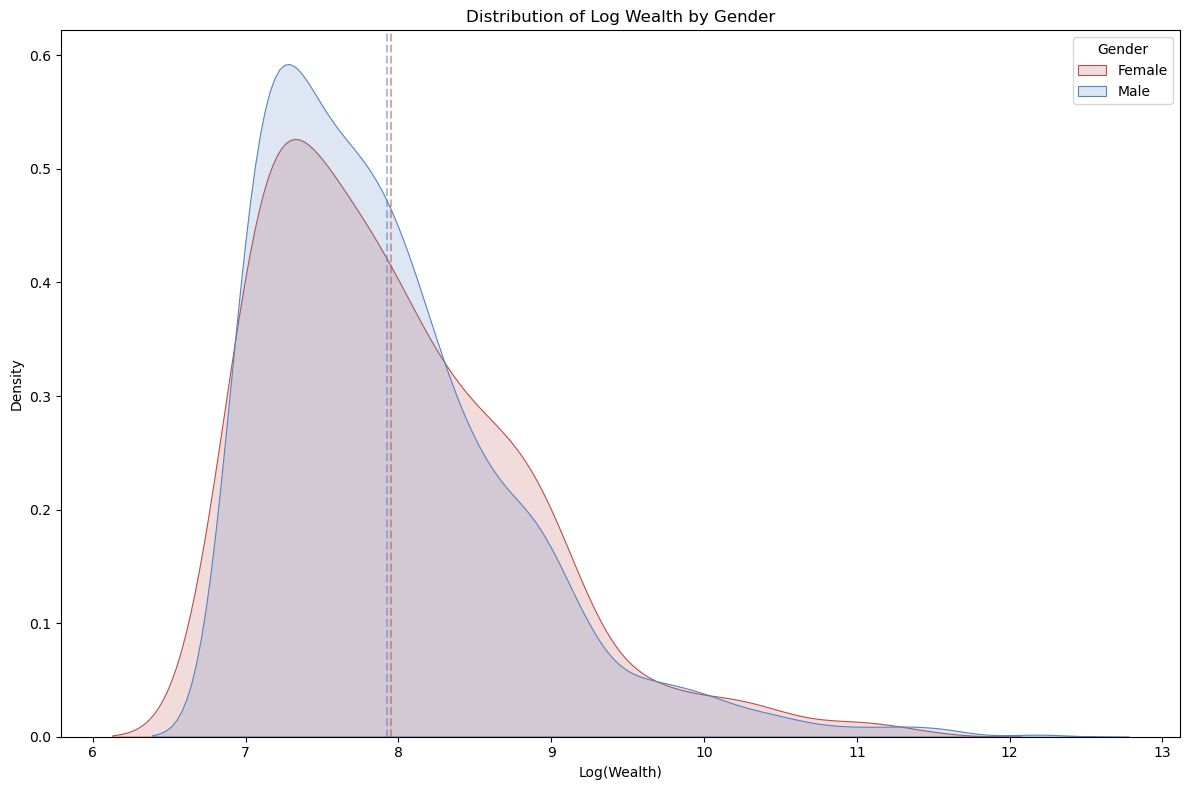

In [74]:
# Create a figure
plt.figure(figsize=(12, 8))

# Create KDE plot for each gender
sns.kdeplot(data=df, x='log_finalWorth', hue='gender',
            palette={'M': '#5782bf', 'F': '#b94f4b'},
            common_norm=False, alpha=0.2, fill=True,
            linewidth=0.8)

# Customize the plot
plt.title('Distribution of Log Wealth by Gender')
plt.xlabel('Log(Wealth)')
plt.ylabel('Density')

# Add means as vertical lines
for gender in ['F', 'M']:
    mean = df[df['gender'] == gender]['log_finalWorth'].mean()
    plt.axvline(mean, color={'M': '#5782bf', 'F': '#b94f4b'}[gender],
                linestyle='--', alpha=0.5,)

# Update legend labels
plt.legend(['Female', 'Male'], title="Gender")
plt.tight_layout()
plt.show()

**Nhận xét:**

Dựa trên kết quả phân tích dữ liệu, ta có thể rút ra một số nhận xét như sau:

- **Nhận xét về nhóm tỷ phú nữ (Female):**

  - Số lượng: 337 tỷ phú nữ.
  - Giá trị trung bình (mean) của log tài sản: 7.9538, trung vị (median) là 7.8240.
  - Khoảng phần tư: Q1 = 7.3132 và Q3 = 8.4764, cho thấy phần 50% số liệu nằm trong khoảng tương đối rộng.
  - Giá trị lớn nhất: 11.2960, cho thấy có một số trường hợp cực trị.

- **Nhận xét về nhóm tỷ phú nam (Male):**

  - Số lượng: 2303 tỷ phú nam.
  - Giá trị trung bình của log tài sản: 7.9270, trung vị là 7.7407.
  - Khoảng phần tư: Q1 = 7.3132 và Q3 = 8.3428, tương tự nhóm nữ nhưng Q3 thấp hơn so với nữ.
  - Giá trị lớn nhất: 12.2596, cao hơn so với nhóm nữ, cho thấy đuôi phải của phân bố tài sản ròng của nam có xu hướng kéo dài hơn.

- **So sánh và phân tích chung:**

  - **Trung bình và trung vị:** Cả hai nhóm có giá trị trung bình và trung vị khá gần nhau, với nhóm nữ có trung bình và trung vị hơi cao hơn một chút (khoảng 0.02-0.08 log đơn vị), tương đương với khoảng 2-8% chênh lệch khi chuyển đổi trở lại thang đo ban đầu.

  - **Độ lệch chuẩn:** Các giá trị std của hai nhóm khá tương đồng (0.8339 đối với nữ và 0.8191 đối với nam), cho thấy mức độ phân tán tương đối giống nhau.

  - **Phân bố đuôi:** Nhóm nam có giá trị max cao hơn (12.2596 so với 11.2960 của nữ), cho thấy trong số các tỷ phú nam có một vài cá nhân có giá trị tài sản ròng cực kỳ cao hơn, kéo theo đuôi phải của phân bố mạnh hơn.

  - **Đồng nhất ở mức cơ bản:** Giá trị min và Q1 ở cả hai nhóm giống hệt nhau, cho thấy điểm khởi đầu của phân bố tài sản khá đồng nhất giữa tỷ phú nam và nữ.

- **Insight rút ra:**

  - **Sự tương đồng về trung tâm phân bố:** Mặc dù số lượng tỷ phú nữ ít hơn đáng kể, nhưng trung bình và trung vị của log tài sản ròng của cả hai giới rất tương đồng, cho thấy về mặt tích lũy của cải, tỷ phú nữ có mức độ tương đương so với tỷ phú nam.

  - **Sự khác biệt ở phần đuôi phải:** Giá trị tài sản cực đại cao hơn ở nhóm nam cho thấy rằng trong số các tỷ phú nam có một số cá nhân có tài sản ròng vượt trội, kéo theo phân bố có đuôi phải dài hơn so với nhóm nữ.

  - **Tỷ lệ chênh lệch nhỏ khi chuyển đổi:** Sự chênh lệch khoảng 0.02-0.08 log đơn vị tương ứng với hiệu ứng khoảng 2-8% trên thang đo tài sản ban đầu, cho thấy rằng, trung bình, các tỷ phú nữ có thể tích lũy của cải ở mức tương đương hoặc thậm chí cao hơn một chút so với các tỷ phú nam, mặc dù sự đa dạng và đuôi phải của nhóm nam có phần mạnh hơn.

**Kết luận:**

- Mặc dù số lượng tỷ phú nữ ít hơn rất nhiều so với nam, nhưng trong nhóm tỷ phú, nữ giới có xu hướng có tài sản ròng trung bình và trung vị cao hơn một chút (khoảng 2.5 tỷ USD so với 2.3 tỷ USD). Tuy nhiên, sự biến động lớn hơn ở nữ cho thấy sự đa dạng trong tài sản của họ. Ngược lại, nam giới chiếm ưu thế tuyệt đối ở đỉnh cao của sự giàu có, với những cá nhân giàu nhất có tài sản vượt xa nữ giới (210 tỷ USD so với 80 tỷ USD).

- Phân tích này không chỉ phản ánh sự khác biệt về phân bố tài sản mà còn gợi ý các yếu tố xã hội, kinh tế cần được nghiên cứu thêm để giải thích sự bất bình đẳng giới trong tích lũy tài sản.


## 4.13. Phân tích phân bố giá trị tài sản ròng của các tỷ phú tự thân và tỷ phú thừa kế

Trong phần này, chúng ta sẽ phân tích phân bố giá trị tài sản ròng của các tỷ phú tự thân và tỷ phú thừa kế. Mục tiêu chính là **so sánh phân bố giá trị tài sản ròng giữa tỷ phú tự thân và tỷ phú thừa kế** để hiểu rõ hơn sự khác biệt về giá trị tài sản ròng giữa hai nhóm này. Điều này giúp chúng ta có cái nhìn sâu sắc hơn về quá trình tích lũy của cải và sự phân bố giá trị tài sản ròng của tỷ phú tự thân và tỷ phú thừa kế.

Đầu tiên, chúng ta sẽ tiền xử lý dữ liệu để tạo các nhóm dữ liệu theo loại tỷ phú và tính một số giá trị thống kê quan trọng về giá trị tài sản ròng cho từng nhóm. _Vì giá trị tài sản ròng có sự chênh lệch lớn giữa các tỷ phú, nên chúng ta sẽ lấy logarit tự nhiên của giá trị tài sản ròng để giảm thiểu ảnh hưởng của các giá trị ngoại lệ và phân bố dữ liệu_.


In [75]:
# Calculate statistics for log(finalWorth) by self-made status
wealth_stats = df.groupby("selfMade")["log_finalWorth"].describe()

# Replace the selfMade index with more descriptive names
wealth_stats = wealth_stats.rename(
    index={False: "Inherited", True: "Self-Made"})
wealth_stats.index.name = "Self-Made Status"

# Get the LaTeX representation of the statistics
clipboard.copy(wealth_stats.to_latex())

# Display statistics
print("Log(finalWorth) Statistics by Self-Made Status:")
wealth_stats

Log(finalWorth) Statistics by Self-Made Status:


count      mean       std       min       25%       50%  \
Self-Made Status                                                             
Inherited          828.0  7.997367  0.832538  6.907755  7.377759  7.863267   
Self-Made         1812.0  7.899828  0.813898  6.907755  7.313220  7.696213   

                       75%        max  
Self-Made Status                       
Inherited         8.439188  12.259613  
Self-Made         8.318742  12.100712

Chúng ta sẽ trực quan hóa dữ liệu bằng biểu đồ histogram để so sánh phân bố giá trị tài sản ròng của tỷ phú tự thân và tỷ phú thừa kế. Biểu đồ này giúp chúng ta **nhìn rõ sự khác biệt** giữa phân phối giá trị tài sản ròng của tỷ phú tự thân và tỷ phú thừa kế.


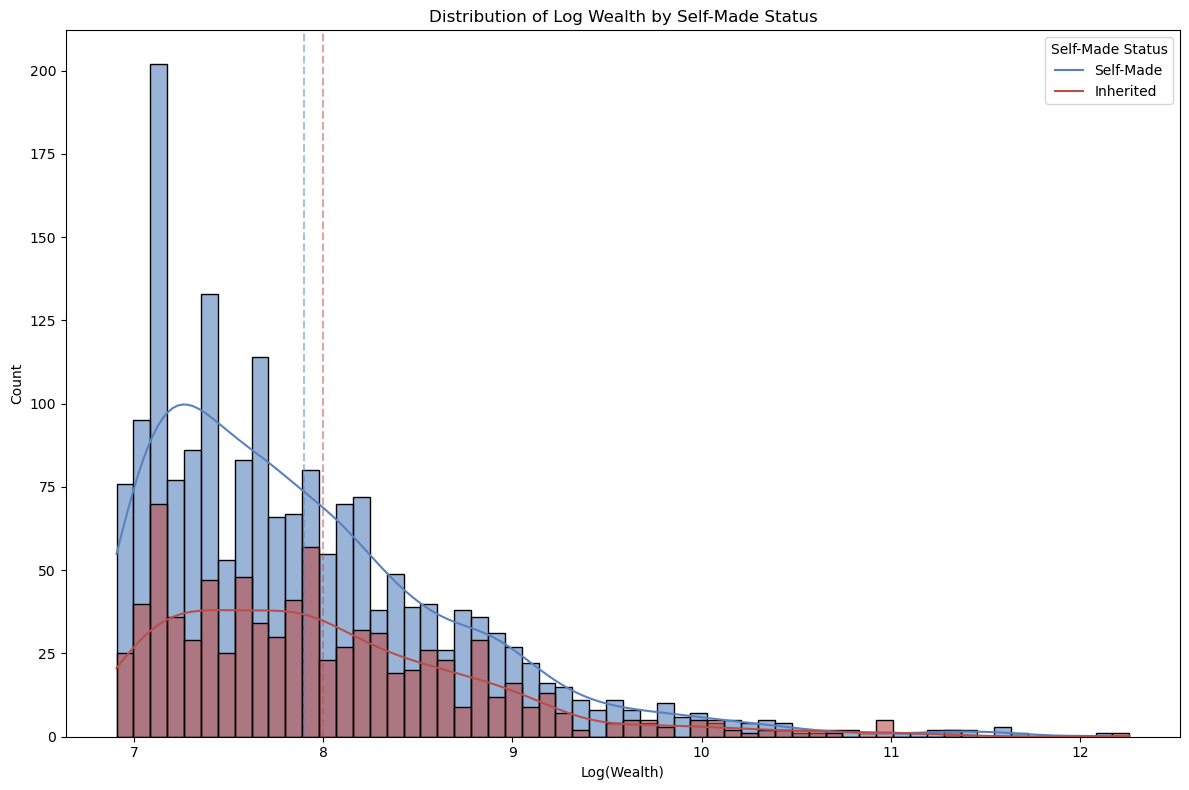

In [76]:
# Create figure and axis
plt.figure(figsize=(12, 8))

# Plot histograms for each group
sns.histplot(data=df, x='log_finalWorth', hue='selfMade',
             # Red and blue colors
             palette={False: '#b94f4b', True: '#5782bf'},
             kde=True, bins=60, edgecolor='black',
             alpha=0.6)

# Customize the plot
plt.title('Distribution of Log Wealth by Self-Made Status')
plt.xlabel('Log(Wealth)')
plt.ylabel('Count')

# Add vertical lines for means
for status in [False, True]:
    mean = df[df['selfMade'] == status]['log_finalWorth'].mean()
    plt.axvline(mean, color={False: '#b94f4b', True: '#5782bf'}[status],
                linestyle='--', alpha=0.5)

# Update legend labels
plt.legend(
    ['Self-Made', 'Inherited'], title="Self-Made Status",
    loc='upper right'
)

plt.tight_layout()
plt.show()

**Nhận xét:**

Dựa trên kết quả phân tích dữ liệu, ta có thể rút ra một số nhận xét như sau:

**Phân tích dữ liệu thống kê**:

1. **Số lượng tỷ phú**

   - **Tỷ phú thừa kế (Inherited)**: 828 người
   - **Tỷ phú tự thân (Self-Made)**: 1812 người
   - **Nhận xét**: Số lượng tỷ phú tự thân vượt trội hơn hẳn, gấp hơn hai lần so với tỷ phú thừa kế (1812 so với 828). Điều này cho thấy phần lớn các tỷ phú trên thế giới đạt được tài sản thông qua nỗ lực cá nhân thay vì thừa hưởng từ gia đình. Tuy nhiên, nhóm thừa kế vẫn chiếm khoảng 31% tổng số tỷ phú (828/2640), chứng tỏ vai trò quan trọng của thừa kế trong việc tạo ra và duy trì tầng lớp tỷ phú.

2. **Giá trị trung bình (Mean)**

   - **Tỷ phú thừa kế**: 7.997367
   - **Tỷ phú tự thân**: 7.899828
   - **Nhận xét**: Giá trị trung bình của log(tài sản ròng) ở nhóm thừa kế cao hơn một chút so với nhóm tự thân (khoảng 0.0975 đơn vị log). Vì đây là logarit tự nhiên, sự khác biệt này tương ứng với tài sản trung bình của tỷ phú thừa kế cao hơn khoảng 10% so với tự thân. Điều này gợi ý rằng, trung bình, tỷ phú thừa kế có xu hướng giàu hơn một chút so với tỷ phú tự thân.

3. **Trung vị (Median)**

   - **Tỷ phú thừa kế**: 7.863267 (khoảng 2.6 tỷ USD)
   - **Tỷ phú tự thân**: 7.696213 (khoảng 2.2 tỷ USD)
   - **Nhận xét**: Trung vị log(tài sản ròng) của nhóm thừa kế cũng cao hơn nhóm tự thân (khoảng 0.167 đơn vị log). Điều này cho thấy tỷ phú thừa kế "điển hình" (ở mức giữa của phân bố) có tài sản ròng cao hơn tỷ phú tự thân "điển hình". Xu hướng này củng cố nhận định rằng nhóm thừa kế thường có mức tài sản cao hơn ở cả mức trung bình và trung vị.

4. **Độ lệch chuẩn (Standard Deviation)**

   - **Tỷ phú thừa kế**: 0.832538
   - **Tỷ phú tự thân**: 0.813898
   - **Nhận xét**: Độ lệch chuẩn của nhóm thừa kế cao hơn một chút so với nhóm tự thân, cho thấy tài sản ròng của tỷ phú thừa kế có sự biến động lớn hơn. Sự khác biệt này có thể phản ánh tính đa dạng trong quy mô tài sản được thừa kế, với một số người nhận được tài sản rất lớn (hàng chục hoặc trăm tỷ USD), trong khi số khác thừa kế ít hơn.

5. **Giá trị tối thiểu (Min)**

   - **Cả hai nhóm**: 6.907755 (1 tỷ USD)
   - **Nhận xét**: Giá trị nhỏ nhất của log(tài sản ròng) là như nhau ở cả hai nhóm, tương ứng với ngưỡng tối thiểu để được coi là tỷ phú (1 tỷ USD). Điều này hợp lý vì đây là tiêu chí chung để xác định tỷ phú, bất kể nguồn gốc tài sản.

6. **Phân vị 25% (25th Percentile)**

   - **Tỷ phú thừa kế**: 7.377759 (khoảng 1.6 tỷ USD)
   - **Tỷ phú tự thân**: 7.313220 (khoảng 1.5 tỷ USD)
   - **Nhận xét**: Ở mức 25% dưới của phân bố, tỷ phú thừa kế có tài sản ròng cao hơn một chút so với tự thân. Điều này cho thấy ngay cả ở nhóm có tài sản thấp nhất trong số các tỷ phú, nhóm thừa kế vẫn có lợi thế nhỏ về giá trị tài sản.

7. **Phân vị 75% (75th Percentile)**

   - **Tỷ phú thừa kế**: 8.439188 (khoảng 4.6 tỷ USD)
   - **Tỷ phú tự thân**: 8.318742 (khoảng 4.1 tỷ USD)
   - **Nhận xét**: Ở mức 75% trên của phân bố, tỷ phú thừa kế tiếp tục có tài sản ròng cao hơn (khoảng 0.12 đơn vị log). Điều này khẳng định xu hướng rằng ở phần trên của phân bố, nhóm thừa kế giàu hơn nhóm tự thân, dù sự khác biệt không quá lớn.

8. **Giá trị tối đa (Max)**

   - **Tỷ phú thừa kế**: 12.259613 (khoảng 210 tỷ USD)
   - **Tỷ phú tự thân**: 12.100712 (khoảng 180 tỷ USD)
   - **Nhận xét**: Giá trị tài sản ròng cao nhất của nhóm thừa kế vượt trội hơn so với nhóm tự thân (khoảng 0.159 đơn vị log), tương ứng với khoảng 210 tỷ USD so với 180 tỷ USD. Điều này cho thấy những tỷ phú giàu nhất thế giới thuộc nhóm thừa kế, với tài sản đạt mức cực đại cao hơn hẳn.

**Phân tích biểu đồ:**

1. **Phân bố lệch phải ở cả hai nhóm**: Phân bố log(tài sản ròng) của cả tỷ phú tự thân và thừa kế đều lệch phải. Đa số tỷ phú có giá trị log wealth từ 7 đến 9 (tương đương khoảng 1 đến 8 tỷ USD), và số lượng giảm mạnh khi giá trị tài sản tăng vượt quá 9, cho thấy phần lớn tỷ phú có tài sản ở mức thấp hơn, với một số ít sở hữu tài sản cực kỳ cao.

2. **Sự chênh lệch trong phân bố**: Mặc dù tỷ phú tự thân đông hơn về số lượng, nhưng ở đuôi phải của phân bố (tài sản cực cao), tỷ phú thừa kế lại chiếm tỷ lệ lớn hơn. Điều này phản ánh rằng tài sản thừa kế thường gắn liền với các giá trị tài sản ròng lớn hơn trong một số trường hợp, có thể do sự tích lũy qua nhiều thế hệ.

3. **So sánh giữa hai nhóm**:

   - Tỷ phú thừa kế có tài sản ròng cao hơn ở hầu hết các chỉ số: trung bình (7.997 vs. 7.900), trung vị (7.863 vs. 7.696), phân vị 25% (7.378 vs. 7.313), phân vị 75% (8.439 vs. 8.319), và giá trị tối đa (12.260 vs. 12.101).

   - Sự biến động lớn hơn ở nhóm thừa kế (độ lệch chuẩn 0.833 vs. 0.814) cho thấy tài sản của nhóm này phân tán rộng hơn, có thể do sự khác biệt lớn giữa các khoản thừa kế.

**Insight về phân bố tài sản ròng:**

- Mặc dù số lượng tỷ phú tự thân chiếm ưu thế, nhưng về mặt giá trị tài sản ròng (trên thang log), các tỷ phú thừa kế có xu hướng đạt mức cao hơn một chút so với các tỷ phú tự thân.

- Sự chênh lệch không đáng kể giữa giá trị trung bình và trung vị **gợi ý rằng**, xét trên tổng thể, xuất thân từ gia đình có của cải thừa kế có thể mang lại một lợi thế nhất định trong quá trình tích lũy tài sản. **Điều này có thể là do** họ được hưởng lợi từ sự hỗ trợ của các nguồn lực gia đình vững chắc và sự tích lũy tài sản qua nhiều thế hệ. **Tuy nhiên, điều đó không phủ nhận rằng**, bằng sự nỗ lực và làm việc chăm chỉ, một người vẫn có thể vươn lên trở thành tỷ phú, ngay cả khi không có bất kỳ tài sản thừa kế nào làm nền tảng.

- Tuy nhiên, cả hai nhóm đều có độ phân tán tương đối tương đồng, điều này cho thấy rằng, dù là tự tạo hay thừa kế, các tỷ phú đều có khả năng tích lũy của cải với mức biến động đáng kể, với một số cá nhân đạt được giá trị cực kỳ cao.

**Kết luận:**

- Mặc dù số lượng tỷ phú tự thân đông hơn đáng kể (1812 so với 828), nhưng trong số các tỷ phú, nhóm thừa kế có xu hướng sở hữu tài sản ròng cao hơn ở hầu hết các mức đo lường (trung bình, trung vị, phân vị).

- Sự biến động lớn hơn ở nhóm thừa kế cho thấy tài sản thừa kế có quy mô rất đa dạng, từ mức tối thiểu 1 tỷ USD đến cực đại 210 tỷ USD. Đặc biệt, những tỷ phú giàu nhất thế giới thuộc nhóm thừa kế, với tài sản vượt trội so với nhóm tự thân (210 tỷ USD so với 180 tỷ USD).

- Phân tích này không chỉ làm rõ sự khác biệt trong phân bố tài sản ròng mà còn nhấn mạnh vai trò quan trọng của thừa kế trong việc duy trì và gia tăng tài sản ở mức cao nhất, bên cạnh con đường tích lũy tài sản thông qua nỗ lực cá nhân.


## 4.14. Phân tích phân bố giá trị tài sản ròng của các tỷ phú theo các ngành nghề (category/industries)


Trong phần này, chúng ta sẽ phân tích phân bố giá trị tài sản ròng của các tỷ phú theo các ngành nghề (category/industries). Mục tiêu chính là **so sánh phân bố giá trị tài sản ròng giữa các ngành nghề** để hiểu rõ hơn sự khác biệt về giá trị tài sản ròng giữa các ngành nghề. Điều này giúp chúng ta có cái nhìn sâu sắc hơn về quá trình tích lũy của cải và sự phân bố giá trị tài sản ròng của các tỷ phú theo ngành nghề.

Đầu tiên, chúng ta sẽ tiền xử lý dữ liệu để tạo các nhóm dữ liệu theo ngành nghề và tính một số giá trị thống kê quan trọng về giá trị tài sản ròng cho từng ngành nghề. _Vì giá trị tài sản ròng có sự chênh lệch lớn giữa các tỷ phú, nên chúng ta sẽ lấy logarit tự nhiên của giá trị tài sản ròng để giảm thiểu ảnh hưởng của các giá trị ngoại lệ và phân bố dữ liệu_.


In [77]:
# Calculate statistics for log_finalWorth by industry
wealth_stats_by_industry = df.groupby(
    "industries")["log_finalWorth"].describe()

# Rename index for readability
wealth_stats_by_industry.index.name = "Industry"

# Sort by count in descending order
wealth_stats_by_industry = wealth_stats_by_industry.sort_values(
    by="count", ascending=False)

# Get the LaTeX representation of the statistics
clipboard.copy(wealth_stats_by_industry.to_latex())

# Display the statistics
print("Log Wealth Statistics by Industry:")
wealth_stats_by_industry

Log Wealth Statistics by Industry:


count      mean       std       min       25%  \
Industry                                                                    
Finance & Investments       372.0  7.976149  0.776114  6.907755  7.313220   
Manufacturing               324.0  7.752653  0.693336  6.907755  7.170120   
Technology                  314.0  7.984711  0.934010  6.907755  7.313220   
Fashion & Retail            266.0  8.052992  0.938119  6.907755  7.377759   
Food & Beverage             212.0  7.964865  0.812457  6.907755  7.313220   
Healthcare                  201.0  7.774422  0.699832  6.907755  7.170120   
Real Estate                 193.0  7.863535  0.671049  6.907755  7.313220   
Diversified                 187.0  7.934632  0.829640  6.907755  7.313220   
Energy                      100.0  8.029207  0.839099  6.907755  7.377759   
Media & Entertainment        91.0  7.897051  0.805059  6.907755  7.313220   
Metals & Mining              74.0  8.164563  0.970853  7.003065  7.377759   
Automotive                   73.0  8.047080  0.996054  6.907755  7.313220   
Service                      53.0  7.829153  0.683864  6.907755  7.244228   
Construction & Engineering   45.0  7.689109  0.559357  6.907755  7.244228   
Logistics                    40.0  8.133269  0.967895  6.907755  7.313220   
Sports                       39.0  7.872877  0.707131  6.907755  7.408071   
Telecom                      31.0  8.018286  0.964829  6.907755  7.313220   
Gambling & Casinos           25.0  8.012642  0.873237  6.907755  7.313220   

                                 50%       75%        max  
Industry                                                   
Finance & Investments       7.863267  8.439188  11.571194  
Manufacturing               7.600902  8.109141  10.298902  
Technology                  7.696213  8.411833  11.643954  
Fashion & Retail            7.824046  8.476371  12.259613  
Food & Beverage             7.824046  8.366370  11.127263  
Healthcare                  7.649693  8.160518  10.025705  
Real Estate                 7.740664  8.216088  10.292146  
Diversified                 7.740664  8.281391  11.331404  
Energy                      7.803635  8.748305  10.146434  
Media & Entertainment       7.824046  8.294050  11.456355  
Metals & Mining             7.862527  8.846601  10.203592  
Automotive                  7.863267  8.294050  12.100712  
Service                     7.863267  8.318742   9.961756  
Construction & Engineering  7.649693  7.901007   9.525151  
Logistics                   8.004140  8.634947  10.573878  
Sports                      7.649693  8.354051   9.495519  
Telecom                     7.937375  8.400091  11.440355  
Gambling & Casinos          7.937375  8.556414  10.463103

Ta sẽ trực quan hóa dữ liệu về phân bố giá trị tài sản ròng của các tỷ phú theo mỗi ngành nghề bằng một biểu đồ violin plot được "tùy chỉnh" để hiển thị phân phối dữ liệu một cách rõ ràng và dễ hiểu. Biểu đồ này giúp chúng ta **nhìn rõ sự khác biệt** giữa phân phối giá trị tài sản ròng của các tỷ phú theo từng ngành nghề.


/tmp/ipykernel_937/1621060421.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


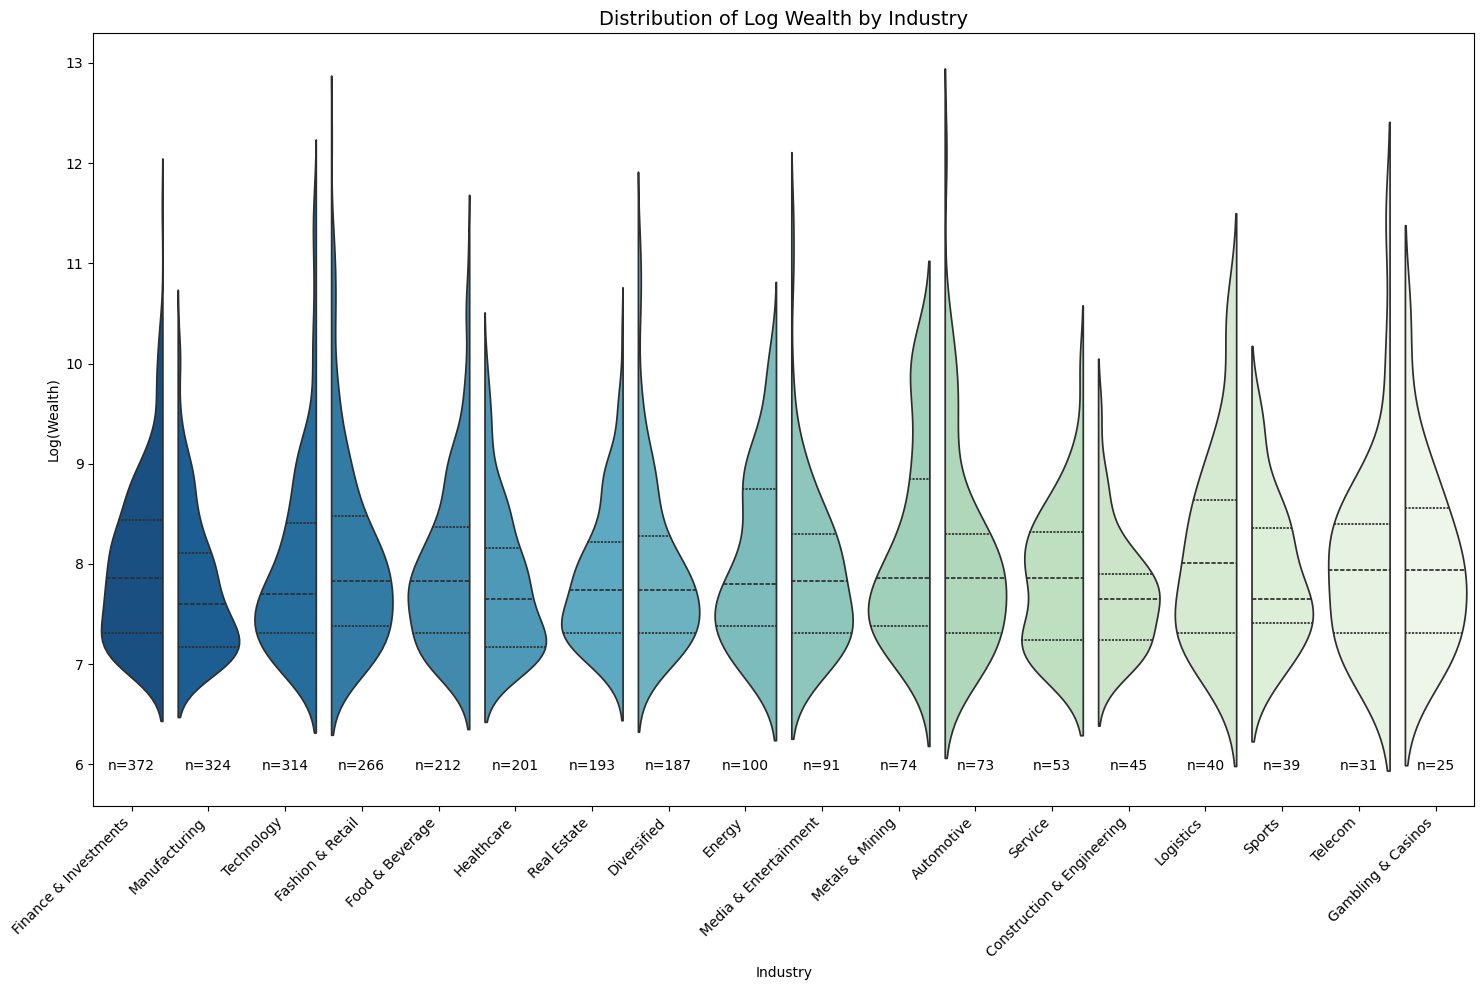

In [78]:
# Create a figure with larger size
plt.figure(figsize=(15, 10))

# Define palette for the violin plot
palette = sns.color_palette(
    palette='GnBu_r', n_colors=len(wealth_stats_by_industry))

# Create violin plot
sns.violinplot(
    data=df, x='industries', y='log_finalWorth',
    order=wealth_stats_by_industry.index,
    split=True, inner='quartile',
    palette=palette,
    width=0.8)

# Customize the plot
plt.title('Distribution of Log Wealth by Industry', fontsize=14)
plt.xlabel('Industry')
plt.ylabel('Log(Wealth)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add sample size annotations
for i, industry in enumerate(wealth_stats_by_industry.index):
    n = df[df['industries'] == industry].shape[0]
    plt.text(i, df['log_finalWorth'].min()-1.0, f'n={n}',
             ha='center', va='bottom', fontsize=10)

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

**Nhận xét:**

Dựa vào kết quả phân tích dữ liệu, ta có thể rút ra một số nhận xét như sau:

1. **Tổng quan về các chỉ số thống kê cơ bản**

   - **Trung bình và trung vị (Mean và Median)**

     - **Ngành có trung bình log wealth cao nhất**:
       - **Metals & Mining**: 8.164563
       - **Logistics**: 8.133269
       - **Fashion & Retail**: 8.052992
       - **Automotive**: 8.047080
     - **Ngành có trung bình log wealth thấp nhất**:
       - **Construction & Engineering**: 7.689109
       - **Manufacturing**: 7.752653
       - **Healthcare**: 7.774422
     - **Nhận xét**: Các ngành như **Metals & Mining** và **Logistics** có giá trị tài sản ròng trung bình cao nhất, cho thấy tỷ phú trong các ngành này thường sở hữu tài sản lớn hơn trung bình. Ngược lại, **Construction & Engineering** và **Manufacturing** có giá trị trung bình thấp hơn, phản ánh mức tài sản ròng khiêm tốn hơn.

   - **So sánh trung bình và trung vị**:

     - Hầu hết các ngành có trung vị (50%) dao động từ 7.5 đến 8.0 (khoảng 1.8 đến 3.0 tỷ USD). Ví dụ:
       - **Metals & Mining**: Mean (8.164563) > Median (7.862527), phân bố lệch phải nhẹ.
       - **Fashion & Retail**: Mean (8.052992) > Median (7.824046), lệch phải rõ hơn.
       - **Construction & Engineering**: Mean (7.689109) $\approx$ Median (7.649693), phân bố khá đối xứng.
     - **Nhận xét**: Sự khác biệt giữa trung bình và trung vị cho thấy một số ngành như **Fashion & Retail** và **Technology** có phân bố lệch phải, tức là tồn tại một số tỷ phú với tài sản cực lớn kéo trung bình lên cao hơn trung vị.

   - **Độ biến thiên (Standard Deviation)**

     - **Ngành có độ lệch chuẩn cao nhất**:
       - **Automotive**: 0.996054
       - **Metals & Mining**: 0.970853
       - **Logistics**: 0.967895
     - **Ngành có độ lệch chuẩn thấp nhất**:
       - **Construction & Engineering**: 0.559357
       - **Real Estate**: 0.671049
       - **Healthcare**: 0.699832
     - **Nhận xét**: **Automotive** và **Metals & Mining** có độ biến thiên lớn, cho thấy sự chênh lệch đáng kể giữa các tỷ phú trong ngành - từ những người có tài sản trung bình đến những người cực kỳ giàu có. Ngược lại, **Construction & Engineering** và **Real Estate** có sự phân bố đồng đều hơn, ít biến động giữa các mức tài sản.

   - **Khoảng giá trị (Range: Min và Max)**

     - **Giá trị nhỏ nhất (Min)**: Tất cả các ngành đều có giá trị log wealth tối thiểu là 6.907755 (~1 tỷ USD), phù hợp với ngưỡng định nghĩa tỷ phú.
     - **Giá trị lớn nhất (Max)**:
       - **Fashion & Retail**: 12.259613 (~210 tỷ USD)
       - **Automotive**: 12.100712 (~180 tỷ USD)
       - **Technology**: 11.643954 (~115 tỷ USD)
     - **Nhận xét**: Các ngành như **Fashion & Retail**, **Automotive**, và **Technology** có những tỷ phú với tài sản tối đa vượt trội, cho thấy đây là nơi tập trung các cá nhân giàu nhất thế giới. Điều này có thể liên quan đến các thương hiệu toàn cầu hoặc sự đổi mới công nghệ.

2. **Phân tích chi tiết một số ngành nổi bật**

   - **Finance & Investments (n=372)**:

     - Mean: 7.976149, Median: 7.863267, Std: 0.776114, Max: 11.571194 (~105 tỷ USD)
     - Phân bố rộng, tập trung quanh 7.5-8.5, với một số tỷ phú có tài sản rất lớn.
     - **Nhận xét**: Ngành này có số lượng tỷ phú lớn nhất và phân bố khá cân bằng, nhưng vẫn có những người cực kỳ giàu.

   - **Technology (n=314)**:

     - Mean: 7.984711, Median: 7.696213, Std: 0.934010, Max: 11.643954 (~115 tỷ USD)
     - Phân bố lệch phải rõ rệt, với đuôi dài kéo đến 11.6, cho thấy sự hiện diện của các tỷ phú công nghệ siêu giàu.
     - **Nhận xét**: Ngành công nghệ vừa có nhiều tỷ phú ở mức trung bình, vừa có những cá nhân với tài sản khổng lồ.

   - **Fashion & Retail (n=266)**:

     - Mean: 8.052992, Median: 7.824046, Std: 0.938119, Max: 12.259613 (~210 tỷ USD)
     - Phân bố lệch phải mạnh, với mức tài sản tối đa cao nhất trong tất cả các ngành.
     - **Nhận xét**: Ngành này có sự chênh lệch lớn, từ các tỷ phú trung bình đến những người giàu nhất thế giới.

   - **Manufacturing (n=324)**:

     - Mean: 7.752653, Median: 7.600902, Std: 0.693336, Max: 10.298902 (~30 tỷ USD)
     - Phân bố hẹp hơn, ít biến thiên và không có giá trị cực đại quá lớn.
     - **Nhận xét**: Tỷ phú trong ngành sản xuất có tài sản đồng đều hơn, ít xuất hiện các mức siêu giàu.

   - **Metals & Mining (n=74)**:

     - Mean: 8.164563, Median: 7.862527, Std: 0.970853, Max: 10.203592 (~27 tỷ USD)
     - Trung bình cao nhất, nhưng độ biến thiên lớn, cho thấy sự phân hóa trong ngành.
     - **Nhận xét**: Ngành này có tỷ phú giàu hơn trung bình, có thể do tính chất vốn lớn và nhu cầu tài nguyên toàn cầu.

3. **So sánh giữa các ngành**

   - **Ngành có tài sản trung bình cao và biến thiên lớn**: **Metals & Mining**, **Logistics**, **Automotive** - vừa có trung bình cao, vừa có sự đa dạng lớn trong tài sản.
   - **Ngành có tài sản đồng đều**: **Construction & Engineering**, **Real Estate** - ít biến động, tài sản tập trung quanh mức trung bình.
   - **Ngành có tỷ phú siêu giàu**: **Fashion & Retail**, **Technology**, **Automotive** - có đuôi phân bố dài, với các giá trị tối đa vượt trội.

**Các insight chính về phân bố tài sản ròng:**

1. **Ngành dẫn đầu về tài sản trung bình**:

   - **Metals & Mining** và **Logistics** có trung bình log wealth cao nhất, cho thấy tỷ phú trong các ngành này thường tích lũy được nhiều tài sản hơn. Điều này có thể liên quan đến nhu cầu tài nguyên toàn cầu hoặc quy mô hoạt động logistics.

2. **Ngành sản sinh tỷ phú siêu giàu**:

   - **Fashion & Retail**, **Automotive**, và **Technology** có giá trị tối đa cao nhất (lên đến 210 tỷ USD), phản ánh sự hiện diện của các tỷ phú hàng đầu thế giới (ví dụ: Bernard Arnault, Elon Musk). Các ngành này thường liên quan đến thương hiệu toàn cầu hoặc đổi mới công nghệ.

3. **Độ biến thiên và sự phân hóa**:

   - Các ngành như **Automotive**, **Metals & Mining** có độ lệch chuẩn cao, cho thấy sự chênh lệch lớn giữa các tỷ phú - từ trung bình đến cực kỳ giàu. Ngược lại, **Construction & Engineering** và **Real Estate** có tài sản đồng đều hơn.

4. **Phân bố lệch phải**:

   - Những ngành như **Fashion & Retail** và **Technology** có trung bình lớn hơn trung vị, chứng tỏ phân bố lệch phải với một số tỷ phú sở hữu tài sản vượt xa phần lớn còn lại.

5. **Ảnh hưởng của quy mô ngành**:

   - Các ngành lớn như **Finance & Investments** (372 tỷ phú) và **Technology** (314 tỷ phú) có số liệu ổn định hơn, trong khi các ngành nhỏ như **Gambling & Casinos** (25 tỷ phú) có thể kém tin cậy hơn do mẫu nhỏ.

6. **Yếu tố tích lũy tài sản**:

   - Các ngành yêu cầu vốn lớn (như **Metals & Mining**, **Energy**) hoặc có khả năng mở rộng toàn cầu (như **Fashion & Retail**, **Technology**) thường tạo ra tỷ phú với tài sản cao hơn.

**Kết luận:**

- Phân bố giá trị tài sản ròng của các tỷ phú thay đổi đáng kể giữa các ngành nghề, phản ánh sự khác biệt trong cơ chế tích lũy tài sản và đặc thù kinh tế của từng lĩnh vực. **Fashion & Retail**, **Technology**, và **Automotive** nổi bật với sự hiện diện của các tỷ phú siêu giàu, trong khi **Construction & Engineering**, **Manufacturing** có tài sản đồng đều và thấp hơn.

- Phân tích này không chỉ làm rõ các xu hướng ngành mà còn nhấn mạnh vai trò của thị trường toàn cầu và đổi mới trong việc tạo ra sự giàu có vượt bậc cho các tỷ phú.


## 4.15. Phân tích số lượng tỷ phú trong top 3 quốc gia dẫn đầu theo các ngành công nghiệp (category/industries)


Trong phần này, chúng ta sẽ phân tích số lượng tỷ phú trong top 3 quốc gia dẫn đầu (về số lượng tỷ phú) theo các ngành công nghiệp (category/industries). Mục tiêu chính là **so sánh số lượng tỷ phú trong top 3 quốc gia dẫn đầu theo từng ngành nghề** để hiểu rõ hơn sự phân bố của tỷ phú trên thế giới. Điều này giúp chúng ta có được ý tưởng rõ ràng về quốc gia nào dẫn đầu trong ngành công nghiệp nào.

Đầu tiên, chúng ta sẽ lọc để lấy ra các mẫu dữ liệu của các tỷ phú từ top 3 quốc gia dẫn đầu. Sau đó, chúng ta sẽ nhóm các mẫu dữ liệu này theo ngành nghề và tính số lượng tỷ phú trong mỗi ngành cho từng quốc gia.

In [79]:
# Get top 3 countries by billionaire count
top_3_countries = df['country'].value_counts().head(3).index

# Filter the dataset to include only billionaires from these three countries
top_3_df = df[df['country'].isin(top_3_countries)]

# Create a cross-tabulation of country and industry
country_industry = pd.crosstab(
    top_3_df['industries'], top_3_df['country'])

In [80]:
# Get the LaTeX representation of
# the number of billionaires by country and industry
clipboard.copy(country_industry.to_latex())

# Display the number of billionaires by country and industry
country_industry

country                     China  India  United States
industries                                             
Automotive                     22     13             12
Construction & Engineering      4      3              5
Diversified                    17     22             13
Energy                         18      0             35
Fashion & Retail               37     10             63
Finance & Investments           8      7            190
Food & Beverage                46     12             74
Gambling & Casinos              0      0              6
Healthcare                     72     29             34
Logistics                       8      1              5
Manufacturing                 143     32             28
Media & Entertainment          11      1             37
Metals & Mining                14      1              1
Real Estate                    31     10             51
Service                        11      2             19
Sports                          0      0             35
Technology                     78     12            141
Telecom                         3      2              5

Vẽ heatmap để trực quan hóa số lượng tỷ phú trong top 3 quốc gia dẫn đầu theo từng ngành nghề. Biểu đồ này giúp chúng ta nhìn rõ sự đóng góp của các quốc gia dẫn đầu trong từng ngành nghề và so sánh mức độ phát triển của các ngành nghề trên toàn cầu.


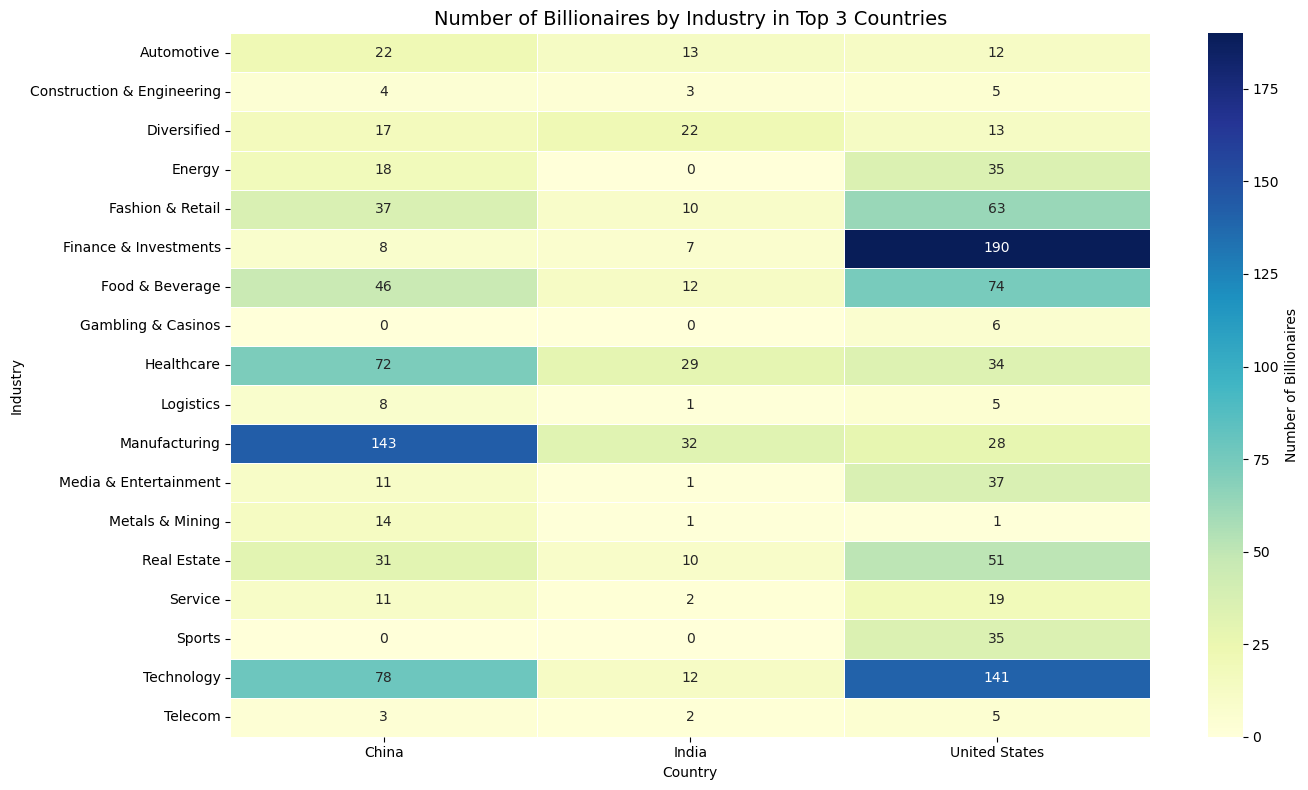

In [81]:
# Create a figure
plt.figure(figsize=(14, 8))

# Create a heatmap
sns.heatmap(
    country_industry,
    annot=True,
    fmt='g',
    cmap='YlGnBu',
    linewidths=0.5,
    cbar_kws={'label': 'Number of Billionaires'}
)

# Customize the plot
plt.title('Number of Billionaires by Industry in Top 3 Countries',
          fontsize=14)
plt.xlabel('Country')
plt.ylabel('Industry')

plt.tight_layout()
plt.show()

**Nhận xét:**

Dựa vào kết quả phân tích dữ liệu, ta có thể rút ra một số nhận xét như sau:

- **Tổng quan về số lượng tỷ phú theo ngành ở 3 quốc gia (China, India, United States):**

  - Các quốc gia này được chọn vì là top 3 dẫn đầu về số lượng tỷ phú, tạo nên bức tranh đa dạng về ngành nghề trên thế giới.

- **Quan sát về số lượng tỷ phú theo ngành:**

  - **United States:**

    - **Finance & Investments:** 190 tỷ phú, dẫn đầu rõ ràng so với các quốc gia khác.

    - **Technology:** 141 tỷ phú, cho thấy Mỹ có sức mạnh đáng kể trong lĩnh vực công nghệ.

    - **Fashion & Retail:** 63 tỷ phú; **Food & Beverage:** 74 tỷ phú; **Media & Entertainment:** 37 tỷ phú; **Real Estate:** 51 tỷ phú; **Sports:** 35 tỷ phú.

    - **Insight:** Mỹ không chỉ có số lượng tỷ phú lớn mà còn tập trung mạnh ở các ngành tài chính, công nghệ và tiêu dùng, cho thấy môi trường kinh doanh và đổi mới sáng tạo rất phát triển.

  - **China:**

    - **Manufacturing:** 143 tỷ phú, vượt trội so với Mỹ (28) và Ấn Độ (32), cho thấy sức mạnh của ngành sản xuất ở Trung Quốc.

    - **Healthcare:** 72 tỷ phú, cao hơn so với Mỹ (34) và Ấn Độ (29), phản ánh sự phát triển của ngành chăm sóc sức khỏe và dược phẩm.

    - **Technology:** 78 tỷ phú, mặc dù thấp hơn Mỹ nhưng vẫn có đóng góp đáng kể.

    - **Energy:** 18 tỷ phú; các ngành khác như Automotive, Diversified cũng có số lượng vừa phải.

    - **Insight:** Trung Quốc dẫn đầu trong các ngành sản xuất (Manufacturing) và chăm sóc sức khỏe (Healthcare), phản ánh đặc thù kinh tế và chính sách hỗ trợ của nước này trong các lĩnh vực này.

  - **India:**

    - Đóng góp vào hầu hết các ngành nhưng số lượng tỷ phú ở mỗi ngành đều thấp hơn so với Mỹ và Trung Quốc (ví dụ: Automotive: 13; Construction & Engineering: 3; Finance & Investments: 7; Technology: 12).

    - **Insight:** Ấn Độ có tỷ phú phân bổ đều qua nhiều ngành nghề, nhưng với số lượng nhỏ, cho thấy sự đa dạng nhưng chưa tập trung mạnh ở một ngành cụ thể.

- **Nhận xét và tổng hợp:**

  - **Phân bố ngành nghề theo quốc gia:**

    - **Mỹ** nổi bật với số lượng tỷ phú tập trung ở các ngành mang tính đổi mới cao như Finance & Investments và Technology, điều này cho thấy Mỹ có hệ sinh thái kinh doanh và đầu tư phát triển vượt trội.

    - **Trung Quốc** dẫn đầu ở các ngành truyền thống như Manufacturing và Healthcare, phản ánh sự phát triển mạnh mẽ của ngành sản xuất và chăm sóc sức khỏe trong nền kinh tế Trung Quốc.

    - **Ấn Độ** mặc dù góp mặt ở nhiều ngành nhưng số lượng tỷ phú ở mỗi ngành tương đối thấp, cho thấy lực lượng tỷ phú của Ấn Độ còn phân tán và chưa tập trung theo một ngành nghề cụ thể.

  - **So sánh sự đóng góp:**

    - Khi so sánh theo ngành, có thể thấy rằng Mỹ chiếm ưu thế đáng kể trong các ngành liên quan đến tài chính và công nghệ, trong khi Trung Quốc tập trung vào các ngành sản xuất và chăm sóc sức khỏe.

    - Ấn Độ đóng góp đa ngành nhưng với số lượng hạn chế, phản ánh một nền kinh tế đang phát triển với lực lượng tỷ phú chưa đủ đông và tập trung.

- **Các insight quan trọng:**

  - **Mỹ dẫn đầu trong các ngành kinh doanh tiên phong:** Với số lượng tỷ phú cao ở Finance & Investments và Technology, Mỹ cho thấy môi trường kinh doanh và đổi mới sáng tạo rất thuận lợi cho sự phát triển của các doanh nhân.

  - **Trung Quốc mạnh về sản xuất và chăm sóc sức khỏe:** Sự tập trung của tỷ phú ở Manufacturing và Healthcare chứng tỏ Trung Quốc đã xây dựng được một nền công nghiệp sản xuất khổng lồ và hệ thống y tế, dược phẩm phát triển.

  - **Ấn Độ đa ngành nhưng số lượng hạn chế:** Dù Ấn Độ có sự góp mặt ở nhiều ngành, nhưng lực lượng tỷ phú của nước này còn phân tán, tạo cơ hội cho sự tăng trưởng trong tương lai nếu các ngành nghề chủ chốt được phát triển mạnh mẽ hơn.


## 4.16. Phân tích độ tuổi trung bình của các tỷ phú theo từng ngành công nghiệp (category/industries)

Trong phần này, chúng ta sẽ phân tích độ tuổi trung bình của các tỷ phú theo từng ngành công nghiệp (category/industries). Mục tiêu chính là **so sánh độ tuổi trung bình của các tỷ phú theo từng ngành nghề** để hiểu rõ hơn sự phân bố độ tuổi của các tỷ phú trên thế giới.

Chúng ta sẽ thực hiện quá trình thống kê bằng cách nhóm dữ liệu theo ngành nghề và tính hai thông số chính: độ tuổi trung bình và số lượng tỷ phú trong mỗi ngành.

In [82]:
# Calculate average age and count by industry
age_by_industry = df.groupby('industries').agg(
    mean_age=('age', 'mean'),
    count=('rank', 'count')
).sort_values('count', ascending=False)

# Get the LaTeX representation of the average age and count by industry
clipboard.copy(age_by_industry.to_latex())

# Display the average age and count by industry
age_by_industry

mean_age  count
industries                                  
Finance & Investments       65.459677    372
Manufacturing               64.669753    324
Technology                  57.487261    314
Fashion & Retail            66.736842    266
Food & Beverage             66.556604    212
Healthcare                  64.691542    201
Real Estate                 68.088083    193
Diversified                 68.604278    187
Energy                      67.740000    100
Media & Entertainment       64.813187     91
Metals & Mining             61.851351     74
Automotive                  66.123288     73
Service                     67.773585     53
Construction & Engineering  64.600000     45
Logistics                   68.100000     40
Sports                      69.025641     39
Telecom                     66.677419     31
Gambling & Casinos          68.520000     25

Để trực quan hóa dữ liệu, chúng ta sẽ xây dựng một **biểu đồ kết hợp** (combined chart) gồm **bar chart** và **line chart**. Bar chart sẽ thể hiện số lượng tỷ phú trong từng ngành, còn line chart sẽ thể hiện độ tuổi trung bình của các tỷ phú trong ngành tương ứng. Biểu đồ này giúp làm sáng tỏ bối cảnh nhân khẩu học và kinh tế của nhiều ngành nghề khác nhau.


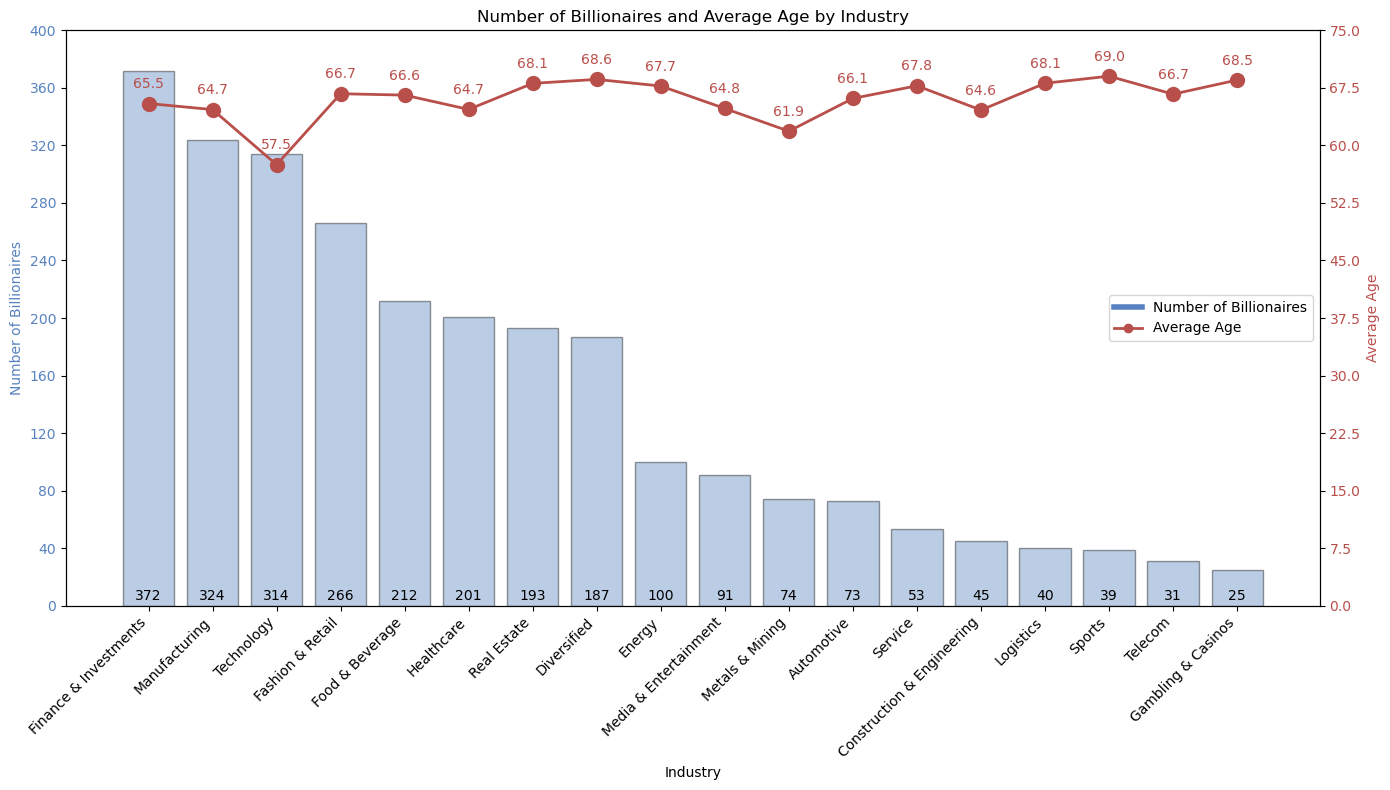

In [83]:
# Create figure with two y-axes
fig, ax1 = plt.subplots(figsize=(14, 8))
ax2 = ax1.twinx()

# Plot bar chart for count
bars = ax1.bar(
    age_by_industry.index, age_by_industry['count'],
    color='#5782bf', alpha=0.4, edgecolor='black',
)
ax1.set_xlabel('Industry')
ax1.set_ylabel('Number of Billionaires', color='#5782bf')
ax1.tick_params(axis='y', labelcolor='#5782bf')
ax1.set_yticks(range(0, 401, 40))
ax1.set_xticks(range(len(age_by_industry)))
ax1.set_xticklabels(age_by_industry.index, rotation=45, ha='right')

# Plot line chart for average age
line = ax2.plot(
    age_by_industry.index, age_by_industry['mean_age'],
    color='#b94f4b', marker='o', linestyle='-', linewidth=2,
    markersize=10
)
ax2.set_ylabel('Average Age', color='#b94f4b')
ax2.tick_params(axis='y', labelcolor='#b94f4b')
ax2.set_yticks(np.arange(0, 80, 7.5))

# Add values on bottom of each bar
for i, v in enumerate(age_by_industry['count']):
    ax1.text(i, 4, str(v), ha='center')

# Add average age values
for i, v in enumerate(age_by_industry['mean_age']):
    ax2.text(i, v + 2, f'{v:.1f}', ha='center', color='#b94f4b')

# Customize the plot
plt.title('Number of Billionaires and Average Age by Industry')
plt.xticks(rotation=45, ha='right')

# Add a legend
custom_lines = [
    Line2D([0], [0], color='#5782bf', lw=4),
    Line2D([0], [0], color='#b94f4b', lw=2, marker='o')
]
plt.legend(custom_lines, ['Number of Billionaires', 'Average Age'],
           loc='center right')

plt.tight_layout()
plt.show()

**Nhận xét**:

Dựa vào kết quả phân tích dữ liệu, ta có thể rút ra một số nhận xét như sau:

- **Tổng quan về độ tuổi trung bình và số lượng tỷ phú theo ngành:**

  - Phần lớn các ngành có độ tuổi trung bình của tỷ phú dao động trong khoảng từ 60 đến gần 70, thể hiện một sự ổn định tương đối về độ tuổi tích lũy của cải.

  - Ngành có số lượng tỷ phú cao như **Finance & Investments (372), Manufacturing (324)** cũng có độ tuổi trung bình xấp xỉ 60-65, phản ánh sự tập trung lớn của cải ở những người thuộc độ tuổi trung niên đến cao niên.

- **Những ngành có độ tuổi trung bình cao hơn:**

  - **Sports (69.03), Diversified (68.60), Gambling & Casinos (68.52), Logistics (68.10), Real Estate (68.09)** đều có độ tuổi trung bình trên 68, cho thấy những người thành công trong các lĩnh vực này thường có quá trình tích lũy của cải lâu hơn.

  - Sự khác biệt này có thể xuất phát từ tính chất thị trường (ví dụ, Sports và Real Estate thường đòi hỏi nhiều vốn và thời gian để xây dựng thương hiệu, tài sản).

- **Ngành công nghệ có độ tuổi trung bình trẻ hơn đáng kể:**

  - **Technology (57.49)** có độ tuổi trung bình thấp nhất trong danh sách, thấp hơn rõ rệt so với các ngành khác (chủ yếu dao động trên 60).

  - Điều này phản ánh xu hướng "trẻ hóa" trong lĩnh vực công nghệ, nơi đổi mới sáng tạo và tốc độ tăng trưởng nhanh tạo điều kiện cho nhiều doanh nhân trẻ trở thành tỷ phú trong thời gian ngắn.

- **Một vài trường hợp nổi bật khác:**

  - **Metals & Mining (61.85)** cũng có độ tuổi trung bình thấp thứ hai, có thể gắn với sự phát triển gần đây trong khai thác khoáng sản hoặc kim loại hiếm, cho phép một số doanh nhân nhanh chóng tạo ra của cải.

  - **Fashion & Retail (66.74)**, **Food & Beverage (66.56)**, **Automotive (66.12)** nằm ở mức trên 66, phản ánh quá trình phát triển thương hiệu hoặc xây dựng chuỗi cung ứng cần thời gian dài.

**Insight tổng hợp**:

- **Độ tuổi trung bình của tỷ phú đa phần ở khoảng 60-65**:

  - Thể hiện sự ổn định và kinh nghiệm cần thiết để xây dựng doanh nghiệp.

- **Công nghệ là "ngành trẻ" nhất:**

  - Với độ tuổi trung bình chỉ khoảng 57.5, công nghệ chứng tỏ khả năng tạo ra giá trị lớn trong thời gian ngắn, thu hút nhiều doanh nhân trẻ khởi nghiệp thành công.

- **Các ngành truyền thống có xu hướng cần nhiều thời gian hơn:**

  - Ngành Sports, Real Estate, Diversified, Logistics, Gambling & Casinos thường đòi hỏi nguồn vốn lớn, tài sản lâu dài hoặc quá trình xây dựng thương hiệu, nên độ tuổi trung bình của tỷ phú thường cao hơn.

- **Sự phân bố độ tuổi cho thấy tính chất và vòng đời khác nhau của từng ngành:**

  - Ngành công nghệ, kim loại/khai khoáng có thể "bùng nổ" nhanh, tạo ra các tỷ phú trẻ.

  - Các ngành như dịch vụ tài chính, sản xuất, bán lẻ, năng lượng, v.v. thường mang tính ổn định, đòi hỏi thời gian dài tích lũy, dẫn đến độ tuổi trung bình cao hơn.

**Kết luận**:

- Từ các nhận xét trên, ta có thể thấy **một xu hướng chung**: đa phần tỷ phú thuộc nhóm tuổi trung niên đến cao niên, tuy nhiên, **công nghệ là ngành duy nhất thể hiện sự "trẻ hóa"** rõ rệt, nơi các doanh nhân có thể tích lũy của cải nhanh chóng nhờ tốc độ tăng trưởng và đổi mới liên tục.


## 4.17. Phân tích mối tương quan giữa các chỉ số về thuế

Trong phần này, ta sẽ phân tích mối tương quan giữa tax revenue (trên trục X) và total tax rate (trên trục Y) bằng biểu đồ scatter plot. Mỗi điểm trên biểu đồ đại diện cho một quốc gia, và vị trí của điểm được xác định bởi giá trị tax revenue và total tax rate của quốc gia đó. Để làm nổi bật thêm thông tin, các điểm trên biểu đồ được tô màu dựa trên life expectancy của quốc gia tương ứng. Qua đó, ta có thể đánh giá mối liên hệ giữa chính sách thuế và tuổi thọ trung bình của người dân.


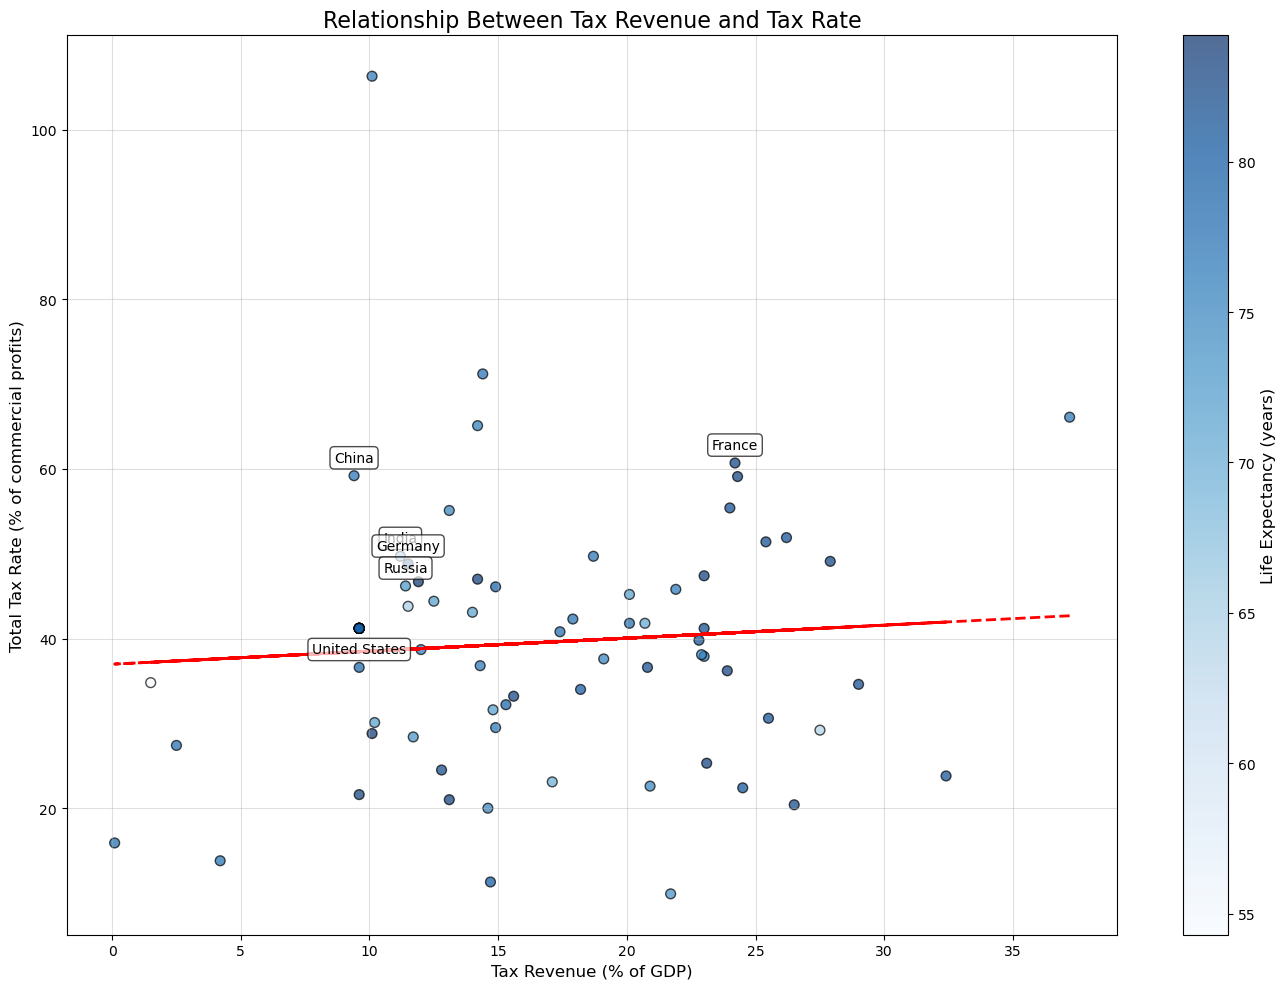

In [84]:
# Create a DataFrame with each row is one country
country_data = df.groupby('country').first()

# Create a scatter plot to explore the relationship between tax metrics
plt.figure(figsize=(14, 10))

# Create a scatter plot with tax revenue on x-axis and total tax rate on y-axis
scatter = plt.scatter(
    x=country_data['tax_revenue_country_country'],
    y=country_data['total_tax_rate_country'],
    c=country_data['life_expectancy_country'],
    s=50,
    alpha=0.7,
    cmap=sns.color_palette("Blues", as_cmap=True),
    edgecolors='black'
)

# Add title and labels
plt.title('Relationship Between Tax Revenue and Tax Rate', fontsize=16)
plt.xlabel('Tax Revenue (% of GDP)', fontsize=12)
plt.ylabel('Total Tax Rate (% of commercial profits)', fontsize=12)

# Add a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Life Expectancy (years)', fontsize=12)

# Add a trend line
x = country_data['tax_revenue_country_country']
y = country_data['total_tax_rate_country']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), 'r--', linewidth=2)

# Add annotations for interesting points
countries_to_label = ['United States', 'China',
                      'India', 'Germany', 'France', 'Russia']
for country in countries_to_label:
    if country in country_data.index:
        data = country_data.loc[country]
        plt.annotate(
            country,
            (data['tax_revenue_country_country'],
             data['total_tax_rate_country']),
            textcoords="offset points",
            xytext=(0, 10),
            ha='center',
            fontsize=10,
            bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.7)
        )

plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()

**Nhận xét:**

Dựa vào biểu đồ **scatter plot** thể hiện mối tương quan giữa **tax revenue** và **tax rate**, đồng thời tô màu các điểm theo **life expectancy**, ta có thể rút ra một số nhận xét và insight như sau:

1. **Mối tương quan giữa tax revenue và tax rate**

   - Đường xu hướng (đường màu đỏ) cho thấy **độ dốc hơi dương**, gợi ý rằng **khi tax revenue (phần trăm GDP) tăng**, total tax rate (phần trăm lợi nhuận thương mại) có xu hướng **tăng nhẹ**.

   - Tuy nhiên, quan sát độ phân tán của các điểm, mối quan hệ này **không quá chặt chẽ** (các điểm khá rải rác), nên ta có thể chỉ ra rằng giữa hai biến có một **tương quan dương yếu** hoặc **rất ít tương quan**.

2. **Phân bố và ngoại lệ**

   - Một số quốc gia có **tax revenue cao** nhưng **tax rate** lại không thật sự cao; ngược lại, có những quốc gia **tax revenue** thấp nhưng **tax rate** cao. Điều này thể hiện **mô hình đánh thuế** và **cách phân bổ nguồn thu thuế** có thể rất khác nhau tùy bối cảnh kinh tế - chính trị của từng nước.

   - Ví dụ:
     - **Hoa Kỳ** có tax revenue xấp xỉ 10% GDP nhưng total tax rate khoảng 40%.
     - **Pháp** có tax revenue cao hơn mức trung bình nhưng tax rate lại phân bố ở mức trung đến cao.
     - **Nga** và **Đức** ở khoảng tax revenue trung bình nhưng tax rate khác nhau.
     - **Trung Quốc** có tax revenue tương đối thấp nhưng total tax rate dao động ở mức trung bình.

3. **Mối liên hệ với life expectancy (màu sắc trên biểu đồ)**

   - Các điểm được tô màu theo tuổi thọ cho thấy **chưa có xu hướng rõ ràng** rằng tax revenue cao hay tax rate cao sẽ đi kèm với tuổi thọ cao hơn.

   - Vẫn có một số nước (chẳng hạn **Pháp**, **Đức**, v.v.) có life expectancy cao, đồng thời tax revenue và tax rate ở mức trung cao. Tuy nhiên, **sự phân tán màu** cho thấy **tuổi thọ** chịu tác động của nhiều yếu tố kinh tế - xã hội khác, không chỉ đơn thuần là chính sách thuế.

4. **Insight tổng quát**

   - **Mô hình thuế khác nhau**: Biểu đồ chỉ ra rằng không tồn tại một công thức chung về "thuế cao - tuổi thọ cao" hay "thuế thấp - tuổi thọ thấp". Mỗi quốc gia có cách đánh thuế (tax rate) và nguồn thu thuế (tax revenue) khác nhau, tùy thuộc vào cấu trúc kinh tế và chính sách xã hội.

   - **Tương quan dương yếu**: Mặc dù đường xu hướng có độ dốc dương, sự phân tán rộng của các điểm cho thấy mối liên hệ giữa tax revenue và tax rate không rõ rệt, chỉ gợi ý một khuynh hướng rất nhẹ.

   - **Tuổi thọ phụ thuộc nhiều yếu tố**: Màu sắc (life expectancy) phân bổ rải rác cho thấy tuổi thọ trung bình của quốc gia không chỉ gói gọn trong chính sách thuế, mà còn liên quan đến nhiều yếu tố như y tế, phúc lợi, giáo dục, mức sống, v.v.

**Kết luận:**

- Tóm lại, biểu đồ cho thấy **một tương quan dương yếu** giữa tax revenue và tax rate, đồng thời **life expectancy** không thể hiện một xu hướng nhất quán khi so sánh với hai biến này. Điều này khẳng định rằng chính sách thuế chỉ là **một phần** trong bức tranh toàn cảnh về kinh tế - xã hội và tuổi thọ của mỗi quốc gia.


## 4.18. Phân tích mối tương quan giữa tỷ lệ nhập học đại học và tiểu học

Ta sẽ sử dụng biểu đồ hexbin để trực quan hóa mối tương quan giữa tỷ lệ nhập học đại học (tertiary education) và tỷ lệ nhập học tiểu học (primary education) giữa các quốc gia. Biểu đồ hexbin chia không gian dữ liệu thành các hình lục giác và tô màu mỗi hình dựa trên mật độ các quốc gia rơi vào vùng đó, giúp thể hiện sự tập trung của dữ liệu một cách trực quan. Màu sắc đậm hơn trong biểu đồ biểu thị khu vực có nhiều quốc gia với sự kết hợp tỷ lệ nhập học đại học và tiểu học tương ứng.


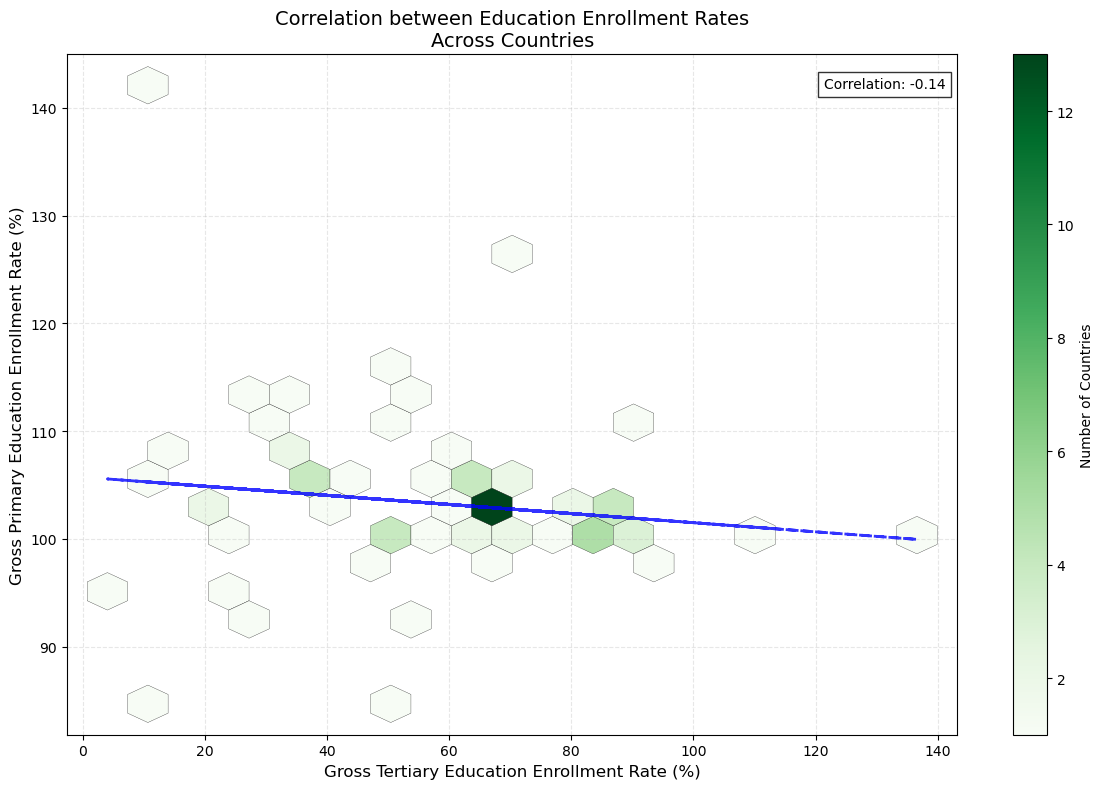

In [85]:
# Create figure and axis
plt.figure(figsize=(12, 8))

# Create hexbin plot
hb = plt.hexbin(country_data['gross_tertiary_education_enrollment'],
                country_data['gross_primary_education_enrollment_country'], 
                gridsize=20,
                cmap=sns.color_palette(palette='Greens', as_cmap=True),
                edgecolors='black',
                linewidths=0.2,
                mincnt=1) # Only color hexbins with 1 or more points

# Add regression line
z = np.polyfit(country_data['gross_tertiary_education_enrollment'],
               country_data['gross_primary_education_enrollment_country'], 1)
p = np.poly1d(z)
plt.plot(country_data['gross_tertiary_education_enrollment'],
         p(country_data['gross_tertiary_education_enrollment']),
         "b--", alpha=0.8, linewidth=2)

# Add labels and title
plt.title('Correlation between Education Enrollment Rates\nAcross Countries',
          fontsize=14)
plt.xlabel('Gross Tertiary Education Enrollment Rate (%)',
          fontsize=12)
plt.ylabel('Gross Primary Education Enrollment Rate (%)',
          fontsize=12)

# Add colorbar
cbar = plt.colorbar(hb)
cbar.set_label('Number of Countries', fontsize=10)

# Add correlation coefficient
corr = country_data['gross_tertiary_education_enrollment'].corr(
    country_data['gross_primary_education_enrollment_country'])
plt.text(0.85, 0.95, f'Correlation: {corr:.2f}',
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8))

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

**Nhận xét:**

Dựa vào biểu đồ **hexbin** so sánh giữa **tỷ lệ nhập học đại học** (trục X) và **tỷ lệ nhập học tiểu học** (trục Y), cùng với hệ số tương quan -0.14, ta có thể rút ra một số nhận xét sau:

1. **Tương quan âm nhưng yếu:**

   - Hệ số tương quan -0.14 cho thấy mối quan hệ giữa hai biến là âm nhưng rất nhỏ, nghĩa là khi tỷ lệ nhập học đại học tăng, tỷ lệ nhập học tiểu học có xu hướng giảm nhẹ.

   - Tuy nhiên, độ lớn của tương quan rất thấp nên khó kết luận rằng có mối quan hệ tuyến tính rõ ràng giữa hai biến.

2. **Phân bố dữ liệu tập trung:**

   - Quan sát các ô (hexbin) được tô đậm cho thấy phần lớn quốc gia tập trung ở khoảng **90-110%** cho tỷ lệ nhập học tiểu học và **30-70%** cho tỷ lệ nhập học đại học.

   - Có một số quốc gia vượt ra ngoài khoảng này (tỷ lệ nhập học đại học có thể lên đến hơn 100%), nhưng nhìn chung chúng không tạo ra một xu hướng tuyến tính rõ rệt.

3. **Sự đa dạng về chính sách giáo dục:**

   - Việc tỷ lệ nhập học tiểu học thường cao (tiệm cận hoặc vượt mức 100% do cách tính Gross Enrollment Ratio) cho thấy nhiều quốc gia đã phổ cập giáo dục tiểu học tương đối thành công.

   - Tỷ lệ nhập học đại học dao động mạnh hơn, phản ánh các chính sách và mức độ đầu tư khác nhau cho giáo dục bậc cao, cũng như điều kiện kinh tế - xã hội của từng quốc gia.

**Insight tổng quát:**

- **Không có mối quan hệ tuyến tính mạnh** giữa hai biến, cho thấy một quốc gia có thể đạt tỷ lệ nhập học tiểu học cao nhưng chưa chắc có tỷ lệ nhập học đại học cao, và ngược lại.

- **Chính sách giáo dục và điều kiện kinh tế** đóng vai trò quan trọng hơn trong việc giải thích sự khác biệt về tỷ lệ nhập học bậc cao, thay vì phụ thuộc đơn thuần vào mức độ phổ cập giáo dục tiểu học.

- Từ góc độ phát triển, nhiều quốc gia ưu tiên phổ cập tiểu học, còn giáo dục đại học phụ thuộc vào nguồn lực, nhu cầu lao động, và mức sống của người dân.

**Kết luận:**

- Tóm lại, biểu đồ cho thấy **một tương quan âm rất yếu** giữa hai tỷ lệ nhập học, đồng thời phản ánh sự **đa dạng** về cách thức và mức độ đầu tư giáo dục bậc cao của các quốc gia, ngay cả khi đã đạt được tỷ lệ nhập học tiểu học tương đối cao.


## 4.19. Phân tích mối quan hệ giữa bốn biến định lượng: CPI, CPI Change, GDP và dân số


Thống kê mô tả về hệ số tương quan giữa các biến định lượng:


In [86]:
country_data[[
    'cpi_country', 'cpi_change_country', 'gdp_country',
    'gross_tertiary_education_enrollment',
    "gross_primary_education_enrollment_country", "life_expectancy_country",
    "tax_revenue_country_country", "total_tax_rate_country", "population_country"
]].corr().style.background_gradient(cmap='coolwarm')

Trong phần này, chúng ta tạo ra một biểu đồ phân tán (scatter plot) để quan sát mối quan hệ giữa bốn biến định lượng: **CPI** (Chỉ số giá tiêu dùng), **CPI Change** (Tỷ lệ thay đổi CPI), **GDP** và **dân số**. Kích thước của mỗi điểm (bubble) tỉ lệ thuận với quy mô dân số, giúp chúng ta dễ dàng nhận diện các quốc gia đông dân. Màu sắc của mỗi điểm được xác định theo giá trị **log(GDP)**, cho phép phân biệt rõ các quốc gia có quy mô GDP lớn hay nhỏ.


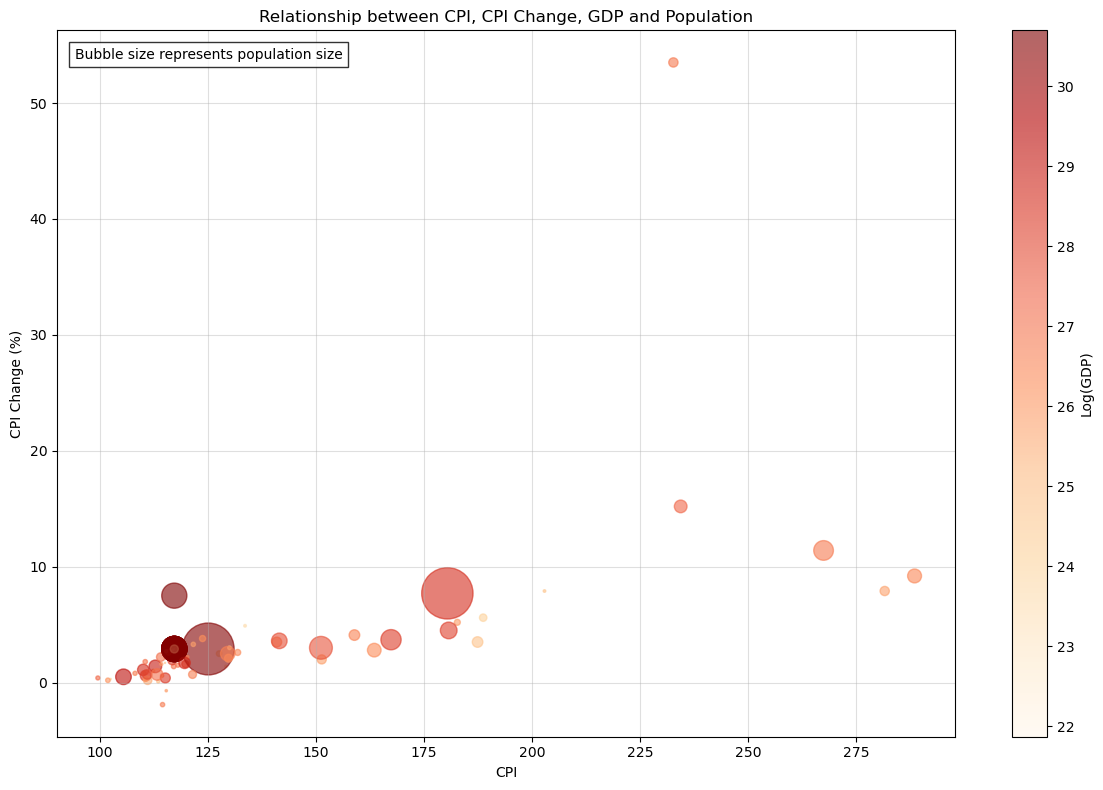

In [87]:
# Create figure and axis
plt.figure(figsize=(12, 8))

# Create scatter plot
plt.scatter(
    country_data['cpi_country'],
    country_data['cpi_change_country'],
    # Scale population for reasonable bubble sizes
    s=country_data['population_country']/1e6,
    c=np.log(country_data['gdp_country']),
    cmap=sns.color_palette(palette='OrRd', as_cmap=True),
    alpha=0.6
)

# Add labels and title
plt.xlabel('CPI')
plt.ylabel('CPI Change (%)')
plt.title('Relationship between CPI, CPI Change, GDP and Population')

# Add colorbar
cbar = plt.colorbar()
cbar.set_label('Log(GDP)')

# Add grid for better readability
plt.grid(True, alpha=0.4)

# Add annotation for bubble size
plt.text(0.02, 0.96, 'Bubble size represents population size',
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8))

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

**Nhận xét:**

1. **Tương quan giữa CPI và CPI Change**

   - Dựa theo phân bố của các điểm trên biểu đồ, ta thấy rằng có một **mối quan hệ tuyến tính theo chiều dương tương đối chặt chẽ** giữa **CPI** và **CPI Change**.

   - Điều này có nghĩa là nếu chỉ số giá tiêu dùng của một quốc gia cao hơn so với mức trung bình, thì khả năng lạm phát của nước đó cũng cao hơn so với mức trung bình.

2. **Phân bố và ngoại lệ**

   - Từ biểu đồ có thể thấy phần lớn quốc gia tập trung ở mức **CPI** từ 90 đến 130 và tỷ lệ **CPI Change** trong khoảng 0-10%.

   - Trong khi một số ít nước vượt ra ngoài phạm vi này, thể hiện mức biến động giá cao hơn.

3. **Mối liên hệ với dân số (kích thước vòng tròn)**

   - Kích thước của vòng tròn (bubble) cho biết **quy mô dân số**. Các quốc gia đông dân thường nằm gần vùng CPI trung bình, cho thấy không hẳn có mối liên hệ rõ ràng giữa dân số và chỉ số giá.

4. **Mối liên hệ với GDP (màu sắc vòng tròn)**

   - Sắc độ màu biểu diễn **log(GDP)** cho thấy những nước có GDP cao không nhất thiết có CPI hoặc CPI Change nổi trội, mà phân bố rải rác, phản ánh sự đa dạng về cấu trúc kinh tế và lạm phát.

**Kết luận:**

- Nhìn chung, khi CPI cao hơn, tỷ lệ biến động CPI (CPI Change) cũng có xu hướng cao hơn, phản ánh lạm phát có thể duy trì ở mức tương đối đồng nhất hoặc gia tăng theo chỉ số giá.

- Dân số hay GDP không phải là biến duy nhất chi phối CPI hay CPI Change, mà còn chịu ảnh hưởng của nhiều yếu tố kinh tế - xã hội khác (chính sách tiền tệ, cơ cấu nhập khẩu, dự trữ ngoại hối, v.v.). Nghĩa là, mức độ lạm phát và quy mô nền kinh tế của mỗi nước phụ thuộc vào nhiều yếu tố khác nhau, chứ không chỉ đơn thuần dựa trên dân số hay chỉ số giá tiêu dùng.


## 4.20. Phân tích mối tương quan giữa giá trị tài sản và độ tuổi của tỷ phú theo giới tính


Thống kê mô tả:

In [88]:
df.groupby("gender")[["age", "log_finalWorth"]].describe().T

gender                         F            M
age            count  337.000000  2303.000000
               mean    63.673591    65.350847
               std     13.716311    12.989512
               min     19.000000    18.000000
               25%     55.000000    56.000000
               50%     65.000000    65.000000
               75%     73.000000    75.000000
               max     98.000000   101.000000
log_finalWorth count  337.000000  2303.000000
               mean     7.953821     7.926996
               std      0.833859     0.819092
               min      6.907755     6.907755
               25%      7.313220     7.313220
               50%      7.824046     7.740664
               75%      8.476371     8.342840
               max     11.296012    12.259613

Ta sẽ tạo ra hai biểu đồ phân phối mật độ kernel (KDE) để so sánh mối tương quan giữa tuổi và giá trị log của tài sản ròng của các tỷ phú theo giới tính. Biểu đồ bên trái hiển thị dữ liệu của tỷ phú nữ với bảng màu đỏ, còn bên phải hiển thị dữ liệu của tỷ phú nam với bảng màu xanh. Cả hai biểu đồ đều được thiết lập cùng giới hạn trục y để dễ dàng so sánh trực tiếp giữa hai nhóm.


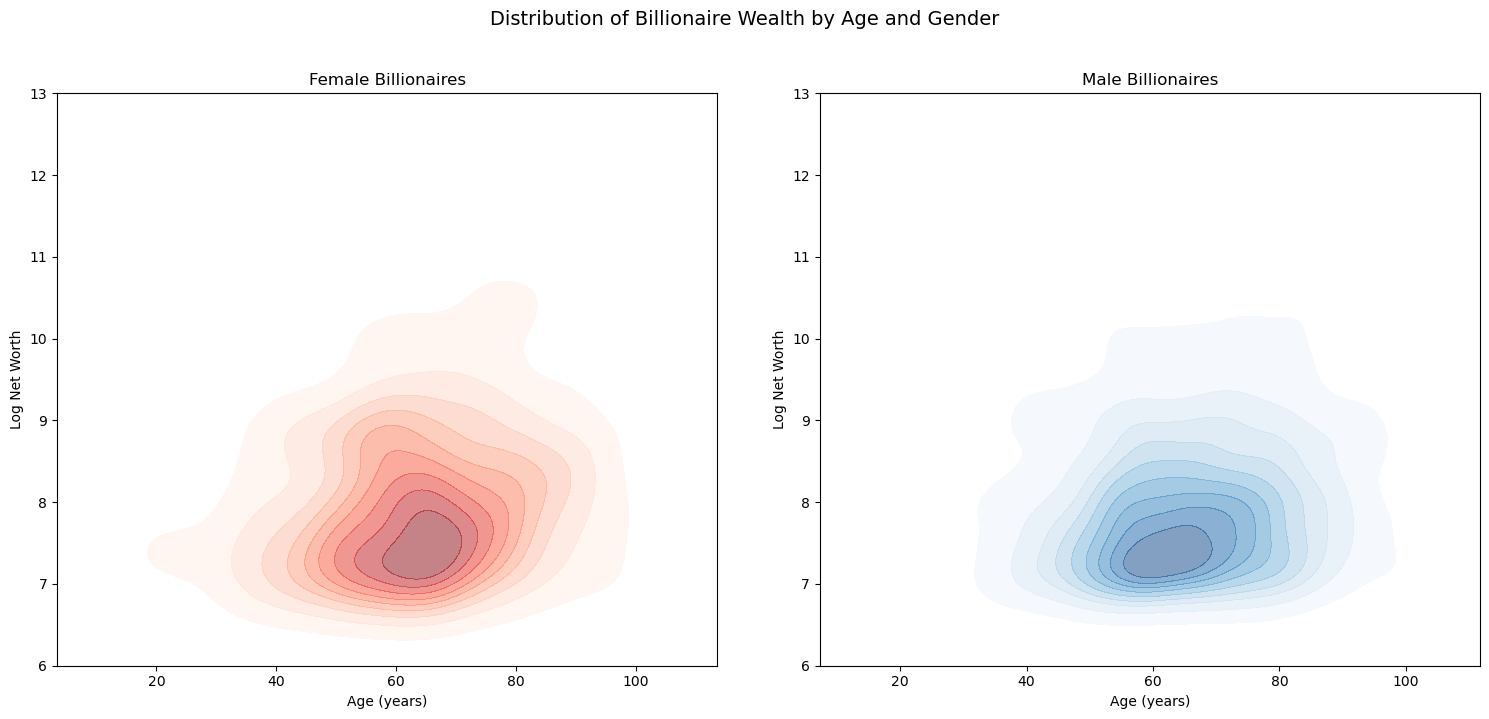

In [89]:
# Create figure and axes for two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Plot KDE for females
sns.kdeplot(data=df[df['gender'] == 'F'],
            x='age', y='log_finalWorth',
            ax=ax1,
            cmap='Reds',
            fill=True,
            alpha=0.5)
ax1.set_title('Female Billionaires')
ax1.set_xlabel('Age (years)')
ax1.set_ylabel('Log Net Worth')

# Plot KDE for males
sns.kdeplot(data=df[df['gender'] == 'M'],
            x='age', y='log_finalWorth',
            ax=ax2,
            cmap='Blues',
            fill=True,
            alpha=0.5)

ax2.set_title('Male Billionaires')
ax2.set_xlabel('Age (years)')
ax2.set_ylabel('Log Net Worth')

# Get overall y-axis limits
y_min = np.floor(df['log_finalWorth'].min() - 0.5)
y_max = np.ceil(df['log_finalWorth'].max() + 0.5)

# Set same y-axis limits for both plots
ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)

# Add main title
plt.suptitle('Distribution of Billionaire Wealth by Age and Gender',
             y=1.02, fontsize=14)

# Adjust space between subplots
plt.tight_layout(w_pad=4)
plt.show()

**Nhận xét:**

- **Phân bố tuổi của tỷ phú nam và nữ:**

  - Nhìn chung, cả hai nhóm đều tập trung mạnh ở khoảng tuổi trung niên đến cao niên (từ 50-70 tuổi), nhưng nhóm nam có dải phân bố rộng hơn một chút.

  - Trong khi nhóm nam có một phần trải dài về tuổi trẻ hơn (khoảng 30-40 tuổi), thì nhóm nữ ít có sự xuất hiện ở độ tuổi này.

  - Ở nhóm nữ, đám mây mật độ dày nhất xuất hiện trong khoảng 60-80 tuổi, cho thấy đa số tỷ phú nữ đạt đến mức giàu có ở độ tuổi cao hơn so với nam.

- **Phân bố giá trị tài sản (log(finalWorth)) theo tuổi:**

  - Cả hai nhóm nam và nữ đều có mật độ tập trung ở mức log(finalWorth) từ 7 đến 9 (tương đương từ 1 đến 8 tỷ USD), nhưng nhóm nam có một số tỷ phú giàu có hơn (log(finalWorth) > 10) so với nhóm nữ.

- **So sánh mức độ đa dạng:**

  - Phân bố của nam giới trông "trải dài" hơn cả về độ tuổi lẫn giá trị tài sản, phản ánh số lượng tỷ phú nam nhiều hơn và sự đa dạng trong quá trình tích lũy của cải.

  - Phân bố của nữ giới tập trung thành một khối rõ ràng hơn, có thể do tỷ lệ tỷ phú nữ trong tập dữ liệu thấp hơn, khiến đám mây mật độ ít phân tán.

- **Điểm chung về độ tuổi tích lũy của cải:**

  - Dù có sự khác biệt về phạm vi tuổi, cả hai giới đều tập trung mạnh nhất ở độ tuổi trung niên đến cao niên, gợi ý rằng việc trở thành tỷ phú thường cần quá trình tích lũy lâu dài và mạng lưới kinh doanh rộng.

**Kết luận:**

- **Sự khác biệt chính** nằm ở dải tuổi của tỷ phú nam rộng hơn, trong khi nữ giới thường đạt đỉnh giàu có ở độ tuổi cao hơn.

- Khi xét đến các tỷ phú ngự trị ở đầu danh sách của sự giàu có, ta có thể thấy sự chênh lệch giữa hai giới về giá trị tài sản, với nam giới thường giàu hơn.

- **Yếu tố văn hóa - xã hội** có thể tác động đến khả năng khởi nghiệp sớm và cơ hội tích lũy của cải của hai giới, phản ánh qua sự chênh lệch về độ tuổi khi đạt đến ngưỡng tài sản cao.


## 4.21. Phân tích mối tương quan giữa giá trị tài sản và độ tuổi của tỷ phú tự thân và tỷ phú thừa kế


Thống kê mô tả:

In [90]:
df.groupby("selfMade")[["age", "log_finalWorth"]].describe().T

selfMade                   False        True 
age            count  828.000000  1812.000000
               mean    66.092995    64.699779
               std     13.581579    12.844925
               min     18.000000    28.000000
               25%     58.000000    56.000000
               50%     67.000000    64.000000
               75%     76.000000    74.000000
               max     99.000000   101.000000
log_finalWorth count  828.000000  1812.000000
               mean     7.997367     7.899828
               std      0.832538     0.813898
               min      6.907755     6.907755
               25%      7.377759     7.313220
               50%      7.863267     7.696213
               75%      8.439188     8.318742
               max     12.259613    12.100712

Chúng ta sẽ tạo ra một biểu đồ kết hợp (jointplot) để hiển thị mối tương quan giữa độ tuổi (`age`) và log giá trị tài sản (`log_finalWorth`) của các tỷ phú, phân nhóm dựa trên việc họ có tự thân tạo dựng tài sản hay không (`selfMade`). Đầu tiên, ta cần vẽ các điểm dữ liệu trên cùng một biểu đồ và tô màu khác nhau cho hai nhóm (thừa kế và tự thân). Sau đó, ta bổ sung thêm hai đường hồi quy để minh họa xu hướng của mỗi nhóm, kèm theo hệ số tương quan giữa độ tuổi và tài sản ròng cho từng nhóm.


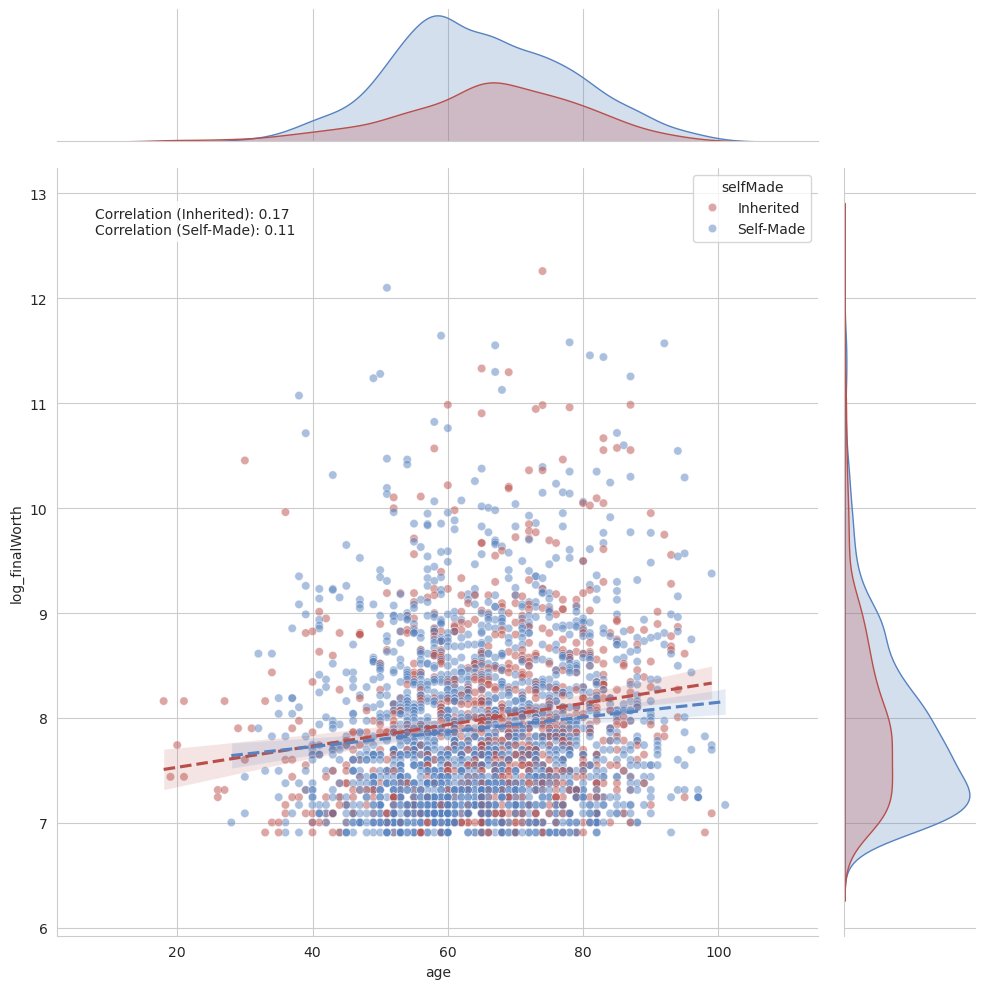

In [91]:
# Create jointplot for age vs log_finalWorth, colored by selfMade status
sns.set_style("whitegrid")
g = sns.jointplot(
    data=df,
    x="age",
    y="log_finalWorth",
    hue="selfMade",
    kind="scatter",
    joint_kws={'alpha': 0.5},
    hue_order=[False, True],
    palette={True: "#5782bf", False: "#b94f4b"},
    height=10
)

# Add regression lines for each group
inherited = df[df["selfMade"] == False]
self_made = df[df["selfMade"] == True]

sns.regplot(data=inherited, x="age", y="log_finalWorth",
            scatter=False, ax=g.ax_joint, color="#b94f4b",
            line_kws={'linestyle': '--'})
sns.regplot(data=self_made, x="age", y="log_finalWorth",
            scatter=False, ax=g.ax_joint, color="#5782bf",
            line_kws={'linestyle': '--'})

# Calculate correlations
corr_inherited = inherited["age"].corr(inherited["log_finalWorth"])
corr_self_made = self_made["age"].corr(self_made["log_finalWorth"])

# Add text annotations with white background bounding box
g.ax_joint.text(0.05, 0.95,
                f'Correlation (Inherited): {corr_inherited:.2f}\n' +
                f'Correlation (Self-Made): {corr_self_made:.2f}',
                transform=g.ax_joint.transAxes,
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'),
                fontsize=10,
                verticalalignment='top')

# Update legend labels
new_labels = ['Inherited', 'Self-Made']
leg = g.ax_joint.get_legend()
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)

plt.show()

**Nhận xét:**

- **Phân bố điểm dữ liệu và sự khác biệt giữa hai nhóm:**

  - Cả hai nhóm thừa kế (Inherited) và tự thân (Self-Made) đều phân bố trải rộng ở độ tuổi 30-80, nhưng mật độ chính tập trung trong khoảng 50-70 tuổi.

  - Nhóm tự thân có vẻ xuất hiện đa dạng hơn ở dải tuổi trẻ (30-40) so với nhóm thừa kế.

- **Xu hướng hồi quy và hệ số tương quan:**

  - Đường hồi quy của cả hai nhóm đều dốc lên, cho thấy khi tuổi tăng, giá trị tài sản (trên thang log) có khuynh hướng cao hơn. Điều này cũng không quá khó hiểu vì thời gian cho phép tích lũy tài sản và kinh nghiệm kinh doanh cũng tăng theo tuổi.

  - Hệ số tương quan của nhóm thừa kế cao hơn (0.17) so với nhóm tự thân (0.11), nhưng cả hai đều tương đối thấp, gợi ý rằng mối liên hệ vừa phải hoặc yếu giữa độ tuổi và giá trị tài sản ở cả hai nhóm.

- **Phân bố log tài sản ròng:**

  - Nhìn vào các trục phụ ở trên và bên phải (kde), cả hai nhóm tập trung mạnh ở log tài sản từ 7-9, tương đương với mức tài sản từ 1 đến 8 tỷ USD.

  - Một số ít cá nhân có log tài sản trên 10, cho thấy vẫn tồn tại ngoại lệ có tài sản cực kỳ cao so với các mẫu khác trong cùng nhóm.

**Kết luận:**

- Mặc dù cả hai nhóm đều có xu hướng tăng giá trị tài sản theo độ tuổi, nhưng mối quan hệ này không quá chặt chẽ (corr < 0.2).

- Nhóm tự thân có xu hướng khởi nghiệp và tích lũy của cải ở độ tuổi trẻ hơn, trong khi nhóm thừa kế thường đạt mức tài sản cao hơn ở độ tuổi trung niên đến cao niên.

- Kết quả này cho thấy việc tích lũy của cải của tỷ phú phụ thuộc vào nhiều yếu tố (nguồn gốc tài sản, bối cảnh kinh tế, kỹ năng kinh doanh, v.v.) hơn là chỉ riêng độ tuổi.


## 4.22. Phân tích mối tương quan giữa giá trị tài sản và độ tuổi của tỷ phú trong top 3 ngành công nghiệp phổ biến nhất


Chúng ta sẽ lọc dữ liệu để lấy ra ba ngành công nghiệp có số lượng tỷ phú nhiều nhất, sau đó hiển thị mối quan hệ giữa độ tuổi và log giá trị tài sản cho từng ngành. Đầu tiên, ta xác định top 3 ngành bằng hàm `value_counts()`, rồi lọc dữ liệu để chỉ lấy các bản ghi thuộc những ngành này. Tiếp theo, ta tạo ba biểu đồ con (subplots) và dùng `regplot` để vẽ từng biểu đồ phân tán cùng đường hồi quy, đồng thời tính toán hệ số tương quan giữa hai biến.


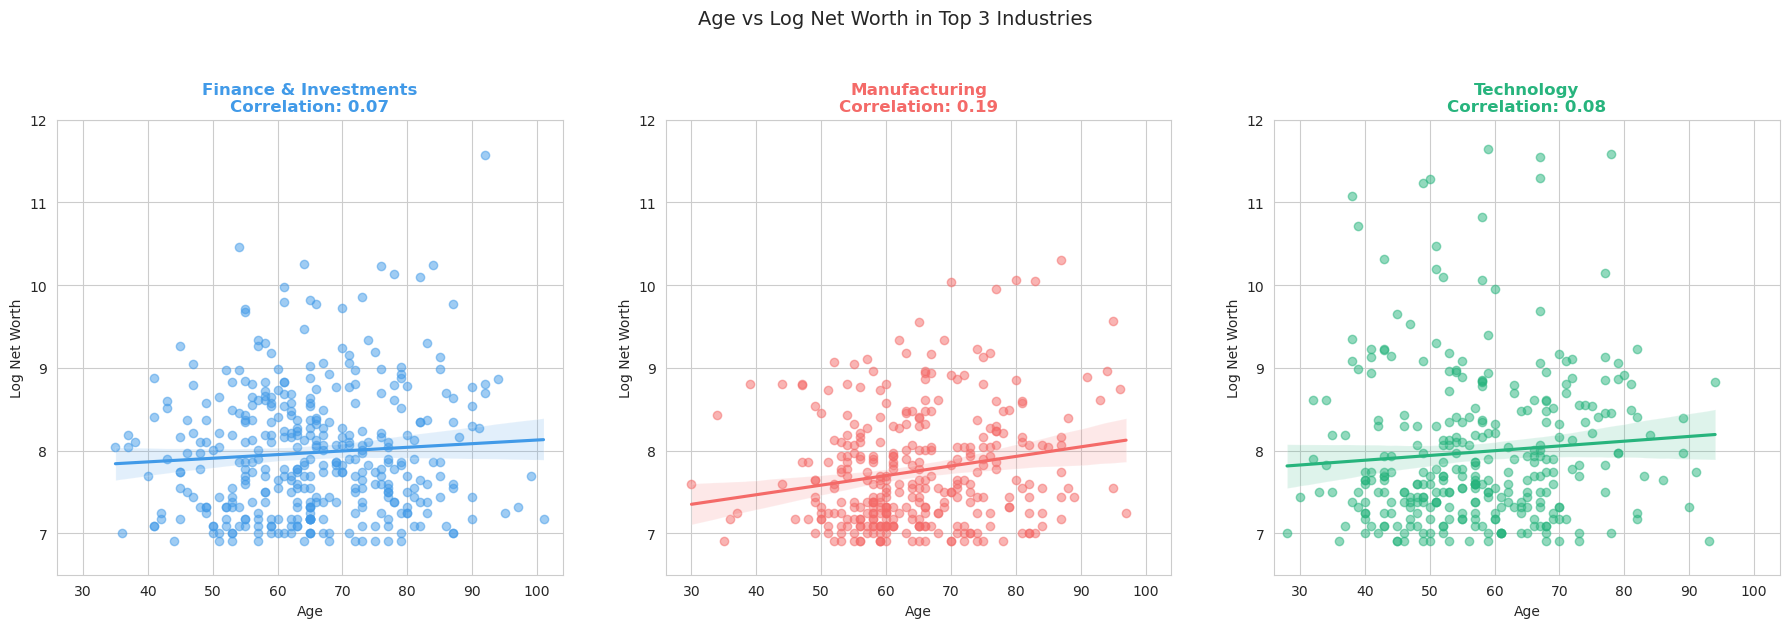

In [92]:
# Get top 3 industries by count
top_3_industries = df['industries'].value_counts().head(3).index

# Filter data for top 3 industries
top_3_ind_df = df[df['industries'].isin(top_3_industries)]

# Create figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
axes = [ax1, ax2, ax3]

# Define colors for each industry
colors = ['#419ae8', '#f46a68', '#27b47d']

# Plot data for each industry
for i, industry in enumerate(top_3_industries):
    industry_data = top_3_ind_df[top_3_ind_df['industries'] == industry]

    # Calculate correlation coefficient
    corr = industry_data['age'].corr(industry_data['log_finalWorth'])

    # Create scatter plot with regression line
    sns.regplot(data=industry_data, x='age', y='log_finalWorth',
                ax=axes[i], color=colors[i], scatter_kws={'alpha': 0.5})

    # Customize subplot
    axes[i].set_title(f'{industry}\nCorrelation: {corr:.2f}',
                      color=colors[i], fontsize=12, fontweight=600)
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel('Log Net Worth')

    # Set same x-axis and y-axis limits across subplots
    axes[i].set_ylim(6.5, 12)
    axes[i].set_xlim(26, 104)

plt.suptitle('Age vs Log Net Worth in Top 3 Industries',
             y=1.04, fontsize=14)
plt.tight_layout(w_pad=4)
plt.show()

**Nhận xét:**

Dựa vào kết quả phân tích từ biểu đồ và hệ số tương quan, ta có thể rút ra một số nhận xét sau:

1. **Finance & Investments (Tài chính & Đầu tư):**

   - Hệ số tương quan giữa tuổi và tài sản của tỷ phú hoạt động trong ngành này là 0.07. Điều này cho thấy gần như không có mối tương quan nào giữa tuổi và tài sản của các tỷ phú hoạt động trong ngành này.

   - Phần lớn các tỷ phú trong ngành đều có độ tuổi tập trung trong khoảng 50-80 tuổi. Tuy nhiên, ta cũng có thể bắt gặp một vài trường hợp ngoại lệ về các tỷ phú trẻ (dưới 40 tuổi) nhưng tương đối hiếm.

   - Phân bố giá trị tài sản của các tỷ phú trong ngành tập trung chủ yếu trong khoảng 7-9 log units. Tuy nhiên cũng có một số trường hợp ngoại lệ sở hữu giá trị tài sản cực kỳ lớn (trên 11 log units).

2. **Manufacturing (Sản xuất):**

   - Với hệ số tương quan là 0.19, ta nhận thấy có vẻ như tồn tại một mối tương quan dương yếu giữa tuổi và tài sản của tỷ phú hoạt động trong ngành này.

   - Các tỷ phú trong ngành này có độ tuổi phân bố khá đều từ 30-98 tuổi, từ những người trẻ đến những người có nhiều năm kinh nghiệm.

   - Phân bố giá trị tài sản của các tỷ phú trong ngành tương đối hẹp so với ngành Tài chính & Đầu tư. Ta thấy giá trị tài sản tập trung chủ yếu trong khoảng 7-9 log units. Đặc biệt, ngành này có rất ít các trường hợp ngoại lệ về giá trị tài sản cao vượt trội so với các tỷ phú khác.

3. **Technology (Công nghệ):**

   - Với hệ số tương quan là 0.08, ta thấy gần như không có mối tương quan nào giữa tuổi và tài sản của các tỷ phú hoạt động trong ngành này.

   - Phân bố độ tuổi của các tỷ phú trong ngành tương đối rộng, từ dưới 30 tuổi đến trên 90 tuổi. Đặc biệt, ta thấy rằng ngành này có số lượng tỷ phú trẻ nhiều hơn vượt trội so với hai ngành còn lại.

   - Đồng thời, ngành này cũng có phân bố giá trị tài sản rộng hơn, với một số điểm ngoại lệ cực kỳ cao (trên 11 log units).

   - Những thông tin này đều ủng hộ cho một xu hướng chung là các tỷ phú trong ngành Công nghệ có thể đạt được tài sản lớn ở độ tuổi trẻ hơn so với hai ngành còn lại.

**Kết luận:**

- Các ngành khác nhau có mô hình tích lũy tài sản khác nhau:

  - Ngành Tài chính & Đầu tư có xu hướng tích lũy tài sản theo thời gian.
  - Ngành Sản xuất có phân bố tương đối đồng đều.
  - Ngành Công nghệ cho phép tích lũy tài sản ở độ tuổi trẻ hơn.

- Công nghệ là ngành có nhiều cơ hội nhất cho các doanh nhân trẻ muốn trở thành tỷ phú, trong khi Tài chính & Đầu tư thường đòi hỏi thời gian tích lũy kinh nghiệm và mạng lưới quan hệ lâu dài hơn.


## 4.23. Phân tích mối tương quan giữa GDP, dân số và số lượng tỷ phú của mỗi quốc gia


Chúng ta sẽ xây dựng một biểu đồ phân tán 3D để trực quan hóa mối quan hệ giữa GDP, dân số và số lượng tỷ phú ở từng quốc gia, tất cả được chuyển sang thang log để hạn chế ảnh hưởng của các giá trị ngoại lệ. Đầu tiên, ta cần khởi tạo một figure với kích thước lớn, rồi thêm một subplot ba chiều (3D) cho việc vẽ. Tiếp theo, ba mảng dữ liệu x, y, z lần lượt được tạo ra từ _log(GDP), log(dân số) và log(số lượng tỷ phú)_ của mỗi quốc gia. Cuối cùng, ta sử dụng hàm `scatter()` để vẽ các điểm dữ liệu trên biểu đồ 3D, với màu sắc phụ thuộc vào dữ liệu trên trục z.


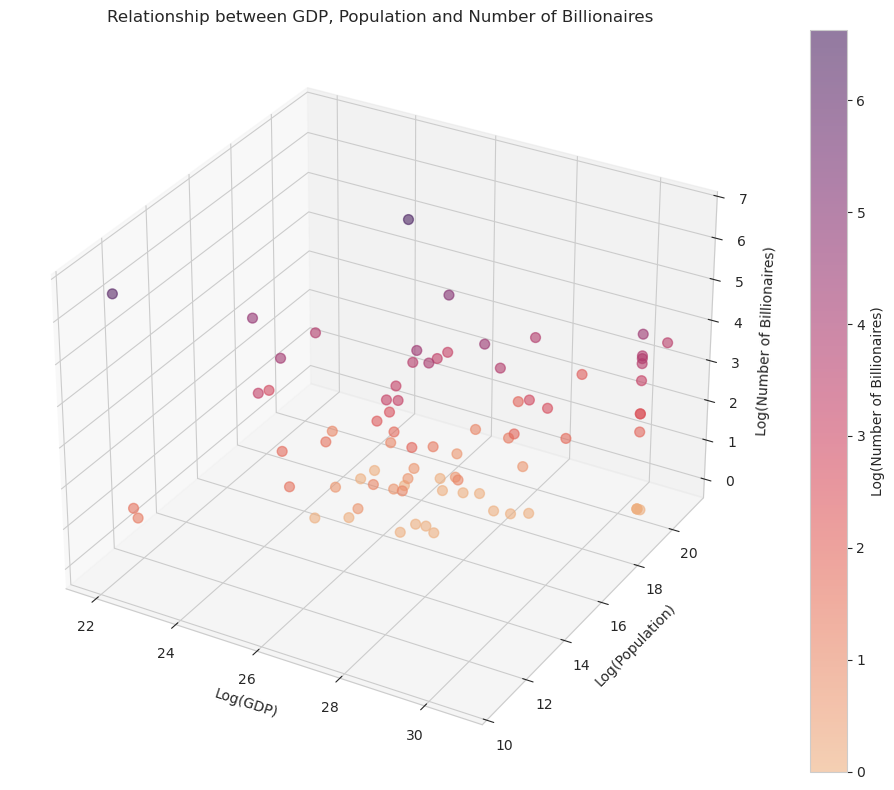

In [93]:
# Create figure for 3D plot with larger figure size
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create data for the plot
x_data = np.log(country_data['gdp_country'])
y_data = np.log(country_data['population_country'])
z_data = np.log(df['country'].value_counts())

# Create scatter plot with log scales
scatter = ax.scatter(
    x_data, y_data, z_data,
    s=50, alpha=0.6, cmap='flare',
    c=z_data,
)

# Add labels and title
ax.set_xlabel('Log(GDP)')
ax.set_ylabel('Log(Population)')
ax.set_zlabel('Log(Number of Billionaires)')
plt.title('Relationship between GDP, Population and Number of Billionaires')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Log(Number of Billionaires)')

# Adjust viewing angle
# ax.view_init(135, 0)

plt.tight_layout()
plt.show()

**Nhận xét:**

Dựa theo biểu đồ 3D mô tả mối tương quan giữa log(GDP), log(Population) và log(Số lượng tỷ phú), ta có thể rút ra một số nhận xét và insight như sau:

- Các quốc gia có GDP cao (sau khi chuyển đổi log) thường có xu hướng có số lượng tỷ phú nhiều hơn, cho thấy quy mô kinh tế lớn tạo điều kiện tích lũy của cải cao.

- Quy mô dân số cũng quan trọng; những quốc gia có dân số lớn có khả năng sản sinh số lượng tỷ phú cao, mặc dù dân số không đơn thuần quyết định nếu GDP không đủ lớn.

- Một số quốc gia có GDP tương đối cao nhưng dân số nhỏ vẫn có số lượng tỷ phú đáng kể, cho thấy hiệu suất kinh tế và mức sống (GDP/người) có vai trò quyết định.

- Từ góc độ log, mối tương quan giữa ba biến không hoàn toàn tuyến tính; có ngoại lệ và sự phân tán khá lớn, cho thấy ngoài GDP và dân số, còn nhiều yếu tố khác (chính sách, môi trường đầu tư, văn hóa kinh doanh) ảnh hưởng đến sự ra đời của các tỷ phú.

**Kết luận:**

- Quy mô nền kinh tế (GDP) là yếu tố chủ chốt tạo ra điều kiện cho việc tích lũy tài sản ở cấp độ cao, trong khi số lượng dân cư cũng góp phần nhưng cần kết hợp với hiệu suất kinh tế để tạo nên môi trường thuận lợi cho sự phát triển của tầng lớp siêu giàu.


## 4.24. Kiểm tra sự chênh lệch tài sản giữa Tỷ phú tự thân và Tỷ phú thừa kế


Đầu tiên, ta cần tách dữ liệu thành hai nhóm: tỷ phú tự thân (selfMade) và tỷ phú thừa kế (inherited), rồi lấy cột tài sản (finalWorth) để phân tích. Tiếp theo, ta thực hiện phép kiểm định t hai mẫu (two-sample t-test) nhằm so sánh trung bình tài sản giữa hai nhóm, giả định phương sai không bằng nhau. Ta sẽ sử dụng kết quả thống kê (t-statistic, p-value), và dựa vào ngưỡng p < 0.05, để kết luận liệu có sự chênh lệch đáng kể (có ý nghĩa thống kê) về tài sản giữa hai nhóm hay không.


In [94]:
# Separate data into two groups: self-made and inherited billionaires
self_made_net_worth = df[df['selfMade'] == True]['finalWorth']
inherited_net_worth = df[df['selfMade'] == False]['finalWorth']
assert len(self_made_net_worth) + \
    len(inherited_net_worth) == len(df), "Data loss!"

# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(
    self_made_net_worth, inherited_net_worth, equal_var=False)

print("=====================================================")
print("       Two Sample T-test Results for Net Worth       ")
print("=====================================================")
print(f"t-statistic: {t_statistic:.2f}")
print(f"p-value: {p_value:.5f}")
print("=====================================================")
print("H0: μ(self_made) = μ(inherited)")
print("H1: μ(self_made) ≠ μ(inherited)")
if p_value < 0.05:
    print("\nResult: Reject H0 - There is significant difference")
    print("between self-made and inherited billionaires' wealth")
else:
    print("\nResult: Fail to reject H0 - No significant difference")
    print("between self-made and inherited billionaires' wealth")
print("=====================================================")

       Two Sample T-test Results for Net Worth       
t-statistic: -1.17
p-value: 0.24105
H0: μ(self_made) = μ(inherited)
H1: μ(self_made) ≠ μ(inherited)

Result: Fail to reject H0 - No significant difference
between self-made and inherited billionaires' wealth


**Nhận xét:**

- t-statistic là -1.17 và p-value là 0.24105, vượt qua ngưỡng ý nghĩa 0.05, do đó không có bằng chứng thống kê để bác bỏ giả thuyết H0 (trung bình tài sản của cả hai nhóm là bằng nhau).

**Kết luận:**

- Kết quả cho thấy không có sự chênh lệch đáng kể về tài sản trung bình giữa tỷ phú tự tạo và tỷ phú thừa kế. Điều này gợi ý rằng dù cách thức tích lũy của cải có khác nhau, cả hai nhóm đều đạt được mức tài sản tương đương.

- Việc không phát hiện ra sự khác biệt đáng kể có thể cho thấy rằng cả hai con đường (tự tạo và thừa kế) đều có thể dẫn đến mức tài sản cao tương tự, hoặc có các yếu tố khác (chẳng hạn như môi trường kinh tế, đầu tư, mạng lưới quan hệ) góp phần cân bằng mức giàu có giữa hai nhóm.


# 5. Kết luận


Thông qua quá trình **Phân tích Khám phá Dữ liệu** (**EDA**), chúng ta đã thực hiện một loạt các phân tích và trực quan hóa dữ liệu từ tập dữ liệu [Billionaires Statistics Dataset (2023)](https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset/data). Dưới đây là một số kết luận và insight quan trọng từ quá trình phân tích:


1. Tập dữ liệu thô bao gồm **2640 hàng** và **35 cột**, tương ứng với hồ sơ của **2640 tỷ phú** trên toàn thế giới vào năm 2023. Hơn thế nữa, mỗi hàng không chỉ là một hồ sơ cá nhân mà còn góp phần phản ánh bức tranh tổng quát về sự phân bố của cải, xu hướng kinh tế và những đặc điểm nhân khẩu học của các tỷ phú trên toàn cầu.

2. Tập dữ liệu thô **không có hàng nào bị trùng lặp**, hay tỷ lệ trùng lặp bằng 0%. Điều này giúp ta tiết kiệm thời gian và công sức trong việc xử lý dữ liệu.

3. Trong tập dữ liệu gốc, bốn cột: `organization`, `title`, `residenceStateRegion`, `state` có **tỷ lệ thiếu giá trị khá cao** (trên 70%). Các cột còn lại có tỷ lệ thiếu giá trị khá thấp hoặc thậm chí không có giá trị nào bị thiếu.

4. Trong tập dữ liệu gốc, cột `gdp_country` có kiểu dữ liệu `object` thay vì một kiểu dữ liệu số. Các giá trị trong cột `gdp_country` đều bắt đầu bằng ký tự `$` và dùng ký tự `,` để phân cách hàng nghìn. Chúng ta cần loại bỏ các ký tự đặc biệt để chuyển đổi kiểu dữ liệu của cột này sang `float`.

5. Trong tập dữ liệu gốc, cột `birthDate` và `date` có kiểu dữ liệu `object` thay vì `datetime`. Các giá trị trong cột `birthDate` và `date` đều có định dạng "MM/DD/YYYY HH:MM". Vì hai cột này chứa thông tin về ngày tháng, nên ta cần chuyển đổi chúng sang kiểu dữ liệu `datetime`.

6. **Giá trị tài sản ròng cho thấy một phân bố lệch**, trong đó phần lớn tỷ phú có giá trị nằm ở mức trung bình (2300) nhưng tồn tại **một số ít cá nhân với tài sản khổng lồ** (lên đến 211000), làm nổi bật sự chênh lệch về của cải trong nhóm này.

7. Hầu hết các tỷ phú đều là những **người lớn tuổi**, với trung vị tuổi khoảng 65 và sinh chủ yếu vào giữa thế kỷ 20 (trung vị năm sinh 1957). Điều này cho thấy quá trình tích lũy của cải thường diễn ra qua nhiều năm kinh nghiệm.

8. Dù phần lớn các quốc gia có tỷ phú nằm ở bán cầu bắc, kinh độ cho thấy một sự phân bố toàn cầu, với tỷ phú đến từ các quốc gia ở cả hai bán cầu, phản ánh tính đa dạng về vùng địa lý của nguồn gốc các tỷ phú.

9. Các ngành **tài chính**, **sản xuất** và **công nghệ** là những lĩnh vực tạo ra của cải hàng đầu, cho thấy xu hướng đầu tư và phát triển kinh doanh hiện đại.

10. **Mỹ** và **Trung Quốc** là hai quốc gia chính, với các thành phố tài chính lớn đóng vai trò trung tâm, phản ánh vai trò then chốt của những nền kinh tế này trong việc tích lũy của cải.

11. **Xu hướng tự tạo ra của cải** chiếm ưu thế, mặc dù vẫn có một tỷ lệ đáng kể của những người thừa kế, từ đó nhấn mạnh tầm quan trọng của khả năng khởi nghiệp và đổi mới sáng tạo.

12. Đáng chú ý là sự mất cân đối về giới, khi mà **các tỷ phú nam chiếm đa số** áp đảo so với tỷ phú nữ.

13. Một số cột như **organization** và **title** có tỷ lệ thiếu dữ liệu rất cao, điều này gợi ý cần cải thiện chất lượng thu thập dữ liệu hoặc có thể do tính chất bảo mật của thông tin liên quan đến các tỷ phú.

14. Sự đa dạng trong tên và họ, cùng với **sự xuất hiện của các họ phổ biến từ châu Á** như "Li", "Wang" và "Chen", cho thấy sự góp mặt đáng kể của các tỷ phú gốc châu Á trong dữ liệu.

15. Sự tương quan âm giữa `rank` và `finalWorth` cho thấy thứ hạng cao (gần số 1) đi kèm với giá trị tài sản ròng lớn, củng cố tính hợp lý của hệ thống xếp hạng.

16. **Mối liên hệ gần như hoàn hảo giữa tuổi và năm sinh** khẳng định tính nhất quán của dữ liệu về nhân khẩu học.

17. **CPI** và **biến động CPI** có liên quan mật thiết với các chỉ số như **tuổi thọ** và **giáo dục**, cho thấy chi phí sinh hoạt và biến động giá cả có thể tác động đến chất lượng cuộc sống.

18. **Tỷ lệ đăng ký giáo dục đại học** có mối tương quan dương với **tuổi thọ**, gợi ý rằng các quốc gia đầu tư mạnh vào giáo dục thường có chất lượng cuộc sống và hệ thống y tế tốt hơn.

19. Trong tập dữ liệu gốc, với các cột có **tỷ lệ thiếu giá trị trên 70%** và một số cột **không có nhiều ý nghĩa trong quá trình phân tích**, ta sẽ tiến hành xóa các cột này khỏi tập dữ liệu.

20. Với các **cột số** có ít giá trị thiếu, chúng ta sẽ điền giá trị **trung vị** (của các giá trị không thiếu) vào chỗ trống. Với các **cột không phải số** có ít giá trị thiếu, chúng ta sẽ điền 1 giá trị đặc biệt là **"others"** vào chỗ trống. Cách này giúp giữ lại đặc điểm phân phối dữ liệu gốc nhiều nhất có thể, hạn chế ảnh hưởng đến phân tích sau này.

21. Các lĩnh vực liên quan đến **công nghệ**, **tài chính hiện đại**, và các ngành **kinh doanh dựa trên đổi mới** (như e-commerce, semiconductors, online games) thường có tỷ lệ tỷ phú tự tạo rất cao, chứng tỏ rằng sự khởi nghiệp và khả năng tự kiến tạo tài sản là yếu tố chủ chốt trong các ngành này.

22. Các quốc gia như **Russia** và **China** dẫn đầu về tỷ lệ tự tạo, điều này có thể phản ánh những biến động kinh tế, sự mở cửa của thị trường và các chính sách hỗ trợ doanh nghiệp khởi nghiệp.

23. Các **ngành truyền thống** và các **lĩnh vực có lịch sử lâu đời** (_Diversified, Construction & Engineering, Food & Beverage, Automotive, Service_) thường có **tỷ lệ tỷ phú tự tạo thấp**, cho thấy sự phụ thuộc vào di sản tài sản và kinh doanh gia đình.

24. Ở một số quốc gia như **Germany**, **Monaco**, và **Philippines**, **tỷ lệ tỷ phú tự tạo cực kỳ thấp**, cho thấy truyền thống doanh nghiệp gia đình hoặc hệ thống di sản tài sản vẫn mạnh mẽ, dẫn đến việc phần lớn của cải tập trung qua các thế hệ.

25. _Uzbekistan_ là quốc gia đứng đầu với giá trị tài sản trung bình khoảng 14.4 tỷ USD, nhưng chỉ có 1 tỷ phú nên không thể đánh giá sự phân bố của cải nội bộ.

26. Các quốc gia như _France_ và _Belgium_ cho thấy mức độ giàu có trung bình cao, tuy nhiên, độ lệch chuẩn lớn cho thấy sự phân bố của cải rất rộng, tức là có những cá nhân vô cùng giàu có so với những người khác.

27. Một số quốc gia có thể chỉ có một số ít tỷ phú cực kỳ giàu có (đẩy mức trung bình lên cao) trong khi các quốc gia khác, mặc dù có số lượng tỷ phú lớn, nhưng mức tài sản trung bình lại thấp hơn và đi kèm với sự phân bố rộng (độ lệch chuẩn lớn).

28. Ba ngành công nghiệp đứng đầu về tổng tài sản ròng là **Technology (15.38%)**, **Fashion & Retail (13.92%)** và **Finance & Investments (13.15%)**. Điều này cho thấy khoảng 42% tổng giá trị của cải được tạo ra từ ba ngành này, nhấn mạnh vai trò then chốt của công nghệ, tiêu dùng và dịch vụ tài chính trong việc tạo ra giàu có.

29. Các ngành có khả năng tạo ra của cải khổng lồ thường là những ngành có tính đột phá công nghệ, khả năng mở rộng quy mô nhanh và thu hút đầu tư lớn. Trong khi đó, các ngành truyền thống hoặc vốn đã bão hòa (như một số ngành xây dựng, giải trí, hay thể thao) có phần hạn chế hơn về khả năng tạo ra của cải khổng lồ.

30. Ở nhóm tỷ phú nữ, **71,51%** có nguồn gốc từ thừa kế, chỉ có **28,49%** là tự tạo ra của cải. Ngược lại, đối với tỷ phú nam, **74,51%** là tự tạo ra của cải, chỉ có **25,49%** có nguồn gốc từ thừa kế. Điều này cho thấy trong giới tỷ phú, **tỷ lệ tỷ phú tự tạo và thừa kế rất khác nhau giữa nam và nữ**. Sự chênh lệch này có thể phản ánh các rào cản và định kiến xã hội đã tồn tại trong quá khứ, khiến cho phụ nữ có ít cơ hội để khởi nghiệp và tích lũy của cải theo cách tự tạo.

31. Ngoài ra, việc tỷ phú nữ chủ yếu đến từ nguồn thừa kế cũng cho thấy rằng trong các gia đình có nguồn lực tài chính lớn, phụ nữ có thể được hưởng lợi từ truyền thống gia đình, mặc dù họ lại không có cơ hội hoặc lựa chọn phát triển sự nghiệp độc lập như tỷ phú nam.

32. **United States** (71.62%) và **United Kingdom** (70.73%) cũng có tỷ lệ tỷ phú tự thân khá cao, phản ánh xu hướng khởi nghiệp mạnh mẽ ở những quốc gia này.

33. Các quốc gia có tỷ lệ tỷ phú tự tạo cao thường có văn hóa khởi nghiệp mạnh mẽ, tạo điều kiện cho các doanh nhân tự kiến tạo của cải.

34. Ở một số quốc gia như **Germany**, **India** và **Italy**, **tỷ phú thừa kế chiếm phần trăm lớn**, cho thấy di sản tài sản và truyền thống kinh doanh gia đình vẫn đóng vai trò quan trọng trong việc tích lũy của cải.

35. Các ngành có tỷ lệ tự tạo rất cao như **Technology** và **Telecom** cho thấy môi trường kinh doanh năng động, khuyến khích khởi nghiệp và đổi mới sáng tạo. Đây là những lĩnh vực mà các doanh nhân thường tạo ra các đế chế kinh doanh từ đầu. Hiểu được tỷ lệ tự tạo cao trong các ngành như Technology và Telecom có thể cho thấy các doanh nghiệp trong những lĩnh vực này có khả năng tăng trưởng mạnh mẽ và đột phá, do đó là môi trường thuận lợi cho đầu tư mạo hiểm và khởi nghiệp.

36. Các ngành như **Diversified**, **Food & Beverage**, và **Construction & Engineering** có tỷ lệ tự tạo thấp, cho thấy sự phụ thuộc vào nguồn thừa kế hoặc kinh doanh gia đình. Điều này có thể phản ánh bối cảnh lịch sử và văn hóa của ngành nghề đó.

37. Một số ngành như **Finance & Investments** và **Manufacturing** mặc dù có tổng số lượng tỷ phú lớn, nhưng tỷ lệ tự tạo chiếm khoảng 72-74%, cho thấy rằng mặc dù đa số tỷ phú tự tạo, nhóm thừa kế cũng vẫn chiếm phần đáng kể, phản ánh sự pha trộn giữa đổi mới và truyền thống.

38. Các ngành như **Telecom**, **Gambling & Casinos** hay **Sports** có tổng số lượng tỷ phú khiêm tốn hơn, tuy nhiên tỷ lệ tự tạo hoặc thừa kế trong từng ngành có thể khá khác biệt.

39. Các ngành **kỹ thuật, tài chính và sản xuất** (như Finance & Investments, Technology, Manufacturing) có sự **chênh lệch rõ rệt giữa tỷ phú nam và nữ**, với tỷ lệ nữ chỉ dao động từ 8% đến 14%. Điều này cho thấy môi trường trong những lĩnh vực này có thể mang tính cạnh tranh cao và chưa tạo được nhiều cơ hội cho phụ nữ khởi nghiệp độc lập.

40. Một số ngành có tính chất **tiêu dùng, dịch vụ hoặc liên quan đến thẩm mỹ, nghệ thuật** như Food & Beverage, Fashion & Retail, Service và Gambling & Casinos có **tỷ lệ nữ cao hơn** (từ 14% đến 21%). Điều này gợi ý rằng các tỷ phú nữ có xu hướng tập trung vào các lĩnh vực này, nơi các yếu tố như thương hiệu, thị hiếu tiêu dùng và sự sáng tạo đóng vai trò quan trọng.

41. Sự chênh lệch rõ rệt giữa tỷ phú nam và nữ trong các ngành chủ chốt như tài chính, công nghệ hay sản xuất cho thấy cần có các chính sách, chương trình hỗ trợ khởi nghiệp và đào tạo đặc thù nhằm tạo cơ hội cho phụ nữ phát triển trong các lĩnh vực này.

42. **Xu hướng tích lũy tài sản có sự gia tăng rõ rệt theo tuổi**, với nhóm tuổi trẻ có mức tài sản thấp và nhóm tuổi cao có mức tài sản trung bình lớn hơn. Tuy nhiên, độ lệch chuẩn cao ở các nhóm tuổi lớn cho thấy sự phân bố tài sản rất bất đối xứng, có thể là do một số cá nhân có giá trị tài sản cực kỳ cao kéo trung bình lên.

43. Phần lớn tỷ phú tích lũy được mức tài sản trung bình nhưng lại có một số cá nhân vượt trội tạo ra "đuôi" dài của phân phối. Điều này cung cấp cái nhìn sâu sắc về quá trình tích lũy của cải theo thời gian và cho thấy rằng tuổi tác là một yếu tố quan trọng ảnh hưởng đến mức độ giàu có của các tỷ phú.

44. Các quốc gia như **China** và **Russia** có tỷ phú trẻ hơn trung bình, cho thấy khả năng tích lũy của cải nhanh chóng và mạnh mẽ ở độ tuổi trẻ. Trong khi đó, các quốc gia như **United States**, **India**, **Hong Kong** và **Singapore** có tỷ phú với độ tuổi trung vị và trung bình cao hơn, phản ánh một quá trình tích lũy của cải kéo dài theo thời gian.

45. Các quốc gia có dải tuổi rộng như **United States** và **Hong Kong** cho thấy sự đa dạng trong quá trình tích lũy của cải, từ những người bắt đầu khởi nghiệp sớm đến những người đạt đến đỉnh cao tuổi tác. Các quốc gia với dải tuổi hẹp như **Russia** có thể phản ánh một môi trường kinh doanh đặc thù, nơi chỉ những cá nhân đạt đến một mức tuổi nhất định mới có thể trở thành tỷ phú.

46. Mặc dù tuổi trung vị của cả hai nhóm tỷ phú nam và nữ là giống nhau (65 tuổi), nhưng sự khác biệt ở tuổi trung bình và khoảng phân vị cho thấy các tỷ phú nam có xu hướng tích lũy của cải trong một khoảng thời gian lâu hơn, hoặc có sự đa dạng về độ tuổi cao hơn so với tỷ phú nữ.

47. Ở hầu hết các quốc gia có số lượng tỷ phú nhiều nhất trong tập dữ liệu, tuổi trung bình của tỷ phú thấp hơn đáng kể so với tuổi thọ trung bình của quốc gia, cho thấy các tỷ phú thường tích lũy của cải và đạt được thành công ở độ tuổi trẻ hơn so với kỳ vọng sống chung của dân số.

48. Hầu hết các quốc gia cho thấy rằng các tỷ phú đạt được mức giàu có ở độ tuổi sớm hơn tuổi thọ trung bình, điều này phản ánh tốc độ tích lũy của cải nhanh chóng và khả năng tận dụng các cơ hội kinh doanh ở độ tuổi trẻ.

49. Sự chênh lệch giữa tuổi trung bình của tỷ phú và tuổi thọ trung bình của quốc gia ở Ấn Độ cho thấy sự chênh lệch về điều kiện sống và mức độ phát triển kinh tế - xã hội giữa tầng lớp siêu giàu và người dân bình thường. Giới tài phiệt ở Ấn Độ có thể nhận được sự chăm sóc sức khỏe và điều kiện sống tốt hơn so với người dân bình thường, điều này cần được xem xét và giải quyết trong các chính sách xã hội và kinh tế.

50. Mặc dù số lượng tỷ phú nữ ít hơn rất nhiều so với nam, nhưng trong nhóm tỷ phú, nữ giới có xu hướng có tài sản ròng trung bình và trung vị cao hơn một chút. Tuy nhiên, sự biến động lớn hơn ở nữ cho thấy sự đa dạng trong tài sản của họ. Ngược lại, nam giới chiếm ưu thế tuyệt đối ở đỉnh cao của sự giàu có, với những cá nhân giàu nhất có tài sản vượt xa nữ giới (210 tỷ USD so với 80 tỷ USD).

51. Giá trị tài sản cực đại cao hơn ở nhóm nam cho thấy rằng trong số các tỷ phú nam có một số cá nhân có tài sản ròng vượt trội, kéo theo phân bố có đuôi phải dài hơn so với nhóm nữ.

52. Mặc dù số lượng tỷ phú tự thân chiếm ưu thế, nhưng về mặt giá trị tài sản ròng (trên thang log), các tỷ phú thừa kế có xu hướng đạt mức cao hơn một chút so với các tỷ phú tự thân.

53. Sự biến động lớn hơn ở nhóm thừa kế cho thấy tài sản thừa kế có quy mô rất đa dạng, từ mức tối thiểu 1 tỷ USD đến cực đại 210 tỷ USD. Đặc biệt, những tỷ phú giàu nhất thế giới thuộc nhóm thừa kế, với tài sản vượt trội so với nhóm tự thân (210 tỷ USD so với 180 tỷ USD).

54. Xét trên tổng thể, xuất thân từ gia đình có của cải thừa kế có thể mang lại một lợi thế nhất định trong quá trình tích lũy tài sản. **Điều này có thể là do** họ được hưởng lợi từ sự hỗ trợ của các nguồn lực gia đình vững chắc và sự tích lũy tài sản qua nhiều thế hệ. **Tuy nhiên, điều đó không phủ nhận rằng**, bằng sự nỗ lực và làm việc chăm chỉ, một người vẫn có thể vươn lên trở thành tỷ phú, ngay cả khi không có bất kỳ tài sản thừa kế nào làm nền tảng.

55. **Metals & Mining** và **Logistics** có trung bình log wealth cao nhất, cho thấy tỷ phú trong các ngành này thường tích lũy được nhiều tài sản hơn. Điều này có thể liên quan đến nhu cầu tài nguyên toàn cầu hoặc quy mô hoạt động logistics.

56. **Fashion & Retail**, **Automotive**, và **Technology** có giá trị tối đa cao nhất (lên đến 210 tỷ USD), phản ánh sự hiện diện của các tỷ phú hàng đầu thế giới. Các ngành này thường liên quan đến thương hiệu toàn cầu hoặc đổi mới công nghệ.

57. Các ngành như **Automotive**, **Metals & Mining** có độ lệch chuẩn cao, cho thấy sự chênh lệch lớn giữa các tỷ phú - từ trung bình đến cực kỳ giàu. Ngược lại, **Construction & Engineering** và **Real Estate** có tài sản đồng đều hơn.

58. Những ngành như **Fashion & Retail** và **Technology** có trung bình lớn hơn trung vị, chứng tỏ phân bố lệch phải với một số tỷ phú sở hữu tài sản vượt xa phần lớn còn lại.

59. **Mỹ** nổi bật với số lượng tỷ phú tập trung ở các ngành mang tính đổi mới cao như Finance & Investments và Technology, điều này cho thấy Mỹ có hệ sinh thái kinh doanh và đầu tư phát triển vượt trội.

60. **Trung Quốc** dẫn đầu ở các ngành truyền thống như Manufacturing và Healthcare, phản ánh sự phát triển mạnh mẽ của ngành sản xuất và chăm sóc sức khỏe trong nền kinh tế Trung Quốc.

61. **Ấn Độ** mặc dù góp mặt ở nhiều ngành nhưng số lượng tỷ phú ở mỗi ngành tương đối thấp, cho thấy lực lượng tỷ phú của Ấn Độ còn phân tán và chưa tập trung theo một ngành nghề cụ thể.

62. **Độ tuổi trung bình của tỷ phú đa phần ở khoảng 60-65**, thể hiện sự ổn định và kinh nghiệm cần thiết để xây dựng doanh nghiệp.

63. Với độ tuổi trung bình chỉ khoảng 57.5, công nghệ chứng tỏ khả năng tạo ra giá trị lớn trong thời gian ngắn, thu hút nhiều doanh nhân trẻ khởi nghiệp thành công.

64. Ngành Sports, Real Estate, Diversified, Logistics, Gambling & Casinos thường đòi hỏi nguồn vốn lớn, tài sản lâu dài hoặc quá trình xây dựng thương hiệu, nên độ tuổi trung bình của tỷ phú thường cao hơn.

65. Đa phần tỷ phú thuộc nhóm tuổi trung niên đến cao niên, tuy nhiên, **công nghệ là ngành duy nhất thể hiện sự "trẻ hóa"** rõ rệt, nơi các doanh nhân có thể tích lũy của cải nhanh chóng nhờ tốc độ tăng trưởng và đổi mới liên tục.

66. Không tồn tại một công thức chung về "thuế cao - tuổi thọ cao" hay "thuế thấp - tuổi thọ thấp". Mỗi quốc gia có cách đánh thuế (tax rate) và nguồn thu thuế (tax revenue) khác nhau, tùy thuộc vào cấu trúc kinh tế và chính sách xã hội.

67. Tuổi thọ trung bình của quốc gia không chỉ gói gọn trong chính sách thuế, mà còn liên quan đến nhiều yếu tố như y tế, phúc lợi, giáo dục, mức sống, v.v.

68. Có **một tương quan dương yếu** giữa tax revenue và tax rate, đồng thời **life expectancy** không thể hiện một xu hướng nhất quán khi so sánh với hai biến này. Điều này khẳng định rằng chính sách thuế chỉ là **một phần** trong bức tranh toàn cảnh về kinh tế - xã hội và tuổi thọ của mỗi quốc gia.

69. **Không có mối quan hệ tuyến tính mạnh** giữa tỷ lệ nhập học đại học và tỷ lệ nhập học tiểu học, cho thấy một quốc gia có thể đạt tỷ lệ nhập học tiểu học cao nhưng chưa chắc có tỷ lệ nhập học đại học cao, và ngược lại.

70. **Chính sách giáo dục và điều kiện kinh tế** đóng vai trò quan trọng hơn trong việc giải thích sự khác biệt về tỷ lệ nhập học bậc cao, thay vì phụ thuộc đơn thuần vào mức độ phổ cập giáo dục tiểu học.

71. Nhìn chung, khi CPI cao hơn, tỷ lệ biến động CPI (CPI Change) cũng có xu hướng cao hơn, phản ánh lạm phát có thể duy trì ở mức tương đối đồng nhất hoặc gia tăng theo chỉ số giá.

72. Dân số hay GDP không phải là biến duy nhất chi phối CPI hay CPI Change, mà còn chịu ảnh hưởng của nhiều yếu tố kinh tế - xã hội khác (chính sách tiền tệ, cơ cấu nhập khẩu, dự trữ ngoại hối, v.v.). Nghĩa là, mức độ lạm phát và quy mô nền kinh tế của mỗi nước phụ thuộc vào nhiều yếu tố khác nhau, chứ không chỉ đơn thuần dựa trên dân số hay chỉ số giá tiêu dùng.

73. Dải tuổi của tỷ phú nam rộng hơn, trong khi nữ giới thường đạt đỉnh giàu có ở độ tuổi cao hơn.

74. Khi xét đến các tỷ phú ngự trị ở đầu danh sách của sự giàu có, ta có thể thấy sự chênh lệch giữa hai giới về giá trị tài sản, với nam giới thường giàu hơn.

75. Mặc dù cả hai nhóm tỷ phú tự thân và thừa kế đều có xu hướng tăng giá trị tài sản theo độ tuổi, nhưng mối quan hệ này không quá chặt chẽ (corr < 0.2). Nhóm tự thân có xu hướng khởi nghiệp và tích lũy của cải ở độ tuổi trẻ hơn, trong khi nhóm thừa kế thường đạt mức tài sản cao hơn ở độ tuổi trung niên đến cao niên.

76. Các ngành khác nhau có mô hình tích lũy tài sản khác nhau: Ngành **Tài chính & Đầu tư** có xu hướng tích lũy tài sản theo thời gian. Ngành **Sản xuất** có phân bố tương đối đồng đều. Ngành **Công nghệ** cho phép tích lũy tài sản ở độ tuổi trẻ hơn.

77. Công nghệ là ngành có nhiều cơ hội nhất cho các doanh nhân trẻ muốn trở thành tỷ phú, trong khi Tài chính & Đầu tư thường đòi hỏi thời gian tích lũy kinh nghiệm và mạng lưới quan hệ lâu dài hơn.

78. Quy mô nền kinh tế (GDP) là yếu tố chủ chốt tạo ra điều kiện cho việc tích lũy tài sản ở cấp độ cao, trong khi số lượng dân cư cũng góp phần nhưng cần kết hợp với hiệu suất kinh tế để tạo nên môi trường thuận lợi cho sự phát triển của tầng lớp siêu giàu.

79. Kết quả cho thấy không có sự chênh lệch đáng kể về tài sản trung bình giữa tỷ phú tự tạo và tỷ phú thừa kế. Điều này gợi ý rằng dù cách thức tích lũy của cải có khác nhau, cả hai nhóm đều đạt được mức tài sản tương đương.

80. Việc không phát hiện ra sự khác biệt đáng kể có thể cho thấy rằng cả hai con đường (tự tạo và thừa kế) đều có thể dẫn đến mức tài sản cao tương tự, hoặc có các yếu tố khác (chẳng hạn như môi trường kinh tế, đầu tư, mạng lưới quan hệ) góp phần cân bằng mức giàu có giữa hai nhóm.


# 6. Tài liệu tham khảo

[1] Nelgiriyewithana. (2023, September 29). _Billionaires Statistics Dataset (2023)_. Kaggle. [kaggle.com](https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset/data).  
[2] Abuzarzulfikar. (2024, May 20). _Data analysis on billionaires statistics_. Kaggle. [kaggle.com](https://www.kaggle.com/code/abuzarzulfikar/data-analysis-on-billionaires-statistics#notebook-container).  
[3] Tungbtt. (2024, February 22). _EDA - World’s Billionaires List_. Kaggle. [kaggle.com](https://www.kaggle.com/code/tungbtt/eda-world-s-billionaires-list)  
[4] Mlippo. (2024, September 20). _PY | The Young in Wealth_. Kaggle. [kaggle.com](https://www.kaggle.com/code/mlippo/py-the-young-in-wealth/notebook)  
[5] Nelgiriyewithana. (2023, September 29). _an-introduction-to-billionaires-statistics-dataset_. Kaggle. [kaggle.com](https://www.kaggle.com/code/nelgiriyewithana/an-introduction-to-billionaires-statistics-dataset/notebook)  
[6] Umarzafar. (2023, November 14). _Unveiling wealth$: EDA of Billionaires data_. Kaggle. [kaggle.com](https://www.kaggle.com/code/umarzafar/unveiling-wealth-eda-of-billionaires-data)  
[7] Pawelkauf. (2024, May 4). _Self-Made Billionaires: Key Data Trends_. Kaggle. [kaggle.com](https://www.kaggle.com/code/pawelkauf/self-made-billionaires-key-data-trends)  
[8] Hadilhagar. (2023, December 10). _Who’s rolling in dough? EDA -BillionaireDataset_. Kaggle. [kaggle.com](https://www.kaggle.com/code/hadilhagar/who-s-rolling-in-dough-eda-billionairedataset)
